In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Input,InputLayer
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
import tensorflow as tf
from plot_keras_history import show_history, plot_history

In [3]:
df = pd.read_csv('E:\\My files\\Dr Buzna\\trips\\NN\\NN-based_distance\\tripdf_sp_sphs.csv', index_col=0)
print(df.shape)
df.tail()

(16850, 9)


,travel time,real travel time,euc_dist,distance,hour of day,O lat,O lon,D lat,D lon
16845,1136,1140.0,0.092494,8347.999,6,49.301228,18.785291,49.261156,18.868654
16846,348,358.0,0.019167,2245.306,20,49.300316,18.784926,49.309618,18.768167
16847,1243,1262.0,0.098395,10753.248,0,49.300295,18.784904,49.332374,18.877923
16848,125,134.0,0.002981,657.827,2,49.300220,18.784904,49.297248,18.784668
16849,1670,1772.0,0.138938,22070.225,5,49.300252,18.785205,49.438643,18.772888


In [4]:
# cyclical feature transformation hour
df['hr_sin'] = np.sin(df['hour of day']*(2.*np.pi/24))
df['hr_cos'] = np.cos(df['hour of day']*(2.*np.pi/24))

In [5]:
# df = pd.merge(df0,df3, on = ['travel time','distance','hour of day'])
df = df.drop(['travel time','distance','O lat','O lon','D lat','D lon','hour of day'],axis=1)
df.rename(columns = {'real travel time':'travel time'}, inplace = True)
df = pd.concat([df.iloc[:,-5:].reset_index(drop=True) , df.iloc[:,0:-5].reset_index(drop=True)] , axis=1)
df.head(2)
df

,travel time,euc_dist,hr_sin,hr_cos
0,1945.0,0.241982,-0.965926,-2.588190e-01
1,794.0,0.120786,-0.866025,5.000000e-01
2,197.0,0.004081,-1.000000,-1.836970e-16
3,552.0,0.125895,-0.707107,-7.071068e-01
4,1032.0,0.136329,-0.866025,-5.000000e-01
...,...,...,...,...
16845,1140.0,0.092494,1.000000,6.123234e-17
16846,358.0,0.019167,-0.866025,5.000000e-01
16847,1262.0,0.098395,0.000000,1.000000e+00
16848,134.0,0.002981,0.500000,8.660254e-01


In [6]:
# sns.lmplot(x='euc_dist',y='travel time',data=df, height=3, aspect=1.5)

In [7]:
# If you have multiple columns in your dataframe and would like to
# remove all rows that have outliers in at least one column,
# the following expression would do that in one shot.
# from scipy import stats
# df = df[(np.abs(stats.zscore(df['euc_dist'])) < 3)]
# df.shape

# NN-model

In [6]:
def nnmodel(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    history = model.fit(X_train, y_train, verbose=1, epochs=Epoch,
                       validation_data=(X_test, y_test)) 
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [7]:
def nnmodel_(*num_neuron,num_hlayers,Epoch):

    if num_hlayers == 1:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(1))
    elif num_hlayers == 2:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(1))
    else:
        model = Sequential()
        model.add(InputLayer(input_shape=(X_train.shape[1], )))
        model.add(Dense(num_neuron[0], activation='relu'))
        model.add(Dense(num_neuron[1], activation='relu'))
        model.add(Dense(num_neuron[2], activation='relu'))
        model.add(Dense(1))        
    # model.compile(loss='mse', optimizer='adam')
    learning_rate = 0.5
    model.compile(optimizer='adam',
                  loss=tf.keras.metrics.mean_squared_error,
                  metrics=['mape',tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    X_train0 = tf.convert_to_tensor(X_train,dtype = tf.float32)
    y_train0 = tf.convert_to_tensor(y_train,dtype = tf.float32)
    X_test0 = tf.convert_to_tensor(X_test,dtype = tf.float32)
    y_test0 = tf.convert_to_tensor(y_test,dtype = tf.float32)
    history = model.fit(X_train0, y_train0, verbose=1, epochs=Epoch,
                       validation_data=(X_test0, y_test0))   
    print('minimum testing RMSE: ',min(history.history['val_rmse'])/60)
    print('minimum testing MAPE: ',min(history.history['val_mape'])/100)
    
    return history

In [10]:
def plotme(model):
    plt.style.use('fivethirtyeight')
    # Plot the training and validation accuracy and loss at each epoch
    loss1 = [f/60 for f in model.history['rmse']]
    val_loss1 = [f/60 for f in model.history['val_rmse']]
    loss2 = model.history['mape']
    val_loss2 = model.history['val_mape']
    epochs = range(1, len(model.history['loss'])+1)
    plt.figure(figsize=(5, 5))
    plt.plot(epochs, val_loss1, 'r', label='Validation rmse')
    plt.plot(epochs, loss1, 'y', label='Trainnig rmse')
    plt.plot(epochs, val_loss2, 'k', label='Validation mape')
    plt.plot(epochs, loss2, 'b', label='Trainnig mape')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    #plt.xlim(lims)
    yli = max(model.history['val_mape'])
    plt.ylim([-1, yli+10])
    plt.legend(loc='upper right')
    plt.show()

## sub-problem 1:     ******* input:distance *********

In [8]:
x = np.array(df[['euc_dist']])
y = np.array(df['travel time'])
# x

In [9]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13480, 1)
(3370, 1)


In [11]:
# inputs: distance
model1_1 = nnmodel(5, num_hlayers=1,Epoch=600)
model1_1

Epoch 1/600
422/422 [==============================] - 1s 891us/step - loss: 629208.7500 - mape: 99.8904 - rmse: 793.2268 - val_loss: 615588.3750 - val_mape: 99.7586 - val_rmse: 784.5944
Epoch 2/600
422/422 [==============================] - 0s 697us/step - loss: 627015.9375 - mape: 99.5804 - rmse: 791.8434 - val_loss: 612869.7500 - val_mape: 99.3629 - val_rmse: 782.8600
Epoch 3/600
422/422 [==============================] - 0s 709us/step - loss: 623698.0000 - mape: 99.1085 - rmse: 789.7455 - val_loss: 609077.8125 - val_mape: 98.8084 - val_rmse: 780.4344
Epoch 4/600
422/422 [==============================] - 0s 728us/step - loss: 619355.3750 - mape: 98.4903 - rmse: 786.9913 - val_loss: 604333.6250 - val_mape: 98.1108 - val_rmse: 777.3890
Epoch 5/600
422/422 [==============================] - 0s 719us/step - loss: 614106.8750 - mape: 97.7400 - rmse: 783.6497 - val_loss: 598763.1250 - val_mape: 97.2867 - val_rmse: 773.7979
Epoch 6/600
422/422 [==============================] - 0s 702us/s

Epoch 45/600
422/422 [==============================] - 0s 747us/step - loss: 186308.1562 - mape: 43.1672 - rmse: 431.6343 - val_loss: 179517.3281 - val_mape: 43.7594 - val_rmse: 423.6949
Epoch 46/600
422/422 [==============================] - 0s 696us/step - loss: 179072.7344 - mape: 43.6961 - rmse: 423.1699 - val_loss: 172840.0000 - val_mape: 44.4711 - val_rmse: 415.7403
Epoch 47/600
422/422 [==============================] - 0s 716us/step - loss: 172421.1406 - mape: 44.3977 - rmse: 415.2362 - val_loss: 166782.5312 - val_mape: 45.3023 - val_rmse: 408.3902
Epoch 48/600
422/422 [==============================] - 0s 700us/step - loss: 166343.4219 - mape: 45.2313 - rmse: 407.8522 - val_loss: 161279.9375 - val_mape: 46.2547 - val_rmse: 401.5967
Epoch 49/600
422/422 [==============================] - 0s 739us/step - loss: 160863.8125 - mape: 46.1515 - rmse: 401.0783 - val_loss: 156363.0312 - val_mape: 47.2862 - val_rmse: 395.4276
Epoch 50/600
422/422 [==============================] - 0s 7

422/422 [==============================] - 0s 747us/step - loss: 122150.9219 - mape: 57.3792 - rmse: 349.5009 - val_loss: 122875.1953 - val_mape: 58.6240 - val_rmse: 350.5356
Epoch 89/600
422/422 [==============================] - 0s 738us/step - loss: 121709.5312 - mape: 57.2086 - rmse: 348.8689 - val_loss: 122451.8672 - val_mape: 58.5114 - val_rmse: 349.9312
Epoch 90/600
422/422 [==============================] - 0s 671us/step - loss: 121265.6172 - mape: 57.0867 - rmse: 348.2321 - val_loss: 122022.9531 - val_mape: 58.4178 - val_rmse: 349.3178
Epoch 91/600
422/422 [==============================] - 0s 692us/step - loss: 120818.9453 - mape: 56.9155 - rmse: 347.5902 - val_loss: 121592.3359 - val_mape: 58.3030 - val_rmse: 348.7009
Epoch 92/600
422/422 [==============================] - 0s 771us/step - loss: 120370.7734 - mape: 56.8269 - rmse: 346.9449 - val_loss: 121161.2656 - val_mape: 58.1809 - val_rmse: 348.0823
Epoch 93/600
422/422 [==============================] - 0s 666us/step - l

422/422 [==============================] - 0s 731us/step - loss: 101383.5781 - mape: 51.8329 - rmse: 318.4079 - val_loss: 102831.6484 - val_mape: 53.0861 - val_rmse: 320.6737
Epoch 132/600
422/422 [==============================] - 0s 776us/step - loss: 100855.3516 - mape: 51.7531 - rmse: 317.5773 - val_loss: 102319.9141 - val_mape: 52.9080 - val_rmse: 319.8748
Epoch 133/600
422/422 [==============================] - 0s 777us/step - loss: 100325.0391 - mape: 51.5470 - rmse: 316.7413 - val_loss: 101808.7812 - val_mape: 52.7383 - val_rmse: 319.0749
Epoch 134/600
422/422 [==============================] - 0s 740us/step - loss: 99798.1406 - mape: 51.3653 - rmse: 315.9084 - val_loss: 101300.4844 - val_mape: 52.5985 - val_rmse: 318.2774
Epoch 135/600
422/422 [==============================] - 0s 705us/step - loss: 99270.9375 - mape: 51.3082 - rmse: 315.0729 - val_loss: 100789.6406 - val_mape: 52.4215 - val_rmse: 317.4738
Epoch 136/600
422/422 [==============================] - 0s 705us/step 

Epoch 175/600
422/422 [==============================] - 0s 674us/step - loss: 77495.9453 - mape: 44.0168 - rmse: 278.3809 - val_loss: 79756.5781 - val_mape: 45.0143 - val_rmse: 282.4121
Epoch 176/600
422/422 [==============================] - 0s 725us/step - loss: 76968.3594 - mape: 43.8341 - rmse: 277.4317 - val_loss: 79247.6953 - val_mape: 44.8161 - val_rmse: 281.5097
Epoch 177/600
422/422 [==============================] - 0s 716us/step - loss: 76442.4922 - mape: 43.5652 - rmse: 276.4824 - val_loss: 78739.2344 - val_mape: 44.5902 - val_rmse: 280.6051
Epoch 178/600
422/422 [==============================] - 0s 671us/step - loss: 75917.2109 - mape: 43.4360 - rmse: 275.5308 - val_loss: 78232.4062 - val_mape: 44.4075 - val_rmse: 279.7006
Epoch 179/600
422/422 [==============================] - 0s 696us/step - loss: 75394.0781 - mape: 43.1985 - rmse: 274.5798 - val_loss: 77727.2266 - val_mape: 44.1913 - val_rmse: 278.7960
Epoch 180/600
422/422 [==============================] - 0s 731us

Epoch 219/600
422/422 [==============================] - 0s 618us/step - loss: 58510.8945 - mape: 35.3313 - rmse: 241.8903 - val_loss: 61497.4062 - val_mape: 36.1374 - val_rmse: 247.9867
Epoch 220/600
422/422 [==============================] - 0s 725us/step - loss: 58222.8789 - mape: 35.1322 - rmse: 241.2942 - val_loss: 61223.0078 - val_mape: 35.9582 - val_rmse: 247.4328
Epoch 221/600
422/422 [==============================] - 0s 694us/step - loss: 57944.6445 - mape: 34.9192 - rmse: 240.7169 - val_loss: 60959.1211 - val_mape: 35.7647 - val_rmse: 246.8990
Epoch 222/600
422/422 [==============================] - 0s 690us/step - loss: 57675.1875 - mape: 34.8119 - rmse: 240.1566 - val_loss: 60701.9531 - val_mape: 35.6120 - val_rmse: 246.3777
Epoch 223/600
422/422 [==============================] - 0s 676us/step - loss: 57412.8867 - mape: 34.6544 - rmse: 239.6099 - val_loss: 60451.4141 - val_mape: 35.4207 - val_rmse: 245.8687
Epoch 224/600
422/422 [==============================] - 0s 714us

Epoch 263/600
422/422 [==============================] - 0s 722us/step - loss: 51879.6289 - mape: 29.8924 - rmse: 227.7710 - val_loss: 55181.3594 - val_mape: 30.6373 - val_rmse: 234.9071
Epoch 264/600
422/422 [==============================] - 0s 675us/step - loss: 51835.1133 - mape: 29.8752 - rmse: 227.6733 - val_loss: 55142.0195 - val_mape: 30.5091 - val_rmse: 234.8234
Epoch 265/600
422/422 [==============================] - 0s 690us/step - loss: 51792.3164 - mape: 29.7619 - rmse: 227.5793 - val_loss: 55103.7852 - val_mape: 30.4243 - val_rmse: 234.7420
Epoch 266/600
422/422 [==============================] - 0s 707us/step - loss: 51750.6523 - mape: 29.6570 - rmse: 227.4877 - val_loss: 55062.3047 - val_mape: 30.3965 - val_rmse: 234.6536
Epoch 267/600
422/422 [==============================] - 0s 671us/step - loss: 51713.3359 - mape: 29.6060 - rmse: 227.4057 - val_loss: 55025.5039 - val_mape: 30.3470 - val_rmse: 234.5751
Epoch 268/600
422/422 [==============================] - 0s 685us

Epoch 307/600
422/422 [==============================] - 0s 713us/step - loss: 51146.1602 - mape: 28.3550 - rmse: 226.1552 - val_loss: 54489.0586 - val_mape: 28.9631 - val_rmse: 233.4289
Epoch 308/600
422/422 [==============================] - 0s 685us/step - loss: 51142.7422 - mape: 28.3139 - rmse: 226.1476 - val_loss: 54487.6641 - val_mape: 28.9287 - val_rmse: 233.4259
Epoch 309/600
422/422 [==============================] - 0s 692us/step - loss: 51141.7578 - mape: 28.2465 - rmse: 226.1454 - val_loss: 54481.0000 - val_mape: 28.9564 - val_rmse: 233.4117
Epoch 310/600
422/422 [==============================] - 0s 708us/step - loss: 51138.6484 - mape: 28.2995 - rmse: 226.1386 - val_loss: 54477.6562 - val_mape: 28.9500 - val_rmse: 233.4045
Epoch 311/600
422/422 [==============================] - 0s 684us/step - loss: 51135.4961 - mape: 28.2566 - rmse: 226.1316 - val_loss: 54477.8789 - val_mape: 28.9054 - val_rmse: 233.4050
Epoch 312/600
422/422 [==============================] - 0s 696us

Epoch 351/600
422/422 [==============================] - 0s 671us/step - loss: 51101.2734 - mape: 27.9321 - rmse: 226.0559 - val_loss: 54445.4805 - val_mape: 28.5752 - val_rmse: 233.3356
Epoch 352/600
422/422 [==============================] - 0s 672us/step - loss: 51099.9062 - mape: 27.9561 - rmse: 226.0529 - val_loss: 54444.8438 - val_mape: 28.5771 - val_rmse: 233.3342
Epoch 353/600
422/422 [==============================] - 0s 697us/step - loss: 51100.1016 - mape: 27.9815 - rmse: 226.0533 - val_loss: 54445.5156 - val_mape: 28.5666 - val_rmse: 233.3356
Epoch 354/600
422/422 [==============================] - 0s 689us/step - loss: 51100.9219 - mape: 27.9781 - rmse: 226.0551 - val_loss: 54446.6328 - val_mape: 28.5482 - val_rmse: 233.3380
Epoch 355/600
422/422 [==============================] - 0s 697us/step - loss: 51100.5859 - mape: 27.9205 - rmse: 226.0544 - val_loss: 54445.1094 - val_mape: 28.5601 - val_rmse: 233.3348
Epoch 356/600
422/422 [==============================] - 0s 703us

Epoch 395/600
422/422 [==============================] - 0s 744us/step - loss: 51099.0547 - mape: 27.9446 - rmse: 226.0510 - val_loss: 54444.1719 - val_mape: 28.4722 - val_rmse: 233.3327
Epoch 396/600
422/422 [==============================] - 0s 701us/step - loss: 51097.8008 - mape: 27.8836 - rmse: 226.0482 - val_loss: 54445.2969 - val_mape: 28.4597 - val_rmse: 233.3352
Epoch 397/600
422/422 [==============================] - 0s 744us/step - loss: 51098.6914 - mape: 27.8982 - rmse: 226.0502 - val_loss: 54446.6758 - val_mape: 28.4448 - val_rmse: 233.3381
Epoch 398/600
422/422 [==============================] - 0s 735us/step - loss: 51098.5625 - mape: 27.8730 - rmse: 226.0499 - val_loss: 54445.8594 - val_mape: 28.4529 - val_rmse: 233.3364
Epoch 399/600
422/422 [==============================] - 0s 763us/step - loss: 51098.6797 - mape: 27.8397 - rmse: 226.0502 - val_loss: 54442.9102 - val_mape: 28.4826 - val_rmse: 233.3300
Epoch 400/600
422/422 [==============================] - 0s 716us

Epoch 439/600
422/422 [==============================] - 0s 732us/step - loss: 51098.2227 - mape: 27.8940 - rmse: 226.0492 - val_loss: 54439.7148 - val_mape: 28.4953 - val_rmse: 233.3232
Epoch 440/600
422/422 [==============================] - 0s 702us/step - loss: 51098.6367 - mape: 27.8829 - rmse: 226.0501 - val_loss: 54444.7812 - val_mape: 28.4402 - val_rmse: 233.3341
Epoch 441/600
422/422 [==============================] - 0s 689us/step - loss: 51098.7031 - mape: 27.8371 - rmse: 226.0502 - val_loss: 54441.9102 - val_mape: 28.4682 - val_rmse: 233.3279
Epoch 442/600
422/422 [==============================] - 0s 689us/step - loss: 51097.7891 - mape: 27.8847 - rmse: 226.0482 - val_loss: 54443.8555 - val_mape: 28.4483 - val_rmse: 233.3321
Epoch 443/600
422/422 [==============================] - 0s 713us/step - loss: 51097.6523 - mape: 27.8379 - rmse: 226.0479 - val_loss: 54443.5664 - val_mape: 28.4524 - val_rmse: 233.3315
Epoch 444/600
422/422 [==============================] - 0s 700us

Epoch 483/600
422/422 [==============================] - 0s 669us/step - loss: 51098.4531 - mape: 27.8853 - rmse: 226.0497 - val_loss: 54444.6328 - val_mape: 28.4405 - val_rmse: 233.3337
Epoch 484/600
422/422 [==============================] - 0s 662us/step - loss: 51099.1211 - mape: 27.7894 - rmse: 226.0511 - val_loss: 54440.1797 - val_mape: 28.4901 - val_rmse: 233.3242
Epoch 485/600
422/422 [==============================] - 0s 654us/step - loss: 51098.1797 - mape: 27.8774 - rmse: 226.0491 - val_loss: 54440.3672 - val_mape: 28.4872 - val_rmse: 233.3246
Epoch 486/600
422/422 [==============================] - 0s 784us/step - loss: 51098.5117 - mape: 27.8081 - rmse: 226.0498 - val_loss: 54440.6133 - val_mape: 28.4856 - val_rmse: 233.3251
Epoch 487/600
422/422 [==============================] - 0s 702us/step - loss: 51098.9141 - mape: 27.8544 - rmse: 226.0507 - val_loss: 54439.4844 - val_mape: 28.4987 - val_rmse: 233.3227
Epoch 488/600
422/422 [==============================] - 0s 721us

Epoch 527/600
422/422 [==============================] - 0s 690us/step - loss: 51098.1133 - mape: 27.8864 - rmse: 226.0489 - val_loss: 54444.6641 - val_mape: 28.4404 - val_rmse: 233.3338
Epoch 528/600
422/422 [==============================] - 0s 688us/step - loss: 51098.6484 - mape: 27.8386 - rmse: 226.0501 - val_loss: 54442.0352 - val_mape: 28.4686 - val_rmse: 233.3282
Epoch 529/600
422/422 [==============================] - 0s 689us/step - loss: 51097.3828 - mape: 27.8056 - rmse: 226.0473 - val_loss: 54441.2031 - val_mape: 28.4770 - val_rmse: 233.3264
Epoch 530/600
422/422 [==============================] - 0s 703us/step - loss: 51098.5352 - mape: 27.8601 - rmse: 226.0499 - val_loss: 54441.2188 - val_mape: 28.4770 - val_rmse: 233.3264
Epoch 531/600
422/422 [==============================] - 0s 703us/step - loss: 51099.3516 - mape: 27.8771 - rmse: 226.0517 - val_loss: 54443.2109 - val_mape: 28.4559 - val_rmse: 233.3307
Epoch 532/600
422/422 [==============================] - 0s 708us

Epoch 571/600
422/422 [==============================] - 0s 705us/step - loss: 51098.9688 - mape: 27.8292 - rmse: 226.0508 - val_loss: 54440.6914 - val_mape: 28.4814 - val_rmse: 233.3253
Epoch 572/600
422/422 [==============================] - 0s 714us/step - loss: 51098.4023 - mape: 27.8667 - rmse: 226.0496 - val_loss: 54443.8867 - val_mape: 28.4479 - val_rmse: 233.3321
Epoch 573/600
422/422 [==============================] - 0s 748us/step - loss: 51099.4688 - mape: 27.8743 - rmse: 226.0519 - val_loss: 54443.5625 - val_mape: 28.4501 - val_rmse: 233.3314
Epoch 574/600
422/422 [==============================] - 0s 712us/step - loss: 51098.8008 - mape: 27.8934 - rmse: 226.0504 - val_loss: 54443.9883 - val_mape: 28.4442 - val_rmse: 233.3324
Epoch 575/600
422/422 [==============================] - 0s 689us/step - loss: 51098.9023 - mape: 27.8546 - rmse: 226.0507 - val_loss: 54444.0977 - val_mape: 28.4437 - val_rmse: 233.3326
Epoch 576/600
422/422 [==============================] - 0s 712us

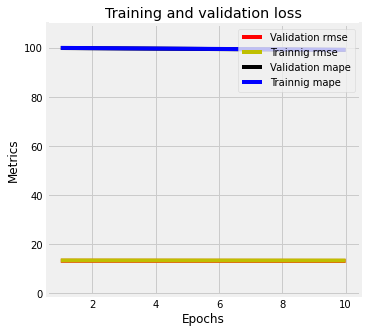

In [20]:
plotme(model1_1)

In [12]:
# inputs: distance
model1_2 = nnmodel(10, num_hlayers=1,Epoch=600)
model1_2

Epoch 1/600
422/422 [==============================] - 1s 856us/step - loss: 629182.8125 - mape: 99.8798 - rmse: 793.2104 - val_loss: 615229.3125 - val_mape: 99.7005 - val_rmse: 784.3655
Epoch 2/600
422/422 [==============================] - 0s 720us/step - loss: 625854.7500 - mape: 99.4077 - rmse: 791.1098 - val_loss: 610724.1875 - val_mape: 99.0419 - val_rmse: 781.4885
Epoch 3/600
422/422 [==============================] - 0s 718us/step - loss: 620133.3125 - mape: 98.5895 - rmse: 787.4854 - val_loss: 604014.6875 - val_mape: 98.0547 - val_rmse: 777.1838
Epoch 4/600
422/422 [==============================] - 0s 736us/step - loss: 612345.6875 - mape: 97.4801 - rmse: 782.5252 - val_loss: 595433.6250 - val_mape: 96.7811 - val_rmse: 771.6434
Epoch 5/600
422/422 [==============================] - 0s 713us/step - loss: 602799.6250 - mape: 96.0951 - rmse: 776.4017 - val_loss: 585269.0000 - val_mape: 95.2569 - val_rmse: 765.0287
Epoch 6/600
422/422 [==============================] - 0s 719us/s

Epoch 45/600
422/422 [==============================] - 0s 727us/step - loss: 132489.7812 - mape: 58.4960 - rmse: 363.9915 - val_loss: 132626.8906 - val_mape: 60.0166 - val_rmse: 364.1797
Epoch 46/600
422/422 [==============================] - 0s 702us/step - loss: 131908.6094 - mape: 58.6871 - rmse: 363.1923 - val_loss: 132116.6875 - val_mape: 60.2271 - val_rmse: 363.4786
Epoch 47/600
422/422 [==============================] - 0s 713us/step - loss: 131344.2969 - mape: 58.8848 - rmse: 362.4146 - val_loss: 131602.7969 - val_mape: 60.3050 - val_rmse: 362.7710
Epoch 48/600
422/422 [==============================] - 0s 702us/step - loss: 130786.9141 - mape: 58.9166 - rmse: 361.6447 - val_loss: 131083.0000 - val_mape: 60.3336 - val_rmse: 362.0539
Epoch 49/600
422/422 [==============================] - 0s 688us/step - loss: 130223.9531 - mape: 58.9539 - rmse: 360.8656 - val_loss: 130548.0938 - val_mape: 60.2653 - val_rmse: 361.3144
Epoch 50/600
422/422 [==============================] - 0s 7

422/422 [==============================] - 0s 695us/step - loss: 105094.2266 - mape: 52.9396 - rmse: 324.1824 - val_loss: 106316.4297 - val_mape: 54.1413 - val_rmse: 326.0620
Epoch 89/600
422/422 [==============================] - 0s 706us/step - loss: 104370.6953 - mape: 52.8451 - rmse: 323.0645 - val_loss: 105614.3594 - val_mape: 53.9117 - val_rmse: 324.9836
Epoch 90/600
422/422 [==============================] - 0s 731us/step - loss: 103648.8438 - mape: 52.5011 - rmse: 321.9454 - val_loss: 104917.0312 - val_mape: 53.6984 - val_rmse: 323.9090
Epoch 91/600
422/422 [==============================] - 0s 724us/step - loss: 102923.8281 - mape: 52.2451 - rmse: 320.8174 - val_loss: 104218.7188 - val_mape: 53.5165 - val_rmse: 322.8293
Epoch 92/600
422/422 [==============================] - 0s 695us/step - loss: 102201.0234 - mape: 52.0976 - rmse: 319.6889 - val_loss: 103521.6875 - val_mape: 53.2757 - val_rmse: 321.7479
Epoch 93/600
422/422 [==============================] - 0s 745us/step - l

Epoch 132/600
422/422 [==============================] - 0s 713us/step - loss: 72218.5547 - mape: 41.9388 - rmse: 268.7351 - val_loss: 74570.5469 - val_mape: 42.8028 - val_rmse: 273.0761
Epoch 133/600
422/422 [==============================] - 0s 703us/step - loss: 71524.0938 - mape: 41.6395 - rmse: 267.4399 - val_loss: 73901.9766 - val_mape: 42.5605 - val_rmse: 271.8492
Epoch 134/600
422/422 [==============================] - 0s 712us/step - loss: 70837.8516 - mape: 41.3466 - rmse: 266.1538 - val_loss: 73242.5781 - val_mape: 42.2793 - val_rmse: 270.6337
Epoch 135/600
422/422 [==============================] - 0s 724us/step - loss: 70158.0078 - mape: 41.0793 - rmse: 264.8736 - val_loss: 72585.4141 - val_mape: 41.9687 - val_rmse: 269.4168
Epoch 136/600
422/422 [==============================] - 0s 713us/step - loss: 69485.0859 - mape: 40.8330 - rmse: 263.6003 - val_loss: 71942.2031 - val_mape: 41.6619 - val_rmse: 268.2204
Epoch 137/600
422/422 [==============================] - 0s 702us

Epoch 176/600
422/422 [==============================] - 0s 713us/step - loss: 53051.5039 - mape: 31.2275 - rmse: 230.3291 - val_loss: 56275.5352 - val_mape: 31.9418 - val_rmse: 237.2247
Epoch 177/600
422/422 [==============================] - 0s 760us/step - loss: 52911.0547 - mape: 31.0702 - rmse: 230.0240 - val_loss: 56138.7344 - val_mape: 31.8488 - val_rmse: 236.9361
Epoch 178/600
422/422 [==============================] - 0s 714us/step - loss: 52775.5195 - mape: 30.9604 - rmse: 229.7292 - val_loss: 56012.7148 - val_mape: 31.7135 - val_rmse: 236.6701
Epoch 179/600
422/422 [==============================] - 0s 707us/step - loss: 52648.6445 - mape: 30.8817 - rmse: 229.4529 - val_loss: 55894.3906 - val_mape: 31.5593 - val_rmse: 236.4200
Epoch 180/600
422/422 [==============================] - 0s 701us/step - loss: 52530.1875 - mape: 30.7129 - rmse: 229.1947 - val_loss: 55778.6289 - val_mape: 31.4469 - val_rmse: 236.1750
Epoch 181/600
422/422 [==============================] - 0s 689us

Epoch 220/600
422/422 [==============================] - 0s 663us/step - loss: 51138.8789 - mape: 28.2935 - rmse: 226.1391 - val_loss: 54485.3125 - val_mape: 28.8745 - val_rmse: 233.4209
Epoch 221/600
422/422 [==============================] - 0s 692us/step - loss: 51136.2578 - mape: 28.2049 - rmse: 226.1333 - val_loss: 54476.4531 - val_mape: 28.9218 - val_rmse: 233.4019
Epoch 222/600
422/422 [==============================] - 0s 737us/step - loss: 51134.0859 - mape: 28.2606 - rmse: 226.1285 - val_loss: 54477.5469 - val_mape: 28.8536 - val_rmse: 233.4043
Epoch 223/600
422/422 [==============================] - 0s 736us/step - loss: 51130.1602 - mape: 28.1883 - rmse: 226.1198 - val_loss: 54471.7109 - val_mape: 28.8661 - val_rmse: 233.3918
Epoch 224/600
422/422 [==============================] - 0s 689us/step - loss: 51127.1797 - mape: 28.1849 - rmse: 226.1132 - val_loss: 54467.9727 - val_mape: 28.8633 - val_rmse: 233.3837
Epoch 225/600
422/422 [==============================] - 0s 712us

Epoch 264/600
422/422 [==============================] - 0s 731us/step - loss: 51098.0508 - mape: 28.0611 - rmse: 226.0488 - val_loss: 54450.6797 - val_mape: 28.4496 - val_rmse: 233.3467
Epoch 265/600
422/422 [==============================] - 0s 707us/step - loss: 51100.6133 - mape: 27.7971 - rmse: 226.0544 - val_loss: 54440.9609 - val_mape: 28.5476 - val_rmse: 233.3259
Epoch 266/600
422/422 [==============================] - 0s 720us/step - loss: 51100.3945 - mape: 27.9581 - rmse: 226.0540 - val_loss: 54445.2812 - val_mape: 28.4962 - val_rmse: 233.3351
Epoch 267/600
422/422 [==============================] - 0s 701us/step - loss: 51100.3633 - mape: 27.9292 - rmse: 226.0539 - val_loss: 54446.8047 - val_mape: 28.4787 - val_rmse: 233.3384
Epoch 268/600
422/422 [==============================] - 0s 688us/step - loss: 51100.4531 - mape: 27.9045 - rmse: 226.0541 - val_loss: 54444.7773 - val_mape: 28.4950 - val_rmse: 233.3340
Epoch 269/600
422/422 [==============================] - 0s 727us

Epoch 308/600
422/422 [==============================] - 0s 702us/step - loss: 51098.5273 - mape: 27.8858 - rmse: 226.0498 - val_loss: 54442.7734 - val_mape: 28.4702 - val_rmse: 233.3298
Epoch 309/600
422/422 [==============================] - 0s 713us/step - loss: 51099.6562 - mape: 27.9084 - rmse: 226.0523 - val_loss: 54444.4648 - val_mape: 28.4508 - val_rmse: 233.3334
Epoch 310/600
422/422 [==============================] - 0s 706us/step - loss: 51099.7773 - mape: 27.8480 - rmse: 226.0526 - val_loss: 54445.3320 - val_mape: 28.4430 - val_rmse: 233.3352
Epoch 311/600
422/422 [==============================] - 0s 712us/step - loss: 51099.4023 - mape: 27.8537 - rmse: 226.0518 - val_loss: 54440.4219 - val_mape: 28.4945 - val_rmse: 233.3247
Epoch 312/600
422/422 [==============================] - 0s 704us/step - loss: 51100.7656 - mape: 27.8387 - rmse: 226.0548 - val_loss: 54436.6758 - val_mape: 28.5415 - val_rmse: 233.3167
Epoch 313/600
422/422 [==============================] - 0s 689us

Epoch 352/600
422/422 [==============================] - 0s 694us/step - loss: 51099.3750 - mape: 27.8532 - rmse: 226.0517 - val_loss: 54440.8867 - val_mape: 28.4839 - val_rmse: 233.3257
Epoch 353/600
422/422 [==============================] - 0s 714us/step - loss: 51099.4141 - mape: 27.9062 - rmse: 226.0518 - val_loss: 54441.4766 - val_mape: 28.4754 - val_rmse: 233.3270
Epoch 354/600
422/422 [==============================] - 0s 701us/step - loss: 51100.6328 - mape: 27.8836 - rmse: 226.0545 - val_loss: 54443.9453 - val_mape: 28.4482 - val_rmse: 233.3323
Epoch 355/600
422/422 [==============================] - 0s 703us/step - loss: 51099.8320 - mape: 27.8502 - rmse: 226.0527 - val_loss: 54442.9023 - val_mape: 28.4608 - val_rmse: 233.3300
Epoch 356/600
422/422 [==============================] - 0s 678us/step - loss: 51099.3672 - mape: 27.8235 - rmse: 226.0517 - val_loss: 54442.1016 - val_mape: 28.4696 - val_rmse: 233.3283
Epoch 357/600
422/422 [==============================] - 0s 666us

Epoch 396/600
422/422 [==============================] - 0s 688us/step - loss: 51101.1406 - mape: 27.9406 - rmse: 226.0556 - val_loss: 54435.1680 - val_mape: 28.5515 - val_rmse: 233.3135
Epoch 397/600
422/422 [==============================] - 0s 713us/step - loss: 51101.6406 - mape: 27.9000 - rmse: 226.0567 - val_loss: 54440.1328 - val_mape: 28.4872 - val_rmse: 233.3241
Epoch 398/600
422/422 [==============================] - 0s 703us/step - loss: 51100.3945 - mape: 27.8917 - rmse: 226.0540 - val_loss: 54441.2852 - val_mape: 28.4726 - val_rmse: 233.3266
Epoch 399/600
422/422 [==============================] - 0s 716us/step - loss: 51099.2383 - mape: 27.8351 - rmse: 226.0514 - val_loss: 54442.5312 - val_mape: 28.4595 - val_rmse: 233.3292
Epoch 400/600
422/422 [==============================] - 0s 699us/step - loss: 51100.8906 - mape: 27.8275 - rmse: 226.0551 - val_loss: 54438.6562 - val_mape: 28.5038 - val_rmse: 233.3209
Epoch 401/600
422/422 [==============================] - 0s 701us

Epoch 440/600
422/422 [==============================] - 0s 665us/step - loss: 51099.3984 - mape: 27.8576 - rmse: 226.0518 - val_loss: 54440.8555 - val_mape: 28.4812 - val_rmse: 233.3256
Epoch 441/600
422/422 [==============================] - 0s 712us/step - loss: 51099.3516 - mape: 27.8776 - rmse: 226.0517 - val_loss: 54442.5742 - val_mape: 28.4625 - val_rmse: 233.3293
Epoch 442/600
422/422 [==============================] - 0s 736us/step - loss: 51099.2969 - mape: 27.9132 - rmse: 226.0515 - val_loss: 54444.5039 - val_mape: 28.4388 - val_rmse: 233.3335
Epoch 443/600
422/422 [==============================] - 0s 689us/step - loss: 51099.9492 - mape: 27.8734 - rmse: 226.0530 - val_loss: 54444.3711 - val_mape: 28.4400 - val_rmse: 233.3332
Epoch 444/600
422/422 [==============================] - 0s 690us/step - loss: 51099.2539 - mape: 27.8321 - rmse: 226.0514 - val_loss: 54443.3945 - val_mape: 28.4501 - val_rmse: 233.3311
Epoch 445/600
422/422 [==============================] - 0s 711us

Epoch 484/600
422/422 [==============================] - 0s 699us/step - loss: 51099.1680 - mape: 27.8579 - rmse: 226.0513 - val_loss: 54447.8008 - val_mape: 28.4090 - val_rmse: 233.3405
Epoch 485/600
422/422 [==============================] - 0s 709us/step - loss: 51099.2773 - mape: 27.9003 - rmse: 226.0515 - val_loss: 54452.1914 - val_mape: 28.3688 - val_rmse: 233.3499
Epoch 486/600
422/422 [==============================] - 0s 710us/step - loss: 51099.1445 - mape: 27.7820 - rmse: 226.0512 - val_loss: 54436.8438 - val_mape: 28.5304 - val_rmse: 233.3170
Epoch 487/600
422/422 [==============================] - 0s 801us/step - loss: 51099.3945 - mape: 27.8605 - rmse: 226.0518 - val_loss: 54439.7773 - val_mape: 28.4936 - val_rmse: 233.3233
Epoch 488/600
422/422 [==============================] - 0s 749us/step - loss: 51099.1094 - mape: 27.8913 - rmse: 226.0511 - val_loss: 54441.8867 - val_mape: 28.4693 - val_rmse: 233.3279
Epoch 489/600
422/422 [==============================] - 0s 743us

Epoch 528/600
422/422 [==============================] - 0s 700us/step - loss: 51100.2227 - mape: 27.8325 - rmse: 226.0536 - val_loss: 54443.6094 - val_mape: 28.4451 - val_rmse: 233.3315
Epoch 529/600
422/422 [==============================] - 0s 720us/step - loss: 51099.7734 - mape: 27.8679 - rmse: 226.0526 - val_loss: 54443.0898 - val_mape: 28.4513 - val_rmse: 233.3304
Epoch 530/600
422/422 [==============================] - 0s 677us/step - loss: 51100.1055 - mape: 27.9043 - rmse: 226.0533 - val_loss: 54443.6328 - val_mape: 28.4433 - val_rmse: 233.3316
Epoch 531/600
422/422 [==============================] - 0s 697us/step - loss: 51099.2383 - mape: 27.8625 - rmse: 226.0514 - val_loss: 54444.7969 - val_mape: 28.4335 - val_rmse: 233.3341
Epoch 532/600
422/422 [==============================] - 0s 684us/step - loss: 51099.3750 - mape: 27.8513 - rmse: 226.0517 - val_loss: 54444.9297 - val_mape: 28.4325 - val_rmse: 233.3344
Epoch 533/600
422/422 [==============================] - 0s 685us

Epoch 572/600
422/422 [==============================] - 0s 737us/step - loss: 51099.7969 - mape: 27.8706 - rmse: 226.0526 - val_loss: 54445.1328 - val_mape: 28.4290 - val_rmse: 233.3348
Epoch 573/600
422/422 [==============================] - 0s 741us/step - loss: 51099.1484 - mape: 27.7983 - rmse: 226.0512 - val_loss: 54439.5664 - val_mape: 28.4891 - val_rmse: 233.3229
Epoch 574/600
422/422 [==============================] - 0s 710us/step - loss: 51099.6406 - mape: 27.8684 - rmse: 226.0523 - val_loss: 54442.0977 - val_mape: 28.4625 - val_rmse: 233.3283
Epoch 575/600
422/422 [==============================] - 0s 707us/step - loss: 51099.7500 - mape: 27.8802 - rmse: 226.0525 - val_loss: 54444.3711 - val_mape: 28.4379 - val_rmse: 233.3332
Epoch 576/600
422/422 [==============================] - 0s 711us/step - loss: 51099.1133 - mape: 27.8496 - rmse: 226.0511 - val_loss: 54444.2773 - val_mape: 28.4390 - val_rmse: 233.3330
Epoch 577/600
422/422 [==============================] - 0s 756us

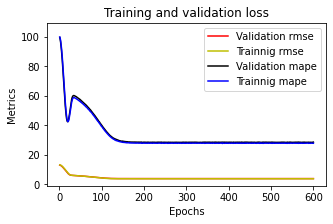

In [17]:
plotme(model1_2)

In [13]:
# inputs: distance
model1_3 = nnmodel(20, num_hlayers=1,Epoch=600)
model1_3

Epoch 1/600
422/422 [==============================] - 1s 862us/step - loss: 628542.6250 - mape: 99.7910 - rmse: 792.8068 - val_loss: 613268.7500 - val_mape: 99.4186 - val_rmse: 783.1147
Epoch 2/600
422/422 [==============================] - 0s 740us/step - loss: 621189.1875 - mape: 98.7599 - rmse: 788.1556 - val_loss: 602899.2500 - val_mape: 97.8998 - val_rmse: 776.4659
Epoch 3/600
422/422 [==============================] - 0s 692us/step - loss: 607901.2500 - mape: 96.8464 - rmse: 779.6802 - val_loss: 587290.0000 - val_mape: 95.5769 - val_rmse: 766.3485
Epoch 4/600
422/422 [==============================] - 0s 704us/step - loss: 589827.5625 - mape: 94.1994 - rmse: 768.0023 - val_loss: 567471.6875 - val_mape: 92.5666 - val_rmse: 753.3072
Epoch 5/600
422/422 [==============================] - 0s 751us/step - loss: 567895.3750 - mape: 90.9447 - rmse: 753.5883 - val_loss: 544281.0000 - val_mape: 88.9540 - val_rmse: 737.7540
Epoch 6/600
422/422 [==============================] - 0s 713us/s

Epoch 45/600
422/422 [==============================] - 0s 688us/step - loss: 116362.2578 - mape: 55.9578 - rmse: 341.1191 - val_loss: 117016.6250 - val_mape: 57.0730 - val_rmse: 342.0769
Epoch 46/600
422/422 [==============================] - 0s 679us/step - loss: 115332.1094 - mape: 55.5961 - rmse: 339.6058 - val_loss: 116020.6406 - val_mape: 56.8158 - val_rmse: 340.6180
Epoch 47/600
422/422 [==============================] - 0s 690us/step - loss: 114285.1016 - mape: 55.3326 - rmse: 338.0608 - val_loss: 115007.4609 - val_mape: 56.5690 - val_rmse: 339.1275
Epoch 48/600
422/422 [==============================] - 0s 672us/step - loss: 113234.4375 - mape: 55.0527 - rmse: 336.5033 - val_loss: 113998.1172 - val_mape: 56.3665 - val_rmse: 337.6361
Epoch 49/600
422/422 [==============================] - 0s 665us/step - loss: 112175.8203 - mape: 54.7711 - rmse: 334.9266 - val_loss: 112977.3984 - val_mape: 56.0709 - val_rmse: 336.1211
Epoch 50/600
422/422 [==============================] - 0s 6

Epoch 89/600
422/422 [==============================] - 0s 677us/step - loss: 66684.4375 - mape: 39.5124 - rmse: 258.2333 - val_loss: 69089.3359 - val_mape: 40.3508 - val_rmse: 262.8485
Epoch 90/600
422/422 [==============================] - 0s 659us/step - loss: 65742.6875 - mape: 39.1586 - rmse: 256.4034 - val_loss: 68191.6797 - val_mape: 39.8459 - val_rmse: 261.1354
Epoch 91/600
422/422 [==============================] - 0s 670us/step - loss: 64825.5898 - mape: 38.6410 - rmse: 254.6087 - val_loss: 67317.7734 - val_mape: 39.3662 - val_rmse: 259.4567
Epoch 92/600
422/422 [==============================] - 0s 720us/step - loss: 63938.6406 - mape: 38.1849 - rmse: 252.8609 - val_loss: 66474.6719 - val_mape: 38.9574 - val_rmse: 257.8268
Epoch 93/600
422/422 [==============================] - 0s 678us/step - loss: 63078.4375 - mape: 37.7894 - rmse: 251.1542 - val_loss: 65654.9609 - val_mape: 38.5514 - val_rmse: 256.2322
Epoch 94/600
422/422 [==============================] - 0s 687us/step 

Epoch 133/600
422/422 [==============================] - 0s 693us/step - loss: 51218.5430 - mape: 28.5955 - rmse: 226.3151 - val_loss: 54550.1953 - val_mape: 29.2212 - val_rmse: 233.5598
Epoch 134/600
422/422 [==============================] - 0s 699us/step - loss: 51206.3047 - mape: 28.5324 - rmse: 226.2881 - val_loss: 54531.5430 - val_mape: 29.2393 - val_rmse: 233.5199
Epoch 135/600
422/422 [==============================] - 0s 737us/step - loss: 51190.5586 - mape: 28.5269 - rmse: 226.2533 - val_loss: 54525.5117 - val_mape: 29.1120 - val_rmse: 233.5070
Epoch 136/600
422/422 [==============================] - 0s 679us/step - loss: 51178.9453 - mape: 28.4896 - rmse: 226.2276 - val_loss: 54521.2734 - val_mape: 28.9863 - val_rmse: 233.4979
Epoch 137/600
422/422 [==============================] - 0s 689us/step - loss: 51166.9141 - mape: 28.3408 - rmse: 226.2010 - val_loss: 54505.5781 - val_mape: 29.0181 - val_rmse: 233.4643
Epoch 138/600
422/422 [==============================] - 0s 690us

Epoch 177/600
422/422 [==============================] - 0s 659us/step - loss: 51101.6055 - mape: 27.8928 - rmse: 226.0566 - val_loss: 54443.0391 - val_mape: 28.4882 - val_rmse: 233.3303
Epoch 178/600
422/422 [==============================] - 0s 647us/step - loss: 51100.8203 - mape: 27.9289 - rmse: 226.0549 - val_loss: 54448.3359 - val_mape: 28.4330 - val_rmse: 233.3417
Epoch 179/600
422/422 [==============================] - 0s 709us/step - loss: 51101.1719 - mape: 27.7909 - rmse: 226.0557 - val_loss: 54439.1172 - val_mape: 28.5304 - val_rmse: 233.3219
Epoch 180/600
422/422 [==============================] - 0s 668us/step - loss: 51100.1914 - mape: 27.9595 - rmse: 226.0535 - val_loss: 54444.0273 - val_mape: 28.4697 - val_rmse: 233.3324
Epoch 181/600
422/422 [==============================] - 0s 665us/step - loss: 51102.6172 - mape: 27.8946 - rmse: 226.0589 - val_loss: 54450.2070 - val_mape: 28.4138 - val_rmse: 233.3457
Epoch 182/600
422/422 [==============================] - 0s 712us

Epoch 221/600
422/422 [==============================] - 0s 726us/step - loss: 51102.1562 - mape: 27.9303 - rmse: 226.0579 - val_loss: 54440.9766 - val_mape: 28.4802 - val_rmse: 233.3259
Epoch 222/600
422/422 [==============================] - 0s 688us/step - loss: 51102.1016 - mape: 27.8839 - rmse: 226.0577 - val_loss: 54444.3906 - val_mape: 28.4426 - val_rmse: 233.3332
Epoch 223/600
422/422 [==============================] - 0s 685us/step - loss: 51102.1953 - mape: 27.8263 - rmse: 226.0580 - val_loss: 54437.5391 - val_mape: 28.5218 - val_rmse: 233.3185
Epoch 224/600
422/422 [==============================] - 0s 700us/step - loss: 51098.0000 - mape: 27.9514 - rmse: 226.0487 - val_loss: 54456.1602 - val_mape: 28.3394 - val_rmse: 233.3584
Epoch 225/600
422/422 [==============================] - 0s 687us/step - loss: 51104.1992 - mape: 27.8253 - rmse: 226.0624 - val_loss: 54447.4062 - val_mape: 28.4125 - val_rmse: 233.3397
Epoch 226/600
422/422 [==============================] - 0s 687us

Epoch 265/600
422/422 [==============================] - 0s 703us/step - loss: 51100.6055 - mape: 27.8695 - rmse: 226.0544 - val_loss: 54443.5508 - val_mape: 28.4502 - val_rmse: 233.3314
Epoch 266/600
422/422 [==============================] - 0s 694us/step - loss: 51101.0273 - mape: 27.8528 - rmse: 226.0554 - val_loss: 54443.4688 - val_mape: 28.4482 - val_rmse: 233.3312
Epoch 267/600
422/422 [==============================] - 0s 696us/step - loss: 51102.7070 - mape: 27.8255 - rmse: 226.0591 - val_loss: 54436.5352 - val_mape: 28.5312 - val_rmse: 233.3164
Epoch 268/600
422/422 [==============================] - 0s 692us/step - loss: 51101.5078 - mape: 27.8760 - rmse: 226.0564 - val_loss: 54440.7031 - val_mape: 28.4787 - val_rmse: 233.3253
Epoch 269/600
422/422 [==============================] - 0s 705us/step - loss: 51102.5156 - mape: 27.8478 - rmse: 226.0587 - val_loss: 54439.3125 - val_mape: 28.4940 - val_rmse: 233.3223
Epoch 270/600
422/422 [==============================] - 0s 691us

Epoch 309/600
422/422 [==============================] - 0s 681us/step - loss: 51101.5703 - mape: 27.8842 - rmse: 226.0566 - val_loss: 54445.8242 - val_mape: 28.4300 - val_rmse: 233.3363
Epoch 310/600
422/422 [==============================] - 0s 699us/step - loss: 51102.8477 - mape: 27.9317 - rmse: 226.0594 - val_loss: 54450.8594 - val_mape: 28.3809 - val_rmse: 233.3471
Epoch 311/600
422/422 [==============================] - 0s 682us/step - loss: 51101.5469 - mape: 27.7918 - rmse: 226.0565 - val_loss: 54447.4688 - val_mape: 28.4129 - val_rmse: 233.3398
Epoch 312/600
422/422 [==============================] - 0s 678us/step - loss: 51102.2148 - mape: 27.9559 - rmse: 226.0580 - val_loss: 54464.4766 - val_mape: 28.2769 - val_rmse: 233.3763
Epoch 313/600
422/422 [==============================] - 0s 695us/step - loss: 51102.2109 - mape: 27.7629 - rmse: 226.0580 - val_loss: 54443.0195 - val_mape: 28.4572 - val_rmse: 233.3303
Epoch 314/600
422/422 [==============================] - 0s 725us

Epoch 353/600
422/422 [==============================] - 0s 699us/step - loss: 51101.1133 - mape: 27.9189 - rmse: 226.0556 - val_loss: 54441.1914 - val_mape: 28.4749 - val_rmse: 233.3264
Epoch 354/600
422/422 [==============================] - 0s 696us/step - loss: 51101.0938 - mape: 27.8634 - rmse: 226.0555 - val_loss: 54440.5820 - val_mape: 28.4794 - val_rmse: 233.3251
Epoch 355/600
422/422 [==============================] - 0s 743us/step - loss: 51101.1328 - mape: 27.8320 - rmse: 226.0556 - val_loss: 54435.9609 - val_mape: 28.5401 - val_rmse: 233.3152
Epoch 356/600
422/422 [==============================] - 0s 744us/step - loss: 51100.5469 - mape: 27.8657 - rmse: 226.0543 - val_loss: 54442.4258 - val_mape: 28.4602 - val_rmse: 233.3290
Epoch 357/600
422/422 [==============================] - 0s 690us/step - loss: 51101.8320 - mape: 27.8516 - rmse: 226.0571 - val_loss: 54437.6914 - val_mape: 28.5155 - val_rmse: 233.3189
Epoch 358/600
422/422 [==============================] - 0s 682us

Epoch 397/600
422/422 [==============================] - 0s 733us/step - loss: 51099.5312 - mape: 27.8872 - rmse: 226.0520 - val_loss: 54441.3398 - val_mape: 28.4747 - val_rmse: 233.3267
Epoch 398/600
422/422 [==============================] - 0s 723us/step - loss: 51101.6562 - mape: 27.8637 - rmse: 226.0567 - val_loss: 54440.2227 - val_mape: 28.4861 - val_rmse: 233.3243
Epoch 399/600
422/422 [==============================] - 0s 710us/step - loss: 51100.7227 - mape: 27.8785 - rmse: 226.0547 - val_loss: 54444.7188 - val_mape: 28.4386 - val_rmse: 233.3339
Epoch 400/600
422/422 [==============================] - 0s 705us/step - loss: 51101.1836 - mape: 27.8435 - rmse: 226.0557 - val_loss: 54449.7773 - val_mape: 28.3893 - val_rmse: 233.3448
Epoch 401/600
422/422 [==============================] - 0s 698us/step - loss: 51102.6719 - mape: 27.8092 - rmse: 226.0590 - val_loss: 54440.5117 - val_mape: 28.4827 - val_rmse: 233.3249
Epoch 402/600
422/422 [==============================] - 0s 701us

Epoch 441/600
422/422 [==============================] - 0s 692us/step - loss: 51101.6719 - mape: 27.8647 - rmse: 226.0568 - val_loss: 54440.7109 - val_mape: 28.4781 - val_rmse: 233.3253
Epoch 442/600
422/422 [==============================] - 0s 697us/step - loss: 51101.7500 - mape: 27.8563 - rmse: 226.0570 - val_loss: 54439.2539 - val_mape: 28.4962 - val_rmse: 233.3222
Epoch 443/600
422/422 [==============================] - 0s 708us/step - loss: 51100.9609 - mape: 27.9046 - rmse: 226.0552 - val_loss: 54446.1094 - val_mape: 28.4229 - val_rmse: 233.3369
Epoch 444/600
422/422 [==============================] - 0s 699us/step - loss: 51102.4492 - mape: 27.8050 - rmse: 226.0585 - val_loss: 54439.8516 - val_mape: 28.4890 - val_rmse: 233.3235
Epoch 445/600
422/422 [==============================] - 0s 737us/step - loss: 51100.8672 - mape: 27.8664 - rmse: 226.0550 - val_loss: 54440.9688 - val_mape: 28.4782 - val_rmse: 233.3259
Epoch 446/600
422/422 [==============================] - 0s 711us

Epoch 485/600
422/422 [==============================] - 0s 684us/step - loss: 51102.0547 - mape: 27.7848 - rmse: 226.0576 - val_loss: 54435.3516 - val_mape: 28.5556 - val_rmse: 233.3138
Epoch 486/600
422/422 [==============================] - 0s 701us/step - loss: 51102.3164 - mape: 27.8780 - rmse: 226.0582 - val_loss: 54436.2930 - val_mape: 28.5379 - val_rmse: 233.3159
Epoch 487/600
422/422 [==============================] - 0s 692us/step - loss: 51102.6406 - mape: 27.8787 - rmse: 226.0589 - val_loss: 54436.1836 - val_mape: 28.5394 - val_rmse: 233.3156
Epoch 488/600
422/422 [==============================] - 0s 705us/step - loss: 51101.7305 - mape: 27.8932 - rmse: 226.0569 - val_loss: 54439.0078 - val_mape: 28.5022 - val_rmse: 233.3217
Epoch 489/600
422/422 [==============================] - 0s 727us/step - loss: 51100.9609 - mape: 27.8772 - rmse: 226.0552 - val_loss: 54439.2109 - val_mape: 28.4987 - val_rmse: 233.3221
Epoch 490/600
422/422 [==============================] - 0s 779us

Epoch 529/600
422/422 [==============================] - 0s 752us/step - loss: 51101.7383 - mape: 27.8397 - rmse: 226.0569 - val_loss: 54440.4375 - val_mape: 28.4851 - val_rmse: 233.3248
Epoch 530/600
422/422 [==============================] - 0s 705us/step - loss: 51103.0742 - mape: 27.8671 - rmse: 226.0599 - val_loss: 54441.4531 - val_mape: 28.4725 - val_rmse: 233.3269
Epoch 531/600
422/422 [==============================] - 0s 775us/step - loss: 51103.6914 - mape: 27.8299 - rmse: 226.0612 - val_loss: 54437.7031 - val_mape: 28.5179 - val_rmse: 233.3189
Epoch 532/600
422/422 [==============================] - 0s 691us/step - loss: 51100.4570 - mape: 27.9157 - rmse: 226.0541 - val_loss: 54450.6289 - val_mape: 28.3827 - val_rmse: 233.3466
Epoch 533/600
422/422 [==============================] - 0s 687us/step - loss: 51103.8672 - mape: 27.8176 - rmse: 226.0616 - val_loss: 54441.2578 - val_mape: 28.4759 - val_rmse: 233.3265
Epoch 534/600
422/422 [==============================] - 0s 716us

Epoch 573/600
422/422 [==============================] - 0s 696us/step - loss: 51102.6172 - mape: 27.8307 - rmse: 226.0589 - val_loss: 54442.2070 - val_mape: 28.4654 - val_rmse: 233.3285
Epoch 574/600
422/422 [==============================] - 0s 696us/step - loss: 51100.0742 - mape: 27.8337 - rmse: 226.0533 - val_loss: 54439.3164 - val_mape: 28.4995 - val_rmse: 233.3223
Epoch 575/600
422/422 [==============================] - 0s 695us/step - loss: 51101.4258 - mape: 27.9187 - rmse: 226.0562 - val_loss: 54446.2891 - val_mape: 28.4248 - val_rmse: 233.3373
Epoch 576/600
422/422 [==============================] - 0s 717us/step - loss: 51102.4414 - mape: 27.8264 - rmse: 226.0585 - val_loss: 54444.0352 - val_mape: 28.4476 - val_rmse: 233.3325
Epoch 577/600
422/422 [==============================] - 0s 690us/step - loss: 51097.7656 - mape: 27.7500 - rmse: 226.0481 - val_loss: 54430.1211 - val_mape: 28.6427 - val_rmse: 233.3026
Epoch 578/600
422/422 [==============================] - 0s 692us

In [14]:
# inputs: distance
model1_4 = nnmodel(10,5, num_hlayers=2,Epoch=600)
model1_4

Epoch 1/600
422/422 [==============================] - 1s 876us/step - loss: 627584.6250 - mape: 99.6583 - rmse: 792.2024 - val_loss: 609999.5625 - val_mape: 98.9412 - val_rmse: 781.0247
Epoch 2/600
422/422 [==============================] - 0s 751us/step - loss: 610163.1875 - mape: 97.1504 - rmse: 781.1295 - val_loss: 580606.0000 - val_mape: 94.5711 - val_rmse: 761.9750
Epoch 3/600
422/422 [==============================] - 0s 733us/step - loss: 565040.9375 - mape: 90.4381 - rmse: 751.6921 - val_loss: 520645.3438 - val_mape: 85.1734 - val_rmse: 721.5576
Epoch 4/600
422/422 [==============================] - 0s 720us/step - loss: 489658.1562 - mape: 78.4053 - rmse: 699.7558 - val_loss: 434123.3438 - val_mape: 70.2910 - val_rmse: 658.8804
Epoch 5/600
422/422 [==============================] - 0s 725us/step - loss: 393794.4688 - mape: 62.3679 - rmse: 627.5305 - val_loss: 335599.5312 - val_mape: 53.8160 - val_rmse: 579.3095
Epoch 6/600
422/422 [==============================] - 0s 731us/s

Epoch 45/600
422/422 [==============================] - 0s 739us/step - loss: 51312.3359 - mape: 28.9805 - rmse: 226.5223 - val_loss: 54600.3125 - val_mape: 29.3228 - val_rmse: 233.6671
Epoch 46/600
422/422 [==============================] - 0s 730us/step - loss: 51229.3398 - mape: 28.5867 - rmse: 226.3390 - val_loss: 54515.2109 - val_mape: 29.4433 - val_rmse: 233.4849
Epoch 47/600
422/422 [==============================] - 0s 746us/step - loss: 51175.7305 - mape: 28.4461 - rmse: 226.2205 - val_loss: 54481.5391 - val_mape: 29.1703 - val_rmse: 233.4128
Epoch 48/600
422/422 [==============================] - 0s 748us/step - loss: 51153.4414 - mape: 28.4228 - rmse: 226.1713 - val_loss: 54490.4297 - val_mape: 28.7020 - val_rmse: 233.4319
Epoch 49/600
422/422 [==============================] - 0s 735us/step - loss: 51132.1719 - mape: 28.1086 - rmse: 226.1242 - val_loss: 54447.3086 - val_mape: 28.9473 - val_rmse: 233.3395
Epoch 50/600
422/422 [==============================] - 0s 727us/step 

422/422 [==============================] - 0s 731us/step - loss: 51110.8164 - mape: 27.8633 - rmse: 226.0770 - val_loss: 54455.9844 - val_mape: 28.3495 - val_rmse: 233.3581
Epoch 90/600
422/422 [==============================] - 0s 731us/step - loss: 51109.1875 - mape: 27.8506 - rmse: 226.0734 - val_loss: 54432.6445 - val_mape: 28.5939 - val_rmse: 233.3080
Epoch 91/600
422/422 [==============================] - 0s 770us/step - loss: 51118.6836 - mape: 27.9259 - rmse: 226.0944 - val_loss: 54457.0312 - val_mape: 28.3420 - val_rmse: 233.3603
Epoch 92/600
422/422 [==============================] - 0s 746us/step - loss: 51110.6406 - mape: 27.8849 - rmse: 226.0766 - val_loss: 54474.7070 - val_mape: 28.2254 - val_rmse: 233.3982
Epoch 93/600
422/422 [==============================] - 0s 736us/step - loss: 51111.3164 - mape: 27.8765 - rmse: 226.0781 - val_loss: 54452.4453 - val_mape: 28.3763 - val_rmse: 233.3505
Epoch 94/600
422/422 [==============================] - 0s 772us/step - loss: 51113

Epoch 133/600
422/422 [==============================] - 0s 734us/step - loss: 51108.9844 - mape: 28.0062 - rmse: 226.0730 - val_loss: 54441.1289 - val_mape: 28.4720 - val_rmse: 233.3262
Epoch 134/600
422/422 [==============================] - 0s 730us/step - loss: 51094.7969 - mape: 27.9191 - rmse: 226.0416 - val_loss: 54497.1289 - val_mape: 28.0925 - val_rmse: 233.4462
Epoch 135/600
422/422 [==============================] - 0s 727us/step - loss: 51112.4023 - mape: 27.8856 - rmse: 226.0805 - val_loss: 54478.0430 - val_mape: 28.1895 - val_rmse: 233.4053
Epoch 136/600
422/422 [==============================] - 0s 774us/step - loss: 51113.0977 - mape: 27.7856 - rmse: 226.0821 - val_loss: 54467.1523 - val_mape: 28.2709 - val_rmse: 233.3820
Epoch 137/600
422/422 [==============================] - 0s 745us/step - loss: 51110.4141 - mape: 27.8044 - rmse: 226.0761 - val_loss: 54433.1250 - val_mape: 28.5840 - val_rmse: 233.3091
Epoch 138/600
422/422 [==============================] - 0s 733us

Epoch 177/600
422/422 [==============================] - 0s 727us/step - loss: 51123.5703 - mape: 27.9703 - rmse: 226.1052 - val_loss: 54449.2188 - val_mape: 28.3857 - val_rmse: 233.3436
Epoch 178/600
422/422 [==============================] - 0s 736us/step - loss: 51117.2188 - mape: 27.8305 - rmse: 226.0912 - val_loss: 54443.8945 - val_mape: 28.4478 - val_rmse: 233.3322
Epoch 179/600
422/422 [==============================] - 0s 719us/step - loss: 51112.7109 - mape: 27.8748 - rmse: 226.0812 - val_loss: 54453.3125 - val_mape: 28.3646 - val_rmse: 233.3523
Epoch 180/600
422/422 [==============================] - 0s 731us/step - loss: 51115.7734 - mape: 27.8617 - rmse: 226.0880 - val_loss: 54433.6523 - val_mape: 28.5741 - val_rmse: 233.3102
Epoch 181/600
422/422 [==============================] - 0s 731us/step - loss: 51114.9688 - mape: 27.8416 - rmse: 226.0862 - val_loss: 54433.4492 - val_mape: 28.5729 - val_rmse: 233.3098
Epoch 182/600
422/422 [==============================] - 0s 731us

Epoch 221/600
422/422 [==============================] - 0s 733us/step - loss: 51106.9805 - mape: 27.9599 - rmse: 226.0685 - val_loss: 54498.3672 - val_mape: 28.0848 - val_rmse: 233.4489
Epoch 222/600
422/422 [==============================] - 0s 742us/step - loss: 51099.9727 - mape: 27.9149 - rmse: 226.0530 - val_loss: 54511.6953 - val_mape: 28.0201 - val_rmse: 233.4774
Epoch 223/600
422/422 [==============================] - 0s 732us/step - loss: 51113.9414 - mape: 27.7668 - rmse: 226.0839 - val_loss: 54440.2148 - val_mape: 28.4792 - val_rmse: 233.3243
Epoch 224/600
422/422 [==============================] - 0s 739us/step - loss: 51110.6523 - mape: 27.9330 - rmse: 226.0766 - val_loss: 54494.8594 - val_mape: 28.1005 - val_rmse: 233.4413
Epoch 225/600
422/422 [==============================] - 0s 730us/step - loss: 51108.3789 - mape: 27.7139 - rmse: 226.0716 - val_loss: 54425.6250 - val_mape: 28.7828 - val_rmse: 233.2930
Epoch 226/600
422/422 [==============================] - 0s 727us

Epoch 265/600
422/422 [==============================] - 0s 726us/step - loss: 51109.4805 - mape: 27.7886 - rmse: 226.0741 - val_loss: 54430.9883 - val_mape: 28.6196 - val_rmse: 233.3045
Epoch 266/600
422/422 [==============================] - 0s 722us/step - loss: 51114.4883 - mape: 27.8582 - rmse: 226.0851 - val_loss: 54433.4492 - val_mape: 28.5857 - val_rmse: 233.3098
Epoch 267/600
422/422 [==============================] - 0s 725us/step - loss: 51123.2695 - mape: 27.8790 - rmse: 226.1046 - val_loss: 54435.0117 - val_mape: 28.5621 - val_rmse: 233.3131
Epoch 268/600
422/422 [==============================] - 0s 722us/step - loss: 51108.4141 - mape: 27.8802 - rmse: 226.0717 - val_loss: 54446.4180 - val_mape: 28.4325 - val_rmse: 233.3376
Epoch 269/600
422/422 [==============================] - 0s 730us/step - loss: 51097.3633 - mape: 27.9320 - rmse: 226.0473 - val_loss: 54495.6562 - val_mape: 28.1139 - val_rmse: 233.4431
Epoch 270/600
422/422 [==============================] - 0s 728us

Epoch 309/600
422/422 [==============================] - 0s 743us/step - loss: 51108.4297 - mape: 27.8725 - rmse: 226.0717 - val_loss: 54466.0508 - val_mape: 28.2903 - val_rmse: 233.3796
Epoch 310/600
422/422 [==============================] - 0s 761us/step - loss: 51113.9805 - mape: 27.9313 - rmse: 226.0840 - val_loss: 54468.1641 - val_mape: 28.2653 - val_rmse: 233.3842
Epoch 311/600
422/422 [==============================] - 0s 791us/step - loss: 51119.2578 - mape: 27.8848 - rmse: 226.0957 - val_loss: 54464.9609 - val_mape: 28.2863 - val_rmse: 233.3773
Epoch 312/600
422/422 [==============================] - 0s 778us/step - loss: 51116.6641 - mape: 27.7931 - rmse: 226.0900 - val_loss: 54444.3398 - val_mape: 28.4619 - val_rmse: 233.3331
Epoch 313/600
422/422 [==============================] - 0s 742us/step - loss: 51110.6641 - mape: 27.9038 - rmse: 226.0767 - val_loss: 54462.8516 - val_mape: 28.3051 - val_rmse: 233.3728
Epoch 314/600
422/422 [==============================] - 0s 749us

Epoch 353/600
422/422 [==============================] - 0s 725us/step - loss: 51109.7969 - mape: 27.8949 - rmse: 226.0748 - val_loss: 54434.3750 - val_mape: 28.5601 - val_rmse: 233.3118
Epoch 354/600
422/422 [==============================] - 0s 726us/step - loss: 51111.4844 - mape: 27.9334 - rmse: 226.0785 - val_loss: 54472.4336 - val_mape: 28.2285 - val_rmse: 233.3933
Epoch 355/600
422/422 [==============================] - 0s 770us/step - loss: 51106.7500 - mape: 27.7257 - rmse: 226.0680 - val_loss: 54425.7227 - val_mape: 28.7916 - val_rmse: 233.2932
Epoch 356/600
422/422 [==============================] - 0s 797us/step - loss: 51111.6875 - mape: 27.9307 - rmse: 226.0789 - val_loss: 54452.3281 - val_mape: 28.3775 - val_rmse: 233.3502
Epoch 357/600
422/422 [==============================] - 0s 727us/step - loss: 51103.4570 - mape: 27.7864 - rmse: 226.0607 - val_loss: 54427.0352 - val_mape: 28.9376 - val_rmse: 233.2960
Epoch 358/600
422/422 [==============================] - 0s 742us

Epoch 397/600
422/422 [==============================] - 0s 742us/step - loss: 51112.3711 - mape: 27.8859 - rmse: 226.0805 - val_loss: 54469.9141 - val_mape: 28.2557 - val_rmse: 233.3879
Epoch 398/600
422/422 [==============================] - 0s 713us/step - loss: 51119.6719 - mape: 27.8245 - rmse: 226.0966 - val_loss: 54429.3984 - val_mape: 28.6474 - val_rmse: 233.3011
Epoch 399/600
422/422 [==============================] - 0s 729us/step - loss: 51114.7812 - mape: 27.8667 - rmse: 226.0858 - val_loss: 54443.1250 - val_mape: 28.4544 - val_rmse: 233.3305
Epoch 400/600
422/422 [==============================] - 0s 739us/step - loss: 51108.4297 - mape: 27.8612 - rmse: 226.0717 - val_loss: 54456.1953 - val_mape: 28.3462 - val_rmse: 233.3585
Epoch 401/600
422/422 [==============================] - 0s 713us/step - loss: 51107.9375 - mape: 27.8152 - rmse: 226.0706 - val_loss: 54428.0586 - val_mape: 28.6807 - val_rmse: 233.2982
Epoch 402/600
422/422 [==============================] - 0s 719us

Epoch 441/600
422/422 [==============================] - 0s 734us/step - loss: 51110.9414 - mape: 27.9182 - rmse: 226.0773 - val_loss: 54455.0352 - val_mape: 28.3650 - val_rmse: 233.3560
Epoch 442/600
422/422 [==============================] - 0s 716us/step - loss: 51112.0586 - mape: 27.8379 - rmse: 226.0798 - val_loss: 54449.1094 - val_mape: 28.4083 - val_rmse: 233.3433
Epoch 443/600
422/422 [==============================] - 0s 716us/step - loss: 51112.1992 - mape: 27.8805 - rmse: 226.0801 - val_loss: 54472.8789 - val_mape: 28.2426 - val_rmse: 233.3943
Epoch 444/600
422/422 [==============================] - 0s 727us/step - loss: 51112.1367 - mape: 27.8433 - rmse: 226.0799 - val_loss: 54446.7695 - val_mape: 28.4293 - val_rmse: 233.3383
Epoch 445/600
422/422 [==============================] - 0s 724us/step - loss: 51111.6211 - mape: 27.8685 - rmse: 226.0788 - val_loss: 54430.4414 - val_mape: 28.6356 - val_rmse: 233.3033
Epoch 446/600
422/422 [==============================] - 0s 722us

Epoch 485/600
422/422 [==============================] - 0s 797us/step - loss: 51108.5156 - mape: 27.8997 - rmse: 226.0719 - val_loss: 54468.8516 - val_mape: 28.2538 - val_rmse: 233.3856
Epoch 486/600
422/422 [==============================] - 0s 786us/step - loss: 51114.0273 - mape: 27.7534 - rmse: 226.0841 - val_loss: 54426.4453 - val_mape: 28.7325 - val_rmse: 233.2948
Epoch 487/600
422/422 [==============================] - 0s 749us/step - loss: 51115.4219 - mape: 27.8823 - rmse: 226.0872 - val_loss: 54429.8789 - val_mape: 28.6375 - val_rmse: 233.3021
Epoch 488/600
422/422 [==============================] - 0s 751us/step - loss: 51104.2852 - mape: 27.8732 - rmse: 226.0626 - val_loss: 54433.2539 - val_mape: 28.5745 - val_rmse: 233.3094
Epoch 489/600
422/422 [==============================] - 0s 795us/step - loss: 51112.3750 - mape: 27.8144 - rmse: 226.0805 - val_loss: 54428.9766 - val_mape: 28.6591 - val_rmse: 233.3002
Epoch 490/600
422/422 [==============================] - 0s 751us

Epoch 529/600
422/422 [==============================] - 0s 744us/step - loss: 51110.0352 - mape: 27.7269 - rmse: 226.0753 - val_loss: 54426.8398 - val_mape: 28.9266 - val_rmse: 233.2956
Epoch 530/600
422/422 [==============================] - 0s 741us/step - loss: 51119.4688 - mape: 28.0458 - rmse: 226.0961 - val_loss: 54459.7461 - val_mape: 28.3111 - val_rmse: 233.3661
Epoch 531/600
422/422 [==============================] - 0s 724us/step - loss: 51118.1328 - mape: 27.7446 - rmse: 226.0932 - val_loss: 54430.9922 - val_mape: 28.6221 - val_rmse: 233.3045
Epoch 532/600
422/422 [==============================] - 0s 737us/step - loss: 51121.0352 - mape: 27.9643 - rmse: 226.0996 - val_loss: 54460.0508 - val_mape: 28.3183 - val_rmse: 233.3668
Epoch 533/600
422/422 [==============================] - 0s 757us/step - loss: 51094.2109 - mape: 27.9488 - rmse: 226.0403 - val_loss: 54532.7617 - val_mape: 27.9353 - val_rmse: 233.5225
Epoch 534/600
422/422 [==============================] - 0s 811us

Epoch 573/600
422/422 [==============================] - 0s 790us/step - loss: 51119.5508 - mape: 27.8667 - rmse: 226.0963 - val_loss: 54460.7383 - val_mape: 28.3173 - val_rmse: 233.3682
Epoch 574/600
422/422 [==============================] - 0s 746us/step - loss: 51111.7109 - mape: 27.8622 - rmse: 226.0790 - val_loss: 54439.3164 - val_mape: 28.4949 - val_rmse: 233.3223
Epoch 575/600
422/422 [==============================] - 0s 734us/step - loss: 51110.3242 - mape: 27.8438 - rmse: 226.0759 - val_loss: 54446.7578 - val_mape: 28.4234 - val_rmse: 233.3383
Epoch 576/600
422/422 [==============================] - 0s 736us/step - loss: 51108.2461 - mape: 27.7913 - rmse: 226.0713 - val_loss: 54425.5898 - val_mape: 28.8112 - val_rmse: 233.2929
Epoch 577/600
422/422 [==============================] - 0s 735us/step - loss: 51118.8164 - mape: 27.8613 - rmse: 226.0947 - val_loss: 54426.0352 - val_mape: 28.7680 - val_rmse: 233.2939
Epoch 578/600
422/422 [==============================] - 0s 730us

In [15]:
# plotme(model1_4)

In [16]:
# inputs: distance
model1_5 = nnmodel(20,10, num_hlayers=2,Epoch=600)
model1_5

Epoch 1/600
422/422 [==============================] - 1s 869us/step - loss: 624505.3750 - mape: 99.2236 - rmse: 790.2565 - val_loss: 598343.0000 - val_mape: 97.2215 - val_rmse: 773.5264
Epoch 2/600
422/422 [==============================] - 0s 797us/step - loss: 570344.1250 - mape: 91.2419 - rmse: 755.2113 - val_loss: 503092.6562 - val_mape: 82.2781 - val_rmse: 709.2902
Epoch 3/600
422/422 [==============================] - 0s 733us/step - loss: 431315.4375 - mape: 68.7108 - rmse: 656.7461 - val_loss: 329845.2812 - val_mape: 53.0079 - val_rmse: 574.3216
Epoch 4/600
422/422 [==============================] - 0s 738us/step - loss: 252808.6719 - mape: 45.3294 - rmse: 502.8008 - val_loss: 181727.9844 - val_mape: 43.2782 - val_rmse: 426.2957
Epoch 5/600
422/422 [==============================] - 0s 735us/step - loss: 154053.7031 - mape: 47.9182 - rmse: 392.4968 - val_loss: 136407.9219 - val_mape: 54.3257 - val_rmse: 369.3344
Epoch 6/600
422/422 [==============================] - 0s 732us/s

Epoch 45/600
422/422 [==============================] - 0s 738us/step - loss: 51132.8477 - mape: 27.8677 - rmse: 226.1257 - val_loss: 54449.8555 - val_mape: 28.4075 - val_rmse: 233.3449
Epoch 46/600
422/422 [==============================] - 0s 747us/step - loss: 51127.5508 - mape: 27.8485 - rmse: 226.1140 - val_loss: 54439.6289 - val_mape: 28.5099 - val_rmse: 233.3230
Epoch 47/600
422/422 [==============================] - 0s 745us/step - loss: 51118.2969 - mape: 27.8834 - rmse: 226.0936 - val_loss: 54495.4883 - val_mape: 28.1272 - val_rmse: 233.4427
Epoch 48/600
422/422 [==============================] - 0s 739us/step - loss: 51125.5938 - mape: 27.8131 - rmse: 226.1097 - val_loss: 54425.9258 - val_mape: 28.8867 - val_rmse: 233.2936
Epoch 49/600
422/422 [==============================] - 0s 743us/step - loss: 51118.5977 - mape: 27.8929 - rmse: 226.0942 - val_loss: 54440.7344 - val_mape: 28.4935 - val_rmse: 233.3254
Epoch 50/600
422/422 [==============================] - 0s 732us/step 

422/422 [==============================] - 0s 738us/step - loss: 51121.3516 - mape: 27.9027 - rmse: 226.1003 - val_loss: 54436.8555 - val_mape: 28.5408 - val_rmse: 233.3171
Epoch 90/600
422/422 [==============================] - 0s 722us/step - loss: 51115.8516 - mape: 27.8310 - rmse: 226.0882 - val_loss: 54425.6367 - val_mape: 28.7989 - val_rmse: 233.2930
Epoch 91/600
422/422 [==============================] - 0s 726us/step - loss: 51114.3086 - mape: 27.9296 - rmse: 226.0847 - val_loss: 54464.5039 - val_mape: 28.2854 - val_rmse: 233.3763
Epoch 92/600
422/422 [==============================] - 0s 754us/step - loss: 51124.2695 - mape: 27.8194 - rmse: 226.1068 - val_loss: 54426.1133 - val_mape: 28.8645 - val_rmse: 233.2941
Epoch 93/600
422/422 [==============================] - 0s 758us/step - loss: 51131.6875 - mape: 27.9853 - rmse: 226.1232 - val_loss: 54486.5195 - val_mape: 28.1489 - val_rmse: 233.4235
Epoch 94/600
422/422 [==============================] - 0s 744us/step - loss: 51124

Epoch 133/600
422/422 [==============================] - 0s 743us/step - loss: 51122.2617 - mape: 27.8314 - rmse: 226.1023 - val_loss: 54497.0938 - val_mape: 28.1006 - val_rmse: 233.4461
Epoch 134/600
422/422 [==============================] - 0s 735us/step - loss: 51117.3789 - mape: 27.9104 - rmse: 226.0915 - val_loss: 54461.1328 - val_mape: 28.2858 - val_rmse: 233.3691
Epoch 135/600
422/422 [==============================] - 0s 749us/step - loss: 51131.0469 - mape: 27.7851 - rmse: 226.1217 - val_loss: 54431.9336 - val_mape: 28.5880 - val_rmse: 233.3065
Epoch 136/600
422/422 [==============================] - 0s 747us/step - loss: 51126.4531 - mape: 27.8540 - rmse: 226.1116 - val_loss: 54455.0273 - val_mape: 28.3521 - val_rmse: 233.3560
Epoch 137/600
422/422 [==============================] - 0s 734us/step - loss: 51118.4336 - mape: 27.9210 - rmse: 226.0939 - val_loss: 54459.0547 - val_mape: 28.3181 - val_rmse: 233.3646
Epoch 138/600
422/422 [==============================] - 0s 716us

Epoch 177/600
422/422 [==============================] - 0s 727us/step - loss: 51107.3789 - mape: 27.9880 - rmse: 226.0694 - val_loss: 54501.6406 - val_mape: 28.0879 - val_rmse: 233.4559
Epoch 178/600
422/422 [==============================] - 0s 731us/step - loss: 51131.6562 - mape: 27.8507 - rmse: 226.1231 - val_loss: 54458.6602 - val_mape: 28.3348 - val_rmse: 233.3638
Epoch 179/600
422/422 [==============================] - 0s 737us/step - loss: 51121.5195 - mape: 27.7521 - rmse: 226.1007 - val_loss: 54429.8672 - val_mape: 29.0376 - val_rmse: 233.3021
Epoch 180/600
422/422 [==============================] - 0s 741us/step - loss: 51130.0078 - mape: 28.0450 - rmse: 226.1195 - val_loss: 54479.8203 - val_mape: 28.1892 - val_rmse: 233.4091
Epoch 181/600
422/422 [==============================] - 0s 733us/step - loss: 51117.1172 - mape: 27.7582 - rmse: 226.0909 - val_loss: 54439.9297 - val_mape: 29.1742 - val_rmse: 233.3237
Epoch 182/600
422/422 [==============================] - 0s 724us

Epoch 221/600
422/422 [==============================] - 0s 740us/step - loss: 51105.2500 - mape: 27.7712 - rmse: 226.0647 - val_loss: 54444.3711 - val_mape: 28.4692 - val_rmse: 233.3332
Epoch 222/600
422/422 [==============================] - 0s 735us/step - loss: 51123.9844 - mape: 27.9019 - rmse: 226.1061 - val_loss: 54443.5078 - val_mape: 28.4645 - val_rmse: 233.3313
Epoch 223/600
422/422 [==============================] - 0s 742us/step - loss: 51120.0703 - mape: 27.8204 - rmse: 226.0975 - val_loss: 54431.7852 - val_mape: 29.0519 - val_rmse: 233.3062
Epoch 224/600
422/422 [==============================] - 0s 786us/step - loss: 51127.0938 - mape: 27.9050 - rmse: 226.1130 - val_loss: 54436.6055 - val_mape: 28.5346 - val_rmse: 233.3165
Epoch 225/600
422/422 [==============================] - 0s 753us/step - loss: 51129.2852 - mape: 27.9320 - rmse: 226.1179 - val_loss: 54492.4023 - val_mape: 28.1286 - val_rmse: 233.4361
Epoch 226/600
422/422 [==============================] - 0s 739us

Epoch 265/600
422/422 [==============================] - 0s 756us/step - loss: 51118.0234 - mape: 27.9403 - rmse: 226.0930 - val_loss: 54493.9805 - val_mape: 28.1210 - val_rmse: 233.4395
Epoch 266/600
422/422 [==============================] - 0s 735us/step - loss: 51108.5156 - mape: 27.8986 - rmse: 226.0719 - val_loss: 54526.7734 - val_mape: 27.9600 - val_rmse: 233.5097
Epoch 267/600
422/422 [==============================] - 0s 744us/step - loss: 51124.7461 - mape: 27.8907 - rmse: 226.1078 - val_loss: 54557.1641 - val_mape: 27.8555 - val_rmse: 233.5748
Epoch 268/600
422/422 [==============================] - 0s 743us/step - loss: 51132.9180 - mape: 27.8255 - rmse: 226.1259 - val_loss: 54462.9219 - val_mape: 28.3041 - val_rmse: 233.3729
Epoch 269/600
422/422 [==============================] - 0s 744us/step - loss: 51113.0625 - mape: 27.7948 - rmse: 226.0820 - val_loss: 54434.1172 - val_mape: 28.5833 - val_rmse: 233.3112
Epoch 270/600
422/422 [==============================] - 0s 761us

Epoch 309/600
422/422 [==============================] - 0s 729us/step - loss: 51135.9492 - mape: 27.8222 - rmse: 226.1326 - val_loss: 54426.5352 - val_mape: 28.7322 - val_rmse: 233.2950
Epoch 310/600
422/422 [==============================] - 0s 730us/step - loss: 51114.4883 - mape: 27.9437 - rmse: 226.0851 - val_loss: 54446.8242 - val_mape: 28.4154 - val_rmse: 233.3384
Epoch 311/600
422/422 [==============================] - 0s 744us/step - loss: 51126.4766 - mape: 27.8426 - rmse: 226.1116 - val_loss: 54428.9180 - val_mape: 28.6404 - val_rmse: 233.3001
Epoch 312/600
422/422 [==============================] - 0s 748us/step - loss: 51125.4453 - mape: 27.8888 - rmse: 226.1094 - val_loss: 54439.7617 - val_mape: 28.4906 - val_rmse: 233.3233
Epoch 313/600
422/422 [==============================] - 0s 739us/step - loss: 51123.2266 - mape: 27.8492 - rmse: 226.1045 - val_loss: 54465.1602 - val_mape: 28.2819 - val_rmse: 233.3777
Epoch 314/600
422/422 [==============================] - 0s 754us

Epoch 353/600
422/422 [==============================] - 0s 732us/step - loss: 51123.9180 - mape: 27.9162 - rmse: 226.1060 - val_loss: 54452.7305 - val_mape: 28.3700 - val_rmse: 233.3511
Epoch 354/600
422/422 [==============================] - 0s 741us/step - loss: 51122.1211 - mape: 27.8153 - rmse: 226.1020 - val_loss: 54431.9336 - val_mape: 28.6073 - val_rmse: 233.3065
Epoch 355/600
422/422 [==============================] - 0s 739us/step - loss: 51123.6953 - mape: 27.8691 - rmse: 226.1055 - val_loss: 54428.8906 - val_mape: 28.6639 - val_rmse: 233.3000
Epoch 356/600
422/422 [==============================] - 0s 748us/step - loss: 51118.5820 - mape: 27.8975 - rmse: 226.0942 - val_loss: 54444.9453 - val_mape: 28.4330 - val_rmse: 233.3344
Epoch 357/600
422/422 [==============================] - 0s 745us/step - loss: 51133.9688 - mape: 27.7683 - rmse: 226.1282 - val_loss: 54428.0625 - val_mape: 28.6949 - val_rmse: 233.2982
Epoch 358/600
422/422 [==============================] - 0s 749us

Epoch 397/600
422/422 [==============================] - 0s 793us/step - loss: 51106.5391 - mape: 27.8804 - rmse: 226.0676 - val_loss: 54425.6250 - val_mape: 28.8447 - val_rmse: 233.2930
Epoch 398/600
422/422 [==============================] - 0s 785us/step - loss: 51132.2812 - mape: 27.8962 - rmse: 226.1245 - val_loss: 54441.4180 - val_mape: 28.4689 - val_rmse: 233.3268
Epoch 399/600
422/422 [==============================] - 0s 785us/step - loss: 51120.1523 - mape: 27.8486 - rmse: 226.0977 - val_loss: 54425.5625 - val_mape: 28.8244 - val_rmse: 233.2929
Epoch 400/600
422/422 [==============================] - 0s 789us/step - loss: 51137.7500 - mape: 27.8823 - rmse: 226.1366 - val_loss: 54439.1797 - val_mape: 28.4826 - val_rmse: 233.3221
Epoch 401/600
422/422 [==============================] - 0s 827us/step - loss: 51126.0000 - mape: 27.8618 - rmse: 226.1106 - val_loss: 54435.8438 - val_mape: 28.5326 - val_rmse: 233.3149
Epoch 402/600
422/422 [==============================] - 0s 848us

Epoch 441/600
422/422 [==============================] - 0s 786us/step - loss: 51100.2617 - mape: 27.9073 - rmse: 226.0537 - val_loss: 54454.0117 - val_mape: 28.3519 - val_rmse: 233.3538
Epoch 442/600
422/422 [==============================] - 0s 797us/step - loss: 51125.0508 - mape: 27.8719 - rmse: 226.1085 - val_loss: 54434.8242 - val_mape: 28.5407 - val_rmse: 233.3127
Epoch 443/600
422/422 [==============================] - 0s 790us/step - loss: 51125.1562 - mape: 27.8917 - rmse: 226.1087 - val_loss: 54479.4492 - val_mape: 28.1667 - val_rmse: 233.4083
Epoch 444/600
422/422 [==============================] - 0s 772us/step - loss: 51121.4180 - mape: 27.7466 - rmse: 226.1005 - val_loss: 54427.3711 - val_mape: 28.7004 - val_rmse: 233.2967
Epoch 445/600
422/422 [==============================] - 0s 789us/step - loss: 51096.7188 - mape: 27.9429 - rmse: 226.0458 - val_loss: 54461.5391 - val_mape: 28.2874 - val_rmse: 233.3700
Epoch 446/600
422/422 [==============================] - 0s 781us

Epoch 485/600
422/422 [==============================] - 0s 773us/step - loss: 51123.4453 - mape: 27.9819 - rmse: 226.1049 - val_loss: 54436.9414 - val_mape: 28.4998 - val_rmse: 233.3173
Epoch 486/600
422/422 [==============================] - 0s 766us/step - loss: 51128.8398 - mape: 27.8343 - rmse: 226.1169 - val_loss: 54436.4023 - val_mape: 28.5343 - val_rmse: 233.3161
Epoch 487/600
422/422 [==============================] - 0s 759us/step - loss: 51098.8906 - mape: 27.9509 - rmse: 226.0506 - val_loss: 54483.2031 - val_mape: 28.1608 - val_rmse: 233.4164
Epoch 488/600
422/422 [==============================] - 0s 781us/step - loss: 51115.1016 - mape: 27.7654 - rmse: 226.0865 - val_loss: 54426.4844 - val_mape: 28.7201 - val_rmse: 233.2948
Epoch 489/600
422/422 [==============================] - 0s 757us/step - loss: 51120.6523 - mape: 27.8949 - rmse: 226.0988 - val_loss: 54471.2266 - val_mape: 28.2575 - val_rmse: 233.3907
Epoch 490/600
422/422 [==============================] - 0s 830us

Epoch 529/600
422/422 [==============================] - 0s 776us/step - loss: 51116.8867 - mape: 27.9221 - rmse: 226.0904 - val_loss: 54426.0469 - val_mape: 28.7506 - val_rmse: 233.2939
Epoch 530/600
422/422 [==============================] - 0s 748us/step - loss: 51126.8789 - mape: 27.9671 - rmse: 226.1125 - val_loss: 54503.7734 - val_mape: 28.0389 - val_rmse: 233.4604
Epoch 531/600
422/422 [==============================] - 0s 751us/step - loss: 51106.1133 - mape: 27.7786 - rmse: 226.0666 - val_loss: 54426.9141 - val_mape: 28.9109 - val_rmse: 233.2958
Epoch 532/600
422/422 [==============================] - 0s 736us/step - loss: 51125.5898 - mape: 27.9026 - rmse: 226.1097 - val_loss: 54433.0625 - val_mape: 28.5667 - val_rmse: 233.3089
Epoch 533/600
422/422 [==============================] - 0s 731us/step - loss: 51124.2070 - mape: 27.8481 - rmse: 226.1066 - val_loss: 54430.6523 - val_mape: 28.6135 - val_rmse: 233.3038
Epoch 534/600
422/422 [==============================] - 0s 752us

Epoch 573/600
422/422 [==============================] - 0s 758us/step - loss: 51117.2305 - mape: 27.8184 - rmse: 226.0912 - val_loss: 54428.2383 - val_mape: 28.6654 - val_rmse: 233.2986
Epoch 574/600
422/422 [==============================] - 0s 789us/step - loss: 51108.7656 - mape: 27.8927 - rmse: 226.0725 - val_loss: 54501.1836 - val_mape: 28.0761 - val_rmse: 233.4549
Epoch 575/600
422/422 [==============================] - 0s 772us/step - loss: 51129.7344 - mape: 27.8449 - rmse: 226.1189 - val_loss: 54437.1055 - val_mape: 28.5210 - val_rmse: 233.3176
Epoch 576/600
422/422 [==============================] - 0s 772us/step - loss: 51125.6680 - mape: 27.8331 - rmse: 226.1099 - val_loss: 54437.3359 - val_mape: 28.5430 - val_rmse: 233.3181
Epoch 577/600
422/422 [==============================] - 0s 781us/step - loss: 51116.1914 - mape: 27.9523 - rmse: 226.0889 - val_loss: 54495.4102 - val_mape: 28.1080 - val_rmse: 233.4425
Epoch 578/600
422/422 [==============================] - 0s 781us

In [23]:
# plotme(model1_6)

# sub-problem 2:     ******* input: distance & hour *********

In [17]:
x = np.array(df[['euc_dist','hr_sin','hr_cos']])
y = np.array(df['travel time'])
x

array([[ 2.41982000e-01, -9.65925826e-01, -2.58819045e-01],
       [ 1.20786499e-01, -8.66025404e-01,  5.00000000e-01],
       [ 4.08077860e-03, -1.00000000e+00, -1.83697020e-16],
       ...,
       [ 9.83951046e-02,  0.00000000e+00,  1.00000000e+00],
       [ 2.98135540e-03,  5.00000000e-01,  8.66025404e-01],
       [ 1.38938034e-01,  9.65925826e-01,  2.58819045e-01]])

In [18]:
#split data into test & train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
# X_train

(13480, 3)
(3370, 3)


In [20]:
# inputs: distance + hour
model2_1 = nnmodel(20, num_hlayers=1,Epoch=500)
model2_1

Epoch 1/500
422/422 [==============================] - 1s 863us/step - loss: 625476.3125 - mape: 99.3493 - rmse: 790.8706 - val_loss: 604863.5000 - val_mape: 98.1805 - val_rmse: 777.7297
Epoch 2/500
422/422 [==============================] - 0s 763us/step - loss: 600335.6875 - mape: 95.7859 - rmse: 774.8134 - val_loss: 567366.5625 - val_mape: 92.6760 - val_rmse: 753.2374
Epoch 3/500
422/422 [==============================] - 0s 725us/step - loss: 552152.5625 - mape: 88.7165 - rmse: 743.0697 - val_loss: 512301.3125 - val_mape: 84.0958 - val_rmse: 715.7523
Epoch 4/500
422/422 [==============================] - 0s 721us/step - loss: 491401.8438 - mape: 79.0739 - rmse: 701.0006 - val_loss: 449968.1562 - val_mape: 73.9187 - val_rmse: 670.7966
Epoch 5/500
422/422 [==============================] - 0s 722us/step - loss: 426998.0625 - mape: 69.1920 - rmse: 653.4509 - val_loss: 387374.3125 - val_mape: 64.2835 - val_rmse: 622.3940
Epoch 6/500
422/422 [==============================] - 0s 725us/s

Epoch 45/500
422/422 [==============================] - 0s 741us/step - loss: 76159.7188 - mape: 43.6430 - rmse: 275.9705 - val_loss: 77919.2891 - val_mape: 44.1580 - val_rmse: 279.1403
Epoch 46/500
422/422 [==============================] - 0s 737us/step - loss: 74158.8047 - mape: 42.8020 - rmse: 272.3211 - val_loss: 76020.4453 - val_mape: 43.4644 - val_rmse: 275.7180
Epoch 47/500
422/422 [==============================] - 0s 732us/step - loss: 72224.8047 - mape: 41.8844 - rmse: 268.7467 - val_loss: 74165.2578 - val_mape: 42.6129 - val_rmse: 272.3330
Epoch 48/500
422/422 [==============================] - 0s 737us/step - loss: 70325.0000 - mape: 41.2687 - rmse: 265.1886 - val_loss: 72354.5000 - val_mape: 41.9007 - val_rmse: 268.9879
Epoch 49/500
422/422 [==============================] - 0s 714us/step - loss: 68496.9688 - mape: 40.3776 - rmse: 261.7193 - val_loss: 70616.0859 - val_mape: 41.0862 - val_rmse: 265.7369
Epoch 50/500
422/422 [==============================] - 0s 736us/step 

422/422 [==============================] - 0s 709us/step - loss: 50947.0664 - mape: 28.0612 - rmse: 225.7146 - val_loss: 54432.5469 - val_mape: 28.5755 - val_rmse: 233.3078
Epoch 90/500
422/422 [==============================] - 0s 711us/step - loss: 50939.5547 - mape: 27.8765 - rmse: 225.6979 - val_loss: 54405.5625 - val_mape: 28.6825 - val_rmse: 233.2500
Epoch 91/500
422/422 [==============================] - 0s 722us/step - loss: 50940.0586 - mape: 27.9257 - rmse: 225.6991 - val_loss: 54419.8320 - val_mape: 28.7051 - val_rmse: 233.2806
Epoch 92/500
422/422 [==============================] - 0s 741us/step - loss: 50935.5781 - mape: 27.8784 - rmse: 225.6891 - val_loss: 54407.9297 - val_mape: 28.9017 - val_rmse: 233.2551
Epoch 93/500
422/422 [==============================] - 0s 742us/step - loss: 50945.4062 - mape: 27.9915 - rmse: 225.7109 - val_loss: 54423.6172 - val_mape: 28.7040 - val_rmse: 233.2887
Epoch 94/500
422/422 [==============================] - 0s 731us/step - loss: 50938

Epoch 133/500
422/422 [==============================] - 0s 758us/step - loss: 50935.0742 - mape: 27.9342 - rmse: 225.6880 - val_loss: 54435.2148 - val_mape: 28.3624 - val_rmse: 233.3136
Epoch 134/500
422/422 [==============================] - 0s 720us/step - loss: 50936.8633 - mape: 27.8772 - rmse: 225.6920 - val_loss: 54456.3945 - val_mape: 28.2650 - val_rmse: 233.3589
Epoch 135/500
422/422 [==============================] - 0s 730us/step - loss: 50937.7422 - mape: 27.6958 - rmse: 225.6939 - val_loss: 54417.8984 - val_mape: 28.6220 - val_rmse: 233.2764
Epoch 136/500
422/422 [==============================] - 0s 722us/step - loss: 50938.6797 - mape: 27.9246 - rmse: 225.6960 - val_loss: 54443.9453 - val_mape: 28.3983 - val_rmse: 233.3323
Epoch 137/500
422/422 [==============================] - 0s 706us/step - loss: 50936.1172 - mape: 27.9474 - rmse: 225.6903 - val_loss: 54466.2930 - val_mape: 28.2519 - val_rmse: 233.3801
Epoch 138/500
422/422 [==============================] - 0s 733us

Epoch 177/500
422/422 [==============================] - 0s 729us/step - loss: 50938.4219 - mape: 27.8153 - rmse: 225.6954 - val_loss: 54410.3594 - val_mape: 28.6460 - val_rmse: 233.2603
Epoch 178/500
422/422 [==============================] - 0s 737us/step - loss: 50940.6523 - mape: 27.8662 - rmse: 225.7004 - val_loss: 54425.3906 - val_mape: 28.4996 - val_rmse: 233.2925
Epoch 179/500
422/422 [==============================] - 0s 717us/step - loss: 50941.2148 - mape: 27.8387 - rmse: 225.7016 - val_loss: 54425.1289 - val_mape: 28.4797 - val_rmse: 233.2919
Epoch 180/500
422/422 [==============================] - 0s 710us/step - loss: 50932.6797 - mape: 27.7654 - rmse: 225.6827 - val_loss: 54411.0547 - val_mape: 28.6982 - val_rmse: 233.2618
Epoch 181/500
422/422 [==============================] - 0s 722us/step - loss: 50924.8125 - mape: 28.0469 - rmse: 225.6653 - val_loss: 54472.8555 - val_mape: 28.2105 - val_rmse: 233.3942
Epoch 182/500
422/422 [==============================] - 0s 717us

Epoch 221/500
422/422 [==============================] - 0s 758us/step - loss: 50939.6367 - mape: 27.8299 - rmse: 225.6981 - val_loss: 54409.8125 - val_mape: 28.6351 - val_rmse: 233.2591
Epoch 222/500
422/422 [==============================] - 0s 723us/step - loss: 50946.8828 - mape: 27.9459 - rmse: 225.7142 - val_loss: 54418.6641 - val_mape: 28.4491 - val_rmse: 233.2781
Epoch 223/500
422/422 [==============================] - 0s 722us/step - loss: 50940.6016 - mape: 27.8021 - rmse: 225.7002 - val_loss: 54429.6016 - val_mape: 28.3723 - val_rmse: 233.3015
Epoch 224/500
422/422 [==============================] - 0s 715us/step - loss: 50933.0430 - mape: 27.8418 - rmse: 225.6835 - val_loss: 54413.4062 - val_mape: 28.4464 - val_rmse: 233.2668
Epoch 225/500
422/422 [==============================] - 0s 718us/step - loss: 50941.2656 - mape: 27.8086 - rmse: 225.7017 - val_loss: 54407.8984 - val_mape: 28.5578 - val_rmse: 233.2550
Epoch 226/500
422/422 [==============================] - 0s 727us

Epoch 265/500
422/422 [==============================] - 0s 736us/step - loss: 50947.1992 - mape: 27.9262 - rmse: 225.7149 - val_loss: 54412.4375 - val_mape: 28.5234 - val_rmse: 233.2647
Epoch 266/500
422/422 [==============================] - 0s 722us/step - loss: 50938.6055 - mape: 27.8991 - rmse: 225.6958 - val_loss: 54430.7461 - val_mape: 28.3913 - val_rmse: 233.3040
Epoch 267/500
422/422 [==============================] - 0s 729us/step - loss: 50936.4805 - mape: 27.8631 - rmse: 225.6911 - val_loss: 54438.0234 - val_mape: 28.2835 - val_rmse: 233.3196
Epoch 268/500
422/422 [==============================] - 0s 725us/step - loss: 50936.5742 - mape: 27.7876 - rmse: 225.6913 - val_loss: 54415.6758 - val_mape: 28.4882 - val_rmse: 233.2717
Epoch 269/500
422/422 [==============================] - 0s 751us/step - loss: 50942.0078 - mape: 27.8077 - rmse: 225.7034 - val_loss: 54410.8867 - val_mape: 28.5835 - val_rmse: 233.2614
Epoch 270/500
422/422 [==============================] - 0s 727us

Epoch 309/500
422/422 [==============================] - 0s 708us/step - loss: 50940.5781 - mape: 27.8186 - rmse: 225.7002 - val_loss: 54425.6016 - val_mape: 28.5873 - val_rmse: 233.2930
Epoch 310/500
422/422 [==============================] - 0s 707us/step - loss: 50938.5547 - mape: 27.8881 - rmse: 225.6957 - val_loss: 54427.6992 - val_mape: 28.3816 - val_rmse: 233.2975
Epoch 311/500
422/422 [==============================] - 0s 724us/step - loss: 50942.0234 - mape: 27.8317 - rmse: 225.7034 - val_loss: 54423.9648 - val_mape: 28.3916 - val_rmse: 233.2894
Epoch 312/500
422/422 [==============================] - 0s 727us/step - loss: 50943.0039 - mape: 27.7814 - rmse: 225.7056 - val_loss: 54424.3086 - val_mape: 28.5745 - val_rmse: 233.2902
Epoch 313/500
422/422 [==============================] - 0s 752us/step - loss: 50944.5508 - mape: 27.8575 - rmse: 225.7090 - val_loss: 54421.1641 - val_mape: 28.4949 - val_rmse: 233.2834
Epoch 314/500
422/422 [==============================] - 0s 709us

Epoch 353/500
422/422 [==============================] - 0s 717us/step - loss: 50938.1992 - mape: 27.8338 - rmse: 225.6949 - val_loss: 54419.8594 - val_mape: 28.5840 - val_rmse: 233.2806
Epoch 354/500
422/422 [==============================] - 0s 721us/step - loss: 50942.7227 - mape: 27.8261 - rmse: 225.7049 - val_loss: 54406.7852 - val_mape: 28.6972 - val_rmse: 233.2526
Epoch 355/500
422/422 [==============================] - 0s 722us/step - loss: 50942.2539 - mape: 27.8830 - rmse: 225.7039 - val_loss: 54413.0938 - val_mape: 28.5053 - val_rmse: 233.2661
Epoch 356/500
422/422 [==============================] - 0s 726us/step - loss: 50933.5508 - mape: 27.8629 - rmse: 225.6846 - val_loss: 54444.0938 - val_mape: 28.4312 - val_rmse: 233.3326
Epoch 357/500
422/422 [==============================] - 0s 713us/step - loss: 50934.0977 - mape: 27.8427 - rmse: 225.6858 - val_loss: 54408.9023 - val_mape: 28.4512 - val_rmse: 233.2572
Epoch 358/500
422/422 [==============================] - 0s 713us

Epoch 397/500
422/422 [==============================] - 0s 780us/step - loss: 50947.6289 - mape: 27.8937 - rmse: 225.7158 - val_loss: 54399.4883 - val_mape: 28.6818 - val_rmse: 233.2370
Epoch 398/500
422/422 [==============================] - 0s 732us/step - loss: 50938.3945 - mape: 27.8922 - rmse: 225.6954 - val_loss: 54410.8945 - val_mape: 28.5644 - val_rmse: 233.2614
Epoch 399/500
422/422 [==============================] - 0s 741us/step - loss: 50938.4844 - mape: 27.8207 - rmse: 225.6956 - val_loss: 54413.9023 - val_mape: 28.5514 - val_rmse: 233.2679
Epoch 400/500
422/422 [==============================] - 0s 717us/step - loss: 50938.9375 - mape: 27.8482 - rmse: 225.6966 - val_loss: 54427.5273 - val_mape: 28.5937 - val_rmse: 233.2971
Epoch 401/500
422/422 [==============================] - 0s 758us/step - loss: 50938.0664 - mape: 27.8516 - rmse: 225.6946 - val_loss: 54403.4023 - val_mape: 28.5939 - val_rmse: 233.2454
Epoch 402/500
422/422 [==============================] - 0s 715us

Epoch 441/500
422/422 [==============================] - 0s 722us/step - loss: 50936.4180 - mape: 27.9322 - rmse: 225.6910 - val_loss: 54432.2930 - val_mape: 28.3392 - val_rmse: 233.3073
Epoch 442/500
422/422 [==============================] - 0s 700us/step - loss: 50939.4375 - mape: 27.8748 - rmse: 225.6977 - val_loss: 54435.9531 - val_mape: 28.3578 - val_rmse: 233.3151
Epoch 443/500
422/422 [==============================] - 0s 737us/step - loss: 50939.5742 - mape: 27.7364 - rmse: 225.6980 - val_loss: 54420.2070 - val_mape: 28.4991 - val_rmse: 233.2814
Epoch 444/500
422/422 [==============================] - 0s 734us/step - loss: 50936.2852 - mape: 27.7603 - rmse: 225.6907 - val_loss: 54412.2383 - val_mape: 28.7733 - val_rmse: 233.2643
Epoch 445/500
422/422 [==============================] - 0s 728us/step - loss: 50932.2266 - mape: 27.9910 - rmse: 225.6817 - val_loss: 54443.7188 - val_mape: 28.2440 - val_rmse: 233.3318
Epoch 446/500
422/422 [==============================] - 0s 718us

Epoch 485/500
422/422 [==============================] - 0s 722us/step - loss: 50945.9883 - mape: 27.9260 - rmse: 225.7122 - val_loss: 54419.3242 - val_mape: 28.4959 - val_rmse: 233.2795
Epoch 486/500
422/422 [==============================] - 0s 713us/step - loss: 50943.0820 - mape: 27.8005 - rmse: 225.7057 - val_loss: 54434.3438 - val_mape: 28.5925 - val_rmse: 233.3117
Epoch 487/500
422/422 [==============================] - 0s 710us/step - loss: 50935.7969 - mape: 27.9373 - rmse: 225.6896 - val_loss: 54443.2695 - val_mape: 28.3145 - val_rmse: 233.3308
Epoch 488/500
422/422 [==============================] - 0s 701us/step - loss: 50939.2383 - mape: 27.7639 - rmse: 225.6972 - val_loss: 54403.1562 - val_mape: 28.5909 - val_rmse: 233.2448
Epoch 489/500
422/422 [==============================] - 0s 699us/step - loss: 50940.2617 - mape: 27.8341 - rmse: 225.6995 - val_loss: 54408.4375 - val_mape: 28.6079 - val_rmse: 233.2562
Epoch 490/500
422/422 [==============================] - 0s 696us

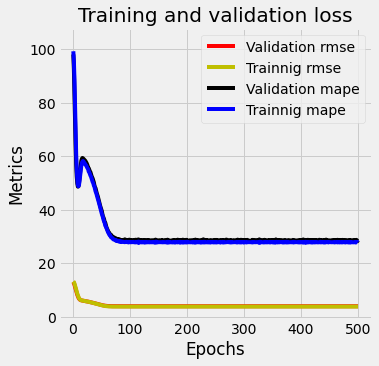

In [35]:
plotme(model2_1)

In [21]:
# inputs: distance + hour
model2_2 = nnmodel(10, num_hlayers=1,Epoch=500)
model2_2

Epoch 1/500
422/422 [==============================] - 1s 846us/step - loss: 627358.4375 - mape: 99.6196 - rmse: 792.0596 - val_loss: 610906.8125 - val_mape: 99.0698 - val_rmse: 781.6053
Epoch 2/500
422/422 [==============================] - 0s 727us/step - loss: 616003.2500 - mape: 98.0419 - rmse: 784.8588 - val_loss: 593881.5625 - val_mape: 96.6162 - val_rmse: 770.6371
Epoch 3/500
422/422 [==============================] - 0s 713us/step - loss: 591606.7500 - mape: 94.5616 - rmse: 769.1598 - val_loss: 563543.5625 - val_mape: 92.1290 - val_rmse: 750.6954
Epoch 4/500
422/422 [==============================] - 0s 719us/step - loss: 555781.9375 - mape: 89.3212 - rmse: 745.5078 - val_loss: 524720.3750 - val_mape: 86.1076 - val_rmse: 724.3759
Epoch 5/500
422/422 [==============================] - 0s 725us/step - loss: 513946.0312 - mape: 82.7719 - rmse: 716.9003 - val_loss: 482199.2812 - val_mape: 79.1837 - val_rmse: 694.4057
Epoch 6/500
422/422 [==============================] - 0s 717us/s

Epoch 45/500
422/422 [==============================] - 0s 755us/step - loss: 101145.4062 - mape: 51.8736 - rmse: 318.0337 - val_loss: 102295.8281 - val_mape: 52.8291 - val_rmse: 319.8372
Epoch 46/500
422/422 [==============================] - 0s 728us/step - loss: 99626.4922 - mape: 51.3405 - rmse: 315.6367 - val_loss: 100833.6016 - val_mape: 52.4812 - val_rmse: 317.5431
Epoch 47/500
422/422 [==============================] - 0s 718us/step - loss: 98087.5781 - mape: 50.8675 - rmse: 313.1894 - val_loss: 99347.1250 - val_mape: 52.0714 - val_rmse: 315.1938
Epoch 48/500
422/422 [==============================] - 0s 726us/step - loss: 96553.2422 - mape: 50.5108 - rmse: 310.7302 - val_loss: 97870.8203 - val_mape: 51.6049 - val_rmse: 312.8431
Epoch 49/500
422/422 [==============================] - 0s 755us/step - loss: 95007.7500 - mape: 50.1175 - rmse: 308.2333 - val_loss: 96358.1250 - val_mape: 51.0038 - val_rmse: 310.4160
Epoch 50/500
422/422 [==============================] - 0s 722us/st

422/422 [==============================] - 0s 719us/step - loss: 52094.8125 - mape: 30.3626 - rmse: 228.2429 - val_loss: 55489.5820 - val_mape: 30.9918 - val_rmse: 235.5623
Epoch 90/500
422/422 [==============================] - 0s 745us/step - loss: 51919.1055 - mape: 30.1280 - rmse: 227.8576 - val_loss: 55322.6641 - val_mape: 30.8012 - val_rmse: 235.2077
Epoch 91/500
422/422 [==============================] - 0s 720us/step - loss: 51762.8281 - mape: 30.0422 - rmse: 227.5145 - val_loss: 55178.6875 - val_mape: 30.5085 - val_rmse: 234.9014
Epoch 92/500
422/422 [==============================] - 0s 725us/step - loss: 51640.1836 - mape: 29.7416 - rmse: 227.2448 - val_loss: 55066.3086 - val_mape: 30.3569 - val_rmse: 234.6621
Epoch 93/500
422/422 [==============================] - 0s 726us/step - loss: 51524.5195 - mape: 29.5482 - rmse: 226.9901 - val_loss: 54956.4375 - val_mape: 30.3395 - val_rmse: 234.4279
Epoch 94/500
422/422 [==============================] - 0s 727us/step - loss: 51430

Epoch 133/500
422/422 [==============================] - 0s 725us/step - loss: 50936.4180 - mape: 27.8577 - rmse: 225.6910 - val_loss: 54417.8281 - val_mape: 28.5943 - val_rmse: 233.2763
Epoch 134/500
422/422 [==============================] - 0s 728us/step - loss: 50936.0234 - mape: 27.8941 - rmse: 225.6901 - val_loss: 54415.2305 - val_mape: 28.6525 - val_rmse: 233.2707
Epoch 135/500
422/422 [==============================] - 0s 721us/step - loss: 50935.2812 - mape: 27.8478 - rmse: 225.6885 - val_loss: 54416.2070 - val_mape: 28.6783 - val_rmse: 233.2728
Epoch 136/500
422/422 [==============================] - 0s 715us/step - loss: 50934.3750 - mape: 27.9020 - rmse: 225.6864 - val_loss: 54410.7500 - val_mape: 28.6244 - val_rmse: 233.2611
Epoch 137/500
422/422 [==============================] - 0s 713us/step - loss: 50932.5391 - mape: 27.9229 - rmse: 225.6824 - val_loss: 54438.2070 - val_mape: 28.4678 - val_rmse: 233.3200
Epoch 138/500
422/422 [==============================] - 0s 719us

Epoch 177/500
422/422 [==============================] - 0s 735us/step - loss: 50934.7188 - mape: 27.7928 - rmse: 225.6872 - val_loss: 54416.5703 - val_mape: 28.5805 - val_rmse: 233.2736
Epoch 178/500
422/422 [==============================] - 0s 742us/step - loss: 50935.1211 - mape: 27.8516 - rmse: 225.6881 - val_loss: 54413.4141 - val_mape: 28.5742 - val_rmse: 233.2668
Epoch 179/500
422/422 [==============================] - 0s 750us/step - loss: 50936.8945 - mape: 27.8633 - rmse: 225.6920 - val_loss: 54420.9141 - val_mape: 28.4836 - val_rmse: 233.2829
Epoch 180/500
422/422 [==============================] - 0s 743us/step - loss: 50931.5781 - mape: 27.8581 - rmse: 225.6803 - val_loss: 54424.8125 - val_mape: 28.4386 - val_rmse: 233.2913
Epoch 181/500
422/422 [==============================] - 0s 721us/step - loss: 50940.0469 - mape: 27.8117 - rmse: 225.6990 - val_loss: 54413.8203 - val_mape: 28.4605 - val_rmse: 233.2677
Epoch 182/500
422/422 [==============================] - 0s 740us

Epoch 221/500
422/422 [==============================] - 0s 765us/step - loss: 50933.2422 - mape: 27.8890 - rmse: 225.6839 - val_loss: 54424.2852 - val_mape: 28.5327 - val_rmse: 233.2901
Epoch 222/500
422/422 [==============================] - 0s 735us/step - loss: 50935.3359 - mape: 27.7915 - rmse: 225.6886 - val_loss: 54425.3906 - val_mape: 28.5202 - val_rmse: 233.2925
Epoch 223/500
422/422 [==============================] - 0s 730us/step - loss: 50936.0586 - mape: 27.9157 - rmse: 225.6902 - val_loss: 54430.4336 - val_mape: 28.4399 - val_rmse: 233.3033
Epoch 224/500
422/422 [==============================] - 0s 747us/step - loss: 50933.2812 - mape: 27.7642 - rmse: 225.6840 - val_loss: 54406.2656 - val_mape: 28.5643 - val_rmse: 233.2515
Epoch 225/500
422/422 [==============================] - 0s 740us/step - loss: 50937.5234 - mape: 27.8834 - rmse: 225.6934 - val_loss: 54418.4258 - val_mape: 28.4694 - val_rmse: 233.2776
Epoch 226/500
422/422 [==============================] - 0s 730us

Epoch 265/500
422/422 [==============================] - 0s 730us/step - loss: 50932.8047 - mape: 27.9145 - rmse: 225.6830 - val_loss: 54421.7812 - val_mape: 28.5162 - val_rmse: 233.2848
Epoch 266/500
422/422 [==============================] - 0s 736us/step - loss: 50937.6016 - mape: 27.8172 - rmse: 225.6936 - val_loss: 54419.4219 - val_mape: 28.5310 - val_rmse: 233.2797
Epoch 267/500
422/422 [==============================] - 0s 734us/step - loss: 50932.2812 - mape: 27.9223 - rmse: 225.6818 - val_loss: 54438.0312 - val_mape: 28.3201 - val_rmse: 233.3196
Epoch 268/500
422/422 [==============================] - 0s 745us/step - loss: 50932.8203 - mape: 27.7250 - rmse: 225.6830 - val_loss: 54410.2969 - val_mape: 28.6024 - val_rmse: 233.2601
Epoch 269/500
422/422 [==============================] - 0s 711us/step - loss: 50936.7070 - mape: 27.8871 - rmse: 225.6916 - val_loss: 54416.9844 - val_mape: 28.4658 - val_rmse: 233.2745
Epoch 270/500
422/422 [==============================] - 0s 702us

Epoch 309/500
422/422 [==============================] - 0s 700us/step - loss: 50936.2578 - mape: 27.8085 - rmse: 225.6906 - val_loss: 54418.0000 - val_mape: 28.5395 - val_rmse: 233.2767
Epoch 310/500
422/422 [==============================] - 0s 709us/step - loss: 50934.8555 - mape: 27.8122 - rmse: 225.6875 - val_loss: 54406.2852 - val_mape: 28.5969 - val_rmse: 233.2516
Epoch 311/500
422/422 [==============================] - 0s 721us/step - loss: 50933.7070 - mape: 27.8989 - rmse: 225.6850 - val_loss: 54416.5742 - val_mape: 28.5181 - val_rmse: 233.2736
Epoch 312/500
422/422 [==============================] - 0s 705us/step - loss: 50935.8398 - mape: 27.8495 - rmse: 225.6897 - val_loss: 54423.3320 - val_mape: 28.4677 - val_rmse: 233.2881
Epoch 313/500
422/422 [==============================] - 0s 793us/step - loss: 50933.5078 - mape: 27.7575 - rmse: 225.6845 - val_loss: 54425.0625 - val_mape: 28.5707 - val_rmse: 233.2918
Epoch 314/500
422/422 [==============================] - 0s 713us

Epoch 353/500
422/422 [==============================] - 0s 734us/step - loss: 50933.2617 - mape: 27.8537 - rmse: 225.6840 - val_loss: 54416.7266 - val_mape: 28.4634 - val_rmse: 233.2739
Epoch 354/500
422/422 [==============================] - 0s 716us/step - loss: 50935.5000 - mape: 27.8832 - rmse: 225.6889 - val_loss: 54418.6055 - val_mape: 28.4506 - val_rmse: 233.2780
Epoch 355/500
422/422 [==============================] - 0s 729us/step - loss: 50930.4609 - mape: 27.7589 - rmse: 225.6778 - val_loss: 54410.0039 - val_mape: 28.6167 - val_rmse: 233.2595
Epoch 356/500
422/422 [==============================] - 0s 703us/step - loss: 50933.6250 - mape: 27.9205 - rmse: 225.6848 - val_loss: 54430.7812 - val_mape: 28.3799 - val_rmse: 233.3040
Epoch 357/500
422/422 [==============================] - 0s 711us/step - loss: 50935.3008 - mape: 27.8587 - rmse: 225.6885 - val_loss: 54432.9297 - val_mape: 28.3751 - val_rmse: 233.3087
Epoch 358/500
422/422 [==============================] - 0s 718us

Epoch 397/500
422/422 [==============================] - 0s 741us/step - loss: 50935.0898 - mape: 27.8139 - rmse: 225.6880 - val_loss: 54425.6016 - val_mape: 28.5600 - val_rmse: 233.2930
Epoch 398/500
422/422 [==============================] - 0s 716us/step - loss: 50935.4570 - mape: 27.8811 - rmse: 225.6888 - val_loss: 54430.0078 - val_mape: 28.3785 - val_rmse: 233.3024
Epoch 399/500
422/422 [==============================] - 0s 700us/step - loss: 50933.6406 - mape: 27.7694 - rmse: 225.6848 - val_loss: 54416.5234 - val_mape: 28.6229 - val_rmse: 233.2735
Epoch 400/500
422/422 [==============================] - 0s 761us/step - loss: 50932.2266 - mape: 27.8482 - rmse: 225.6817 - val_loss: 54411.0352 - val_mape: 28.5552 - val_rmse: 233.2617
Epoch 401/500
422/422 [==============================] - 0s 679us/step - loss: 50935.3984 - mape: 27.8218 - rmse: 225.6887 - val_loss: 54407.4102 - val_mape: 28.6770 - val_rmse: 233.2540
Epoch 402/500
422/422 [==============================] - 0s 716us

Epoch 441/500
422/422 [==============================] - 0s 698us/step - loss: 50939.3086 - mape: 27.9292 - rmse: 225.6974 - val_loss: 54422.0547 - val_mape: 28.5112 - val_rmse: 233.2854
Epoch 442/500
422/422 [==============================] - 0s 699us/step - loss: 50930.1523 - mape: 27.8038 - rmse: 225.6771 - val_loss: 54406.7148 - val_mape: 28.5803 - val_rmse: 233.2525
Epoch 443/500
422/422 [==============================] - 0s 707us/step - loss: 50933.5977 - mape: 27.9224 - rmse: 225.6847 - val_loss: 54424.4883 - val_mape: 28.4073 - val_rmse: 233.2906
Epoch 444/500
422/422 [==============================] - 0s 710us/step - loss: 50937.0117 - mape: 27.7908 - rmse: 225.6923 - val_loss: 54422.8555 - val_mape: 28.4584 - val_rmse: 233.2871
Epoch 445/500
422/422 [==============================] - 0s 774us/step - loss: 50930.3945 - mape: 27.7966 - rmse: 225.6776 - val_loss: 54417.3047 - val_mape: 28.6083 - val_rmse: 233.2752
Epoch 446/500
422/422 [==============================] - 0s 723us

Epoch 485/500
422/422 [==============================] - 0s 675us/step - loss: 50934.8945 - mape: 27.7696 - rmse: 225.6876 - val_loss: 54415.4570 - val_mape: 28.6000 - val_rmse: 233.2712
Epoch 486/500
422/422 [==============================] - 0s 706us/step - loss: 50928.7852 - mape: 27.9498 - rmse: 225.6741 - val_loss: 54423.4297 - val_mape: 28.4151 - val_rmse: 233.2883
Epoch 487/500
422/422 [==============================] - 0s 679us/step - loss: 50934.4414 - mape: 27.7750 - rmse: 225.6866 - val_loss: 54414.6992 - val_mape: 28.5339 - val_rmse: 233.2696
Epoch 488/500
422/422 [==============================] - 0s 702us/step - loss: 50933.7344 - mape: 27.8972 - rmse: 225.6850 - val_loss: 54430.6406 - val_mape: 28.3800 - val_rmse: 233.3038
Epoch 489/500
422/422 [==============================] - 0s 710us/step - loss: 50935.4531 - mape: 27.7819 - rmse: 225.6888 - val_loss: 54421.2500 - val_mape: 28.4912 - val_rmse: 233.2836
Epoch 490/500
422/422 [==============================] - 0s 717us

In [31]:
# plotme(model2_2)

In [22]:
# inputs: distance + hour
model2_3 = nnmodel(5, num_hlayers=1,Epoch=500)
model2_3

Epoch 1/500
422/422 [==============================] - 1s 869us/step - loss: 629287.2500 - mape: 99.8912 - rmse: 793.2763 - val_loss: 615195.4375 - val_mape: 99.6871 - val_rmse: 784.3439
Epoch 2/500
422/422 [==============================] - 0s 720us/step - loss: 625579.6250 - mape: 99.3777 - rmse: 790.9359 - val_loss: 610143.4375 - val_mape: 98.9643 - val_rmse: 781.1168
Epoch 3/500
422/422 [==============================] - 0s 745us/step - loss: 618710.0000 - mape: 98.4287 - rmse: 786.5812 - val_loss: 601331.1875 - val_mape: 97.7115 - val_rmse: 775.4554
Epoch 4/500
422/422 [==============================] - 0s 701us/step - loss: 606925.3750 - mape: 96.7906 - rmse: 779.0541 - val_loss: 587353.3125 - val_mape: 95.6975 - val_rmse: 766.3898
Epoch 5/500
422/422 [==============================] - 0s 711us/step - loss: 591022.6250 - mape: 94.5611 - rmse: 768.7800 - val_loss: 570445.1875 - val_mape: 93.2102 - val_rmse: 755.2782
Epoch 6/500
422/422 [==============================] - 0s 741us/s

Epoch 45/500
422/422 [==============================] - 0s 698us/step - loss: 126464.9766 - mape: 57.8757 - rmse: 355.6191 - val_loss: 127006.9297 - val_mape: 59.2275 - val_rmse: 356.3803
Epoch 46/500
422/422 [==============================] - 0s 729us/step - loss: 125719.6797 - mape: 57.8179 - rmse: 354.5697 - val_loss: 126303.1016 - val_mape: 59.1179 - val_rmse: 355.3915
Epoch 47/500
422/422 [==============================] - 0s 715us/step - loss: 124982.3359 - mape: 57.7700 - rmse: 353.5284 - val_loss: 125604.5391 - val_mape: 59.0092 - val_rmse: 354.4073
Epoch 48/500
422/422 [==============================] - 0s 714us/step - loss: 124253.8516 - mape: 57.6089 - rmse: 352.4966 - val_loss: 124903.1250 - val_mape: 58.8119 - val_rmse: 353.4164
Epoch 49/500
422/422 [==============================] - 0s 732us/step - loss: 123522.8359 - mape: 57.5597 - rmse: 351.4582 - val_loss: 124198.9688 - val_mape: 58.6190 - val_rmse: 352.4187
Epoch 50/500
422/422 [==============================] - 0s 6

Epoch 89/500
422/422 [==============================] - 0s 702us/step - loss: 90797.7500 - mape: 48.7086 - rmse: 301.3267 - val_loss: 92628.0625 - val_mape: 49.8859 - val_rmse: 304.3486
Epoch 90/500
422/422 [==============================] - 0s 861us/step - loss: 89891.5391 - mape: 48.4531 - rmse: 299.8192 - val_loss: 91750.3594 - val_mape: 49.5283 - val_rmse: 302.9032
Epoch 91/500
422/422 [==============================] - 0s 729us/step - loss: 88978.2500 - mape: 48.1446 - rmse: 298.2922 - val_loss: 90862.6719 - val_mape: 49.2635 - val_rmse: 301.4344
Epoch 92/500
422/422 [==============================] - 0s 714us/step - loss: 88060.4297 - mape: 47.9208 - rmse: 296.7498 - val_loss: 89976.2734 - val_mape: 48.8947 - val_rmse: 299.9604
Epoch 93/500
422/422 [==============================] - 0s 754us/step - loss: 87141.7734 - mape: 47.5282 - rmse: 295.1978 - val_loss: 89083.1250 - val_mape: 48.5833 - val_rmse: 298.4680
Epoch 94/500
422/422 [==============================] - 0s 702us/step 

Epoch 133/500
422/422 [==============================] - 0s 735us/step - loss: 57018.1953 - mape: 34.4415 - rmse: 238.7848 - val_loss: 60163.6094 - val_mape: 35.2026 - val_rmse: 245.2827
Epoch 134/500
422/422 [==============================] - 0s 685us/step - loss: 56601.5234 - mape: 34.1302 - rmse: 237.9108 - val_loss: 59763.5703 - val_mape: 34.9105 - val_rmse: 244.4659
Epoch 135/500
422/422 [==============================] - 0s 690us/step - loss: 56196.1289 - mape: 33.8283 - rmse: 237.0572 - val_loss: 59379.1250 - val_mape: 34.7238 - val_rmse: 243.6783
Epoch 136/500
422/422 [==============================] - 0s 728us/step - loss: 55815.7656 - mape: 33.7534 - rmse: 236.2536 - val_loss: 59024.0625 - val_mape: 34.3365 - val_rmse: 242.9487
Epoch 137/500
422/422 [==============================] - 0s 741us/step - loss: 55458.4766 - mape: 33.3541 - rmse: 235.4962 - val_loss: 58680.0898 - val_mape: 34.0929 - val_rmse: 242.2397
Epoch 138/500
422/422 [==============================] - 0s 704us

Epoch 177/500
422/422 [==============================] - 0s 748us/step - loss: 51013.0117 - mape: 28.4440 - rmse: 225.8606 - val_loss: 54507.1289 - val_mape: 29.1447 - val_rmse: 233.4676
Epoch 178/500
422/422 [==============================] - 0s 723us/step - loss: 51003.3945 - mape: 28.5099 - rmse: 225.8393 - val_loss: 54510.6328 - val_mape: 28.9816 - val_rmse: 233.4751
Epoch 179/500
422/422 [==============================] - 0s 765us/step - loss: 51001.1328 - mape: 28.3647 - rmse: 225.8343 - val_loss: 54497.2500 - val_mape: 28.9893 - val_rmse: 233.4465
Epoch 180/500
422/422 [==============================] - 0s 700us/step - loss: 50990.1523 - mape: 28.3190 - rmse: 225.8100 - val_loss: 54483.6562 - val_mape: 29.0424 - val_rmse: 233.4173
Epoch 181/500
422/422 [==============================] - 0s 727us/step - loss: 50983.8867 - mape: 28.2773 - rmse: 225.7961 - val_loss: 54471.1445 - val_mape: 29.0723 - val_rmse: 233.3905
Epoch 182/500
422/422 [==============================] - 0s 762us

Epoch 221/500
422/422 [==============================] - 0s 671us/step - loss: 50928.2695 - mape: 27.9177 - rmse: 225.6729 - val_loss: 54422.9258 - val_mape: 28.5249 - val_rmse: 233.2872
Epoch 222/500
422/422 [==============================] - 0s 726us/step - loss: 50929.1445 - mape: 27.9116 - rmse: 225.6749 - val_loss: 54423.3672 - val_mape: 28.5152 - val_rmse: 233.2882
Epoch 223/500
422/422 [==============================] - 0s 715us/step - loss: 50930.1797 - mape: 27.8734 - rmse: 225.6772 - val_loss: 54418.7148 - val_mape: 28.5147 - val_rmse: 233.2782
Epoch 224/500
422/422 [==============================] - 0s 678us/step - loss: 50930.7109 - mape: 27.8422 - rmse: 225.6783 - val_loss: 54415.9492 - val_mape: 28.5523 - val_rmse: 233.2723
Epoch 225/500
422/422 [==============================] - 0s 722us/step - loss: 50929.8750 - mape: 27.8653 - rmse: 225.6765 - val_loss: 54418.2227 - val_mape: 28.5488 - val_rmse: 233.2771
Epoch 226/500
422/422 [==============================] - 0s 716us

Epoch 265/500
422/422 [==============================] - 0s 709us/step - loss: 50930.2109 - mape: 27.9053 - rmse: 225.6772 - val_loss: 54417.4023 - val_mape: 28.4695 - val_rmse: 233.2754
Epoch 266/500
422/422 [==============================] - 0s 668us/step - loss: 50927.4883 - mape: 27.7819 - rmse: 225.6712 - val_loss: 54412.9336 - val_mape: 28.5554 - val_rmse: 233.2658
Epoch 267/500
422/422 [==============================] - 0s 720us/step - loss: 50929.9023 - mape: 27.8677 - rmse: 225.6765 - val_loss: 54415.5625 - val_mape: 28.5425 - val_rmse: 233.2714
Epoch 268/500
422/422 [==============================] - 0s 716us/step - loss: 50929.6797 - mape: 27.8844 - rmse: 225.6761 - val_loss: 54420.5469 - val_mape: 28.4470 - val_rmse: 233.2821
Epoch 269/500
422/422 [==============================] - 0s 734us/step - loss: 50926.6406 - mape: 27.7884 - rmse: 225.6693 - val_loss: 54412.2734 - val_mape: 28.5455 - val_rmse: 233.2644
Epoch 270/500
422/422 [==============================] - 0s 679us

Epoch 309/500
422/422 [==============================] - 0s 687us/step - loss: 50929.3672 - mape: 27.7972 - rmse: 225.6754 - val_loss: 54415.2109 - val_mape: 28.5154 - val_rmse: 233.2707
Epoch 310/500
422/422 [==============================] - 0s 743us/step - loss: 50930.6094 - mape: 27.8593 - rmse: 225.6781 - val_loss: 54415.4570 - val_mape: 28.5240 - val_rmse: 233.2712
Epoch 311/500
422/422 [==============================] - 0s 691us/step - loss: 50931.8711 - mape: 27.8758 - rmse: 225.6809 - val_loss: 54415.5781 - val_mape: 28.4739 - val_rmse: 233.2715
Epoch 312/500
422/422 [==============================] - 0s 702us/step - loss: 50929.9609 - mape: 27.8098 - rmse: 225.6767 - val_loss: 54420.5117 - val_mape: 28.4698 - val_rmse: 233.2820
Epoch 313/500
422/422 [==============================] - 0s 673us/step - loss: 50927.7148 - mape: 27.8618 - rmse: 225.6717 - val_loss: 54426.4219 - val_mape: 28.4521 - val_rmse: 233.2947
Epoch 314/500
422/422 [==============================] - 0s 676us

Epoch 353/500
422/422 [==============================] - 0s 751us/step - loss: 50929.5820 - mape: 27.9151 - rmse: 225.6758 - val_loss: 54421.7227 - val_mape: 28.4469 - val_rmse: 233.2846
Epoch 354/500
422/422 [==============================] - 0s 729us/step - loss: 50926.9805 - mape: 27.7464 - rmse: 225.6701 - val_loss: 54416.1406 - val_mape: 28.5180 - val_rmse: 233.2727
Epoch 355/500
422/422 [==============================] - 0s 702us/step - loss: 50927.6562 - mape: 27.8916 - rmse: 225.6716 - val_loss: 54420.7734 - val_mape: 28.4614 - val_rmse: 233.2826
Epoch 356/500
422/422 [==============================] - 0s 691us/step - loss: 50926.9414 - mape: 27.7447 - rmse: 225.6700 - val_loss: 54411.9453 - val_mape: 28.5922 - val_rmse: 233.2637
Epoch 357/500
422/422 [==============================] - 0s 677us/step - loss: 50934.3750 - mape: 27.9124 - rmse: 225.6864 - val_loss: 54412.1406 - val_mape: 28.5614 - val_rmse: 233.2641
Epoch 358/500
422/422 [==============================] - 0s 712us

Epoch 397/500
422/422 [==============================] - 0s 724us/step - loss: 50928.5234 - mape: 27.8310 - rmse: 225.6735 - val_loss: 54425.6328 - val_mape: 28.5022 - val_rmse: 233.2930
Epoch 398/500
422/422 [==============================] - 0s 719us/step - loss: 50929.5273 - mape: 27.8716 - rmse: 225.6757 - val_loss: 54429.2383 - val_mape: 28.4402 - val_rmse: 233.3008
Epoch 399/500
422/422 [==============================] - 0s 693us/step - loss: 50928.3711 - mape: 27.8016 - rmse: 225.6732 - val_loss: 54424.1250 - val_mape: 28.4991 - val_rmse: 233.2898
Epoch 400/500
422/422 [==============================] - 0s 687us/step - loss: 50932.1953 - mape: 27.7783 - rmse: 225.6816 - val_loss: 54416.1289 - val_mape: 28.5494 - val_rmse: 233.2726
Epoch 401/500
422/422 [==============================] - 0s 724us/step - loss: 50929.8047 - mape: 27.8404 - rmse: 225.6763 - val_loss: 54422.9375 - val_mape: 28.5024 - val_rmse: 233.2872
Epoch 402/500
422/422 [==============================] - 0s 717us

Epoch 441/500
422/422 [==============================] - 0s 720us/step - loss: 50930.1328 - mape: 27.8394 - rmse: 225.6770 - val_loss: 54421.4023 - val_mape: 28.5209 - val_rmse: 233.2840
Epoch 442/500
422/422 [==============================] - 0s 736us/step - loss: 50929.3047 - mape: 27.8225 - rmse: 225.6752 - val_loss: 54411.8320 - val_mape: 28.5939 - val_rmse: 233.2634
Epoch 443/500
422/422 [==============================] - 0s 727us/step - loss: 50928.2148 - mape: 27.8721 - rmse: 225.6728 - val_loss: 54414.2227 - val_mape: 28.5214 - val_rmse: 233.2686
Epoch 444/500
422/422 [==============================] - 0s 721us/step - loss: 50928.9180 - mape: 27.8623 - rmse: 225.6744 - val_loss: 54413.5898 - val_mape: 28.5173 - val_rmse: 233.2672
Epoch 445/500
422/422 [==============================] - 0s 734us/step - loss: 50928.7070 - mape: 27.8158 - rmse: 225.6739 - val_loss: 54411.6445 - val_mape: 28.5371 - val_rmse: 233.2630
Epoch 446/500
422/422 [==============================] - 0s 720us

Epoch 485/500
422/422 [==============================] - 0s 712us/step - loss: 50928.3516 - mape: 27.8071 - rmse: 225.6731 - val_loss: 54423.4688 - val_mape: 28.4902 - val_rmse: 233.2884
Epoch 486/500
422/422 [==============================] - 0s 687us/step - loss: 50928.3555 - mape: 27.8499 - rmse: 225.6731 - val_loss: 54423.9766 - val_mape: 28.4910 - val_rmse: 233.2895
Epoch 487/500
422/422 [==============================] - 0s 688us/step - loss: 50926.1016 - mape: 27.8050 - rmse: 225.6681 - val_loss: 54415.3242 - val_mape: 28.5311 - val_rmse: 233.2709
Epoch 488/500
422/422 [==============================] - 0s 678us/step - loss: 50929.1289 - mape: 27.8818 - rmse: 225.6748 - val_loss: 54421.8594 - val_mape: 28.4632 - val_rmse: 233.2849
Epoch 489/500
422/422 [==============================] - 0s 709us/step - loss: 50928.8984 - mape: 27.8164 - rmse: 225.6743 - val_loss: 54417.2773 - val_mape: 28.5061 - val_rmse: 233.2751
Epoch 490/500
422/422 [==============================] - 0s 683us

In [25]:
# inputs: distance + hour
model2_4 = nnmodel(10,5, num_hlayers=2,Epoch=500)
model2_4

Epoch 1/500
422/422 [==============================] - 1s 875us/step - loss: 624173.5625 - mape: 99.1785 - rmse: 790.0466 - val_loss: 596436.0000 - val_mape: 96.9553 - val_rmse: 772.2927
Epoch 2/500
422/422 [==============================] - 0s 708us/step - loss: 558499.1250 - mape: 89.4411 - rmse: 747.3280 - val_loss: 477880.8438 - val_mape: 78.1983 - val_rmse: 691.2892
Epoch 3/500
422/422 [==============================] - 0s 747us/step - loss: 393159.5625 - mape: 64.4862 - rmse: 627.0244 - val_loss: 294765.2812 - val_mape: 52.4892 - val_rmse: 542.9229
Epoch 4/500
422/422 [==============================] - 0s 737us/step - loss: 234455.7969 - mape: 49.9671 - rmse: 484.2064 - val_loss: 183255.8750 - val_mape: 49.6090 - val_rmse: 428.0840
Epoch 5/500
422/422 [==============================] - 0s 737us/step - loss: 161618.4062 - mape: 52.2877 - rmse: 402.0179 - val_loss: 145043.0000 - val_mape: 55.1377 - val_rmse: 380.8451
Epoch 6/500
422/422 [==============================] - 0s 691us/s

Epoch 45/500
422/422 [==============================] - 0s 719us/step - loss: 50980.5703 - mape: 27.9287 - rmse: 225.7888 - val_loss: 54446.1289 - val_mape: 28.8361 - val_rmse: 233.3369
Epoch 46/500
422/422 [==============================] - 0s 717us/step - loss: 50973.7031 - mape: 28.0456 - rmse: 225.7736 - val_loss: 54453.2656 - val_mape: 28.2156 - val_rmse: 233.3522
Epoch 47/500
422/422 [==============================] - 0s 707us/step - loss: 50961.4492 - mape: 27.8361 - rmse: 225.7464 - val_loss: 54387.8750 - val_mape: 28.9091 - val_rmse: 233.2121
Epoch 48/500
422/422 [==============================] - 0s 734us/step - loss: 50976.1758 - mape: 27.9356 - rmse: 225.7790 - val_loss: 54442.8594 - val_mape: 28.3603 - val_rmse: 233.3299
Epoch 49/500
422/422 [==============================] - 0s 691us/step - loss: 50968.3750 - mape: 27.9037 - rmse: 225.7618 - val_loss: 54409.1523 - val_mape: 28.5002 - val_rmse: 233.2577
Epoch 50/500
422/422 [==============================] - 0s 725us/step 

422/422 [==============================] - 0s 719us/step - loss: 50960.2461 - mape: 27.8556 - rmse: 225.7438 - val_loss: 54420.8750 - val_mape: 28.5170 - val_rmse: 233.2828
Epoch 90/500
422/422 [==============================] - 0s 723us/step - loss: 50970.4961 - mape: 27.8726 - rmse: 225.7665 - val_loss: 54461.4883 - val_mape: 28.5274 - val_rmse: 233.3699
Epoch 91/500
422/422 [==============================] - 0s 752us/step - loss: 50955.7266 - mape: 27.9015 - rmse: 225.7337 - val_loss: 54475.5898 - val_mape: 28.1443 - val_rmse: 233.4001
Epoch 92/500
422/422 [==============================] - 0s 714us/step - loss: 50974.9375 - mape: 27.7317 - rmse: 225.7763 - val_loss: 54415.6758 - val_mape: 28.8190 - val_rmse: 233.2717
Epoch 93/500
422/422 [==============================] - 0s 750us/step - loss: 50967.8164 - mape: 27.9191 - rmse: 225.7605 - val_loss: 54508.5469 - val_mape: 28.1224 - val_rmse: 233.4707
Epoch 94/500
422/422 [==============================] - 0s 692us/step - loss: 50986

Epoch 133/500
422/422 [==============================] - 0s 735us/step - loss: 50962.8047 - mape: 27.8814 - rmse: 225.7494 - val_loss: 54405.9297 - val_mape: 28.8370 - val_rmse: 233.2508
Epoch 134/500
422/422 [==============================] - 0s 743us/step - loss: 50975.0469 - mape: 27.8713 - rmse: 225.7765 - val_loss: 54523.4102 - val_mape: 27.9157 - val_rmse: 233.5025
Epoch 135/500
422/422 [==============================] - 0s 708us/step - loss: 50962.7500 - mape: 27.7774 - rmse: 225.7493 - val_loss: 54397.2070 - val_mape: 28.7370 - val_rmse: 233.2321
Epoch 136/500
422/422 [==============================] - 0s 749us/step - loss: 50976.6445 - mape: 27.8895 - rmse: 225.7801 - val_loss: 54400.1133 - val_mape: 28.6738 - val_rmse: 233.2383
Epoch 137/500
422/422 [==============================] - 0s 723us/step - loss: 50963.9258 - mape: 27.9185 - rmse: 225.7519 - val_loss: 54469.9453 - val_mape: 28.3066 - val_rmse: 233.3880
Epoch 138/500
422/422 [==============================] - 0s 716us

Epoch 177/500
422/422 [==============================] - 0s 701us/step - loss: 50956.2930 - mape: 27.8264 - rmse: 225.7350 - val_loss: 54374.2617 - val_mape: 28.8460 - val_rmse: 233.1829
Epoch 178/500
422/422 [==============================] - 0s 703us/step - loss: 50969.5586 - mape: 27.8826 - rmse: 225.7644 - val_loss: 54433.1445 - val_mape: 28.7826 - val_rmse: 233.3091
Epoch 179/500
422/422 [==============================] - 0s 741us/step - loss: 50961.6523 - mape: 27.7981 - rmse: 225.7469 - val_loss: 54434.4258 - val_mape: 29.3659 - val_rmse: 233.3119
Epoch 180/500
422/422 [==============================] - 0s 741us/step - loss: 50967.3594 - mape: 27.9368 - rmse: 225.7595 - val_loss: 54423.1680 - val_mape: 28.6535 - val_rmse: 233.2877
Epoch 181/500
422/422 [==============================] - 0s 712us/step - loss: 50959.8633 - mape: 27.8337 - rmse: 225.7429 - val_loss: 54425.2930 - val_mape: 28.7131 - val_rmse: 233.2923
Epoch 182/500
422/422 [==============================] - 0s 721us

Epoch 221/500
422/422 [==============================] - 0s 712us/step - loss: 50971.6133 - mape: 27.9205 - rmse: 225.7689 - val_loss: 54489.6797 - val_mape: 28.0991 - val_rmse: 233.4303
Epoch 222/500
422/422 [==============================] - 0s 733us/step - loss: 50956.9453 - mape: 27.7852 - rmse: 225.7365 - val_loss: 54404.2773 - val_mape: 28.9261 - val_rmse: 233.2472
Epoch 223/500
422/422 [==============================] - 0s 705us/step - loss: 50954.2344 - mape: 27.8631 - rmse: 225.7305 - val_loss: 54420.2500 - val_mape: 28.5865 - val_rmse: 233.2815
Epoch 224/500
422/422 [==============================] - 0s 745us/step - loss: 50970.0898 - mape: 27.8949 - rmse: 225.7656 - val_loss: 54434.7383 - val_mape: 28.2523 - val_rmse: 233.3125
Epoch 225/500
422/422 [==============================] - 0s 725us/step - loss: 50963.8047 - mape: 27.9048 - rmse: 225.7516 - val_loss: 54475.1328 - val_mape: 28.0398 - val_rmse: 233.3991
Epoch 226/500
422/422 [==============================] - 0s 711us

Epoch 265/500
422/422 [==============================] - 0s 719us/step - loss: 50974.6133 - mape: 27.9072 - rmse: 225.7756 - val_loss: 54421.9727 - val_mape: 28.4255 - val_rmse: 233.2852
Epoch 266/500
422/422 [==============================] - 0s 715us/step - loss: 50946.9766 - mape: 27.7619 - rmse: 225.7144 - val_loss: 54377.4375 - val_mape: 28.8809 - val_rmse: 233.1897
Epoch 267/500
422/422 [==============================] - 0s 751us/step - loss: 50959.0039 - mape: 27.9236 - rmse: 225.7410 - val_loss: 54448.8125 - val_mape: 28.2036 - val_rmse: 233.3427
Epoch 268/500
422/422 [==============================] - 0s 705us/step - loss: 50988.5000 - mape: 27.7662 - rmse: 225.8063 - val_loss: 54394.7500 - val_mape: 28.8147 - val_rmse: 233.2268
Epoch 269/500
422/422 [==============================] - 0s 731us/step - loss: 50972.2969 - mape: 27.9808 - rmse: 225.7704 - val_loss: 54470.5391 - val_mape: 28.2599 - val_rmse: 233.3892
Epoch 270/500
422/422 [==============================] - 0s 713us

Epoch 309/500
422/422 [==============================] - 0s 726us/step - loss: 50969.4492 - mape: 27.9085 - rmse: 225.7641 - val_loss: 54541.7578 - val_mape: 27.9109 - val_rmse: 233.5418
Epoch 310/500
422/422 [==============================] - 0s 714us/step - loss: 50973.5273 - mape: 27.7961 - rmse: 225.7732 - val_loss: 54484.9609 - val_mape: 28.1078 - val_rmse: 233.4201
Epoch 311/500
422/422 [==============================] - 0s 707us/step - loss: 50965.5820 - mape: 27.8098 - rmse: 225.7556 - val_loss: 54436.1797 - val_mape: 28.2921 - val_rmse: 233.3156
Epoch 312/500
422/422 [==============================] - 0s 741us/step - loss: 50965.1875 - mape: 27.8405 - rmse: 225.7547 - val_loss: 54421.7812 - val_mape: 28.5443 - val_rmse: 233.2848
Epoch 313/500
422/422 [==============================] - 0s 753us/step - loss: 50962.8398 - mape: 27.8236 - rmse: 225.7495 - val_loss: 54434.6484 - val_mape: 28.8206 - val_rmse: 233.3123
Epoch 314/500
422/422 [==============================] - 0s 753us

Epoch 353/500
422/422 [==============================] - 0s 729us/step - loss: 50948.2773 - mape: 27.9255 - rmse: 225.7173 - val_loss: 54551.2070 - val_mape: 28.0246 - val_rmse: 233.5620
Epoch 354/500
422/422 [==============================] - 0s 738us/step - loss: 50963.0234 - mape: 27.8318 - rmse: 225.7499 - val_loss: 54439.8828 - val_mape: 28.4800 - val_rmse: 233.3236
Epoch 355/500
422/422 [==============================] - 0s 727us/step - loss: 50951.7148 - mape: 27.8761 - rmse: 225.7249 - val_loss: 54424.6992 - val_mape: 28.2568 - val_rmse: 233.2910
Epoch 356/500
422/422 [==============================] - 0s 735us/step - loss: 50959.3828 - mape: 27.7804 - rmse: 225.7419 - val_loss: 54479.9414 - val_mape: 28.4908 - val_rmse: 233.4094
Epoch 357/500
422/422 [==============================] - 0s 746us/step - loss: 50954.6406 - mape: 27.9001 - rmse: 225.7313 - val_loss: 54533.0625 - val_mape: 28.1008 - val_rmse: 233.5231
Epoch 358/500
422/422 [==============================] - 0s 750us

Epoch 397/500
422/422 [==============================] - 0s 740us/step - loss: 50949.9492 - mape: 27.8713 - rmse: 225.7209 - val_loss: 54432.2070 - val_mape: 28.8674 - val_rmse: 233.3071
Epoch 398/500
422/422 [==============================] - 0s 743us/step - loss: 50950.7617 - mape: 27.8810 - rmse: 225.7227 - val_loss: 54431.6055 - val_mape: 28.2194 - val_rmse: 233.3058
Epoch 399/500
422/422 [==============================] - 0s 727us/step - loss: 50947.5312 - mape: 27.9170 - rmse: 225.7156 - val_loss: 54604.7891 - val_mape: 27.7065 - val_rmse: 233.6767
Epoch 400/500
422/422 [==============================] - 0s 741us/step - loss: 50961.3398 - mape: 27.6636 - rmse: 225.7462 - val_loss: 54432.4648 - val_mape: 28.9228 - val_rmse: 233.3077
Epoch 401/500
422/422 [==============================] - 0s 737us/step - loss: 50970.4375 - mape: 27.9268 - rmse: 225.7663 - val_loss: 54472.6016 - val_mape: 28.1527 - val_rmse: 233.3937
Epoch 402/500
422/422 [==============================] - 0s 748us

Epoch 441/500
422/422 [==============================] - 0s 729us/step - loss: 50966.4180 - mape: 27.9136 - rmse: 225.7574 - val_loss: 54436.6484 - val_mape: 28.4598 - val_rmse: 233.3166
Epoch 442/500
422/422 [==============================] - 0s 736us/step - loss: 50968.5234 - mape: 27.8232 - rmse: 225.7621 - val_loss: 54401.9336 - val_mape: 28.7083 - val_rmse: 233.2422
Epoch 443/500
422/422 [==============================] - 0s 746us/step - loss: 50970.3516 - mape: 27.9158 - rmse: 225.7661 - val_loss: 54546.1406 - val_mape: 28.0114 - val_rmse: 233.5511
Epoch 444/500
422/422 [==============================] - 0s 731us/step - loss: 50970.0273 - mape: 27.6658 - rmse: 225.7654 - val_loss: 54405.1367 - val_mape: 28.9560 - val_rmse: 233.2491
Epoch 445/500
422/422 [==============================] - 0s 740us/step - loss: 50958.6797 - mape: 27.8956 - rmse: 225.7403 - val_loss: 54481.3945 - val_mape: 29.0279 - val_rmse: 233.4125
Epoch 446/500
422/422 [==============================] - 0s 743us

Epoch 485/500
422/422 [==============================] - 0s 730us/step - loss: 50971.7891 - mape: 27.8150 - rmse: 225.7693 - val_loss: 54439.0391 - val_mape: 28.2549 - val_rmse: 233.3217
Epoch 486/500
422/422 [==============================] - 0s 727us/step - loss: 50955.3555 - mape: 27.8611 - rmse: 225.7329 - val_loss: 54452.3477 - val_mape: 28.2141 - val_rmse: 233.3503
Epoch 487/500
422/422 [==============================] - 0s 767us/step - loss: 50947.9180 - mape: 27.8810 - rmse: 225.7165 - val_loss: 54583.5195 - val_mape: 27.8295 - val_rmse: 233.6312
Epoch 488/500
422/422 [==============================] - 0s 724us/step - loss: 50967.5195 - mape: 27.8420 - rmse: 225.7599 - val_loss: 54434.5195 - val_mape: 28.3674 - val_rmse: 233.3121
Epoch 489/500
422/422 [==============================] - 0s 752us/step - loss: 50963.2656 - mape: 27.7775 - rmse: 225.7504 - val_loss: 54411.4805 - val_mape: 28.7710 - val_rmse: 233.2627
Epoch 490/500
422/422 [==============================] - 0s 734us

In [26]:
# inputs: distance + hour
model2_5 = nnmodel(20,10, num_hlayers=2,Epoch=500)
model2_5

Epoch 1/500
422/422 [==============================] - 1s 874us/step - loss: 604685.1250 - mape: 96.2523 - rmse: 777.6151 - val_loss: 522700.9062 - val_mape: 85.3082 - val_rmse: 722.9806
Epoch 2/500
422/422 [==============================] - 0s 731us/step - loss: 361913.6562 - mape: 60.4464 - rmse: 601.5926 - val_loss: 199205.6562 - val_mape: 45.1491 - val_rmse: 446.3246
Epoch 3/500
422/422 [==============================] - 0s 765us/step - loss: 152921.2500 - mape: 51.7219 - rmse: 391.0515 - val_loss: 135006.0469 - val_mape: 59.0261 - val_rmse: 367.4317
Epoch 4/500
422/422 [==============================] - 0s 732us/step - loss: 130305.8672 - mape: 58.6365 - rmse: 360.9790 - val_loss: 128096.5781 - val_mape: 59.2914 - val_rmse: 357.9058
Epoch 5/500
422/422 [==============================] - 0s 732us/step - loss: 124295.8828 - mape: 58.1767 - rmse: 352.5562 - val_loss: 122658.4766 - val_mape: 58.7817 - val_rmse: 350.2263
Epoch 6/500
422/422 [==============================] - 0s 734us/s

422/422 [==============================] - 0s 735us/step - loss: 50975.0820 - mape: 27.8010 - rmse: 225.7766 - val_loss: 54386.7305 - val_mape: 28.9554 - val_rmse: 233.2096
Epoch 46/500
422/422 [==============================] - 0s 722us/step - loss: 50997.2383 - mape: 27.9258 - rmse: 225.8257 - val_loss: 54416.7891 - val_mape: 29.0665 - val_rmse: 233.2741
Epoch 47/500
422/422 [==============================] - 0s 740us/step - loss: 50995.3320 - mape: 27.8467 - rmse: 225.8215 - val_loss: 54393.2812 - val_mape: 28.5228 - val_rmse: 233.2237
Epoch 48/500
422/422 [==============================] - 0s 753us/step - loss: 50979.5859 - mape: 27.8664 - rmse: 225.7866 - val_loss: 54433.5469 - val_mape: 28.3562 - val_rmse: 233.3100
Epoch 49/500
422/422 [==============================] - 0s 729us/step - loss: 50980.7344 - mape: 27.8703 - rmse: 225.7891 - val_loss: 54476.2305 - val_mape: 28.1340 - val_rmse: 233.4014
Epoch 50/500
422/422 [==============================] - 0s 732us/step - loss: 50991

422/422 [==============================] - 0s 748us/step - loss: 50982.5820 - mape: 27.8700 - rmse: 225.7932 - val_loss: 54502.0820 - val_mape: 28.2863 - val_rmse: 233.4568
Epoch 90/500
422/422 [==============================] - 0s 730us/step - loss: 50986.3555 - mape: 27.8152 - rmse: 225.8016 - val_loss: 54442.3164 - val_mape: 28.4027 - val_rmse: 233.3288
Epoch 91/500
422/422 [==============================] - 0s 739us/step - loss: 50970.8477 - mape: 27.8267 - rmse: 225.7672 - val_loss: 54413.8320 - val_mape: 28.9842 - val_rmse: 233.2677
Epoch 92/500
422/422 [==============================] - 0s 736us/step - loss: 51020.3828 - mape: 27.9676 - rmse: 225.8769 - val_loss: 54432.9297 - val_mape: 28.3991 - val_rmse: 233.3087
Epoch 93/500
422/422 [==============================] - 0s 740us/step - loss: 50992.2266 - mape: 27.9122 - rmse: 225.8146 - val_loss: 54532.2773 - val_mape: 27.9850 - val_rmse: 233.5215
Epoch 94/500
422/422 [==============================] - 0s 775us/step - loss: 50989

Epoch 133/500
422/422 [==============================] - 0s 740us/step - loss: 51008.3477 - mape: 27.9134 - rmse: 225.8503 - val_loss: 54506.5508 - val_mape: 27.9575 - val_rmse: 233.4664
Epoch 134/500
422/422 [==============================] - 0s 742us/step - loss: 50986.9375 - mape: 27.8455 - rmse: 225.8029 - val_loss: 54417.5781 - val_mape: 28.7279 - val_rmse: 233.2758
Epoch 135/500
422/422 [==============================] - 0s 735us/step - loss: 50983.5234 - mape: 27.8732 - rmse: 225.7953 - val_loss: 54540.3945 - val_mape: 28.5106 - val_rmse: 233.5388
Epoch 136/500
422/422 [==============================] - 0s 742us/step - loss: 51012.2227 - mape: 27.8463 - rmse: 225.8589 - val_loss: 54406.5898 - val_mape: 28.7787 - val_rmse: 233.2522
Epoch 137/500
422/422 [==============================] - 0s 746us/step - loss: 51010.8047 - mape: 27.8456 - rmse: 225.8557 - val_loss: 54417.8516 - val_mape: 28.9863 - val_rmse: 233.2763
Epoch 138/500
422/422 [==============================] - 0s 735us

Epoch 177/500
422/422 [==============================] - 0s 734us/step - loss: 50970.0703 - mape: 27.8456 - rmse: 225.7655 - val_loss: 54441.2188 - val_mape: 29.1723 - val_rmse: 233.3264
Epoch 178/500
422/422 [==============================] - 0s 744us/step - loss: 50984.5430 - mape: 27.8918 - rmse: 225.7976 - val_loss: 54442.9609 - val_mape: 29.0090 - val_rmse: 233.3302
Epoch 179/500
422/422 [==============================] - 0s 758us/step - loss: 50987.7617 - mape: 27.8848 - rmse: 225.8047 - val_loss: 54431.2500 - val_mape: 28.4746 - val_rmse: 233.3051
Epoch 180/500
422/422 [==============================] - 0s 778us/step - loss: 50985.1680 - mape: 27.8331 - rmse: 225.7990 - val_loss: 54413.5156 - val_mape: 29.1490 - val_rmse: 233.2670
Epoch 181/500
422/422 [==============================] - 0s 739us/step - loss: 50982.2344 - mape: 27.8349 - rmse: 225.7925 - val_loss: 54400.6875 - val_mape: 28.8456 - val_rmse: 233.2395
Epoch 182/500
422/422 [==============================] - 0s 738us

Epoch 221/500
422/422 [==============================] - 0s 810us/step - loss: 51008.1758 - mape: 27.9085 - rmse: 225.8499 - val_loss: 54380.7539 - val_mape: 28.7952 - val_rmse: 233.1968
Epoch 222/500
422/422 [==============================] - 0s 797us/step - loss: 50999.5742 - mape: 27.8575 - rmse: 225.8309 - val_loss: 54495.1680 - val_mape: 28.3263 - val_rmse: 233.4420
Epoch 223/500
422/422 [==============================] - 0s 834us/step - loss: 50977.2109 - mape: 27.8639 - rmse: 225.7813 - val_loss: 54471.5781 - val_mape: 29.4523 - val_rmse: 233.3915
Epoch 224/500
422/422 [==============================] - 0s 763us/step - loss: 50998.7500 - mape: 27.9091 - rmse: 225.8290 - val_loss: 54425.6914 - val_mape: 28.4573 - val_rmse: 233.2932
Epoch 225/500
422/422 [==============================] - 0s 748us/step - loss: 51009.5820 - mape: 27.9073 - rmse: 225.8530 - val_loss: 54597.6133 - val_mape: 27.6649 - val_rmse: 233.6613
Epoch 226/500
422/422 [==============================] - 0s 752us

Epoch 265/500
422/422 [==============================] - 0s 751us/step - loss: 50994.0664 - mape: 27.8898 - rmse: 225.8187 - val_loss: 54417.5273 - val_mape: 28.4617 - val_rmse: 233.2757
Epoch 266/500
422/422 [==============================] - 0s 761us/step - loss: 50990.2539 - mape: 27.8715 - rmse: 225.8102 - val_loss: 54453.0742 - val_mape: 28.5865 - val_rmse: 233.3518
Epoch 267/500
422/422 [==============================] - 0s 750us/step - loss: 51002.3008 - mape: 27.8756 - rmse: 225.8369 - val_loss: 54515.1445 - val_mape: 28.0625 - val_rmse: 233.4848
Epoch 268/500
422/422 [==============================] - 0s 747us/step - loss: 51015.6289 - mape: 27.7737 - rmse: 225.8664 - val_loss: 54498.0508 - val_mape: 28.5458 - val_rmse: 233.4482
Epoch 269/500
422/422 [==============================] - 0s 748us/step - loss: 50991.2305 - mape: 27.9265 - rmse: 225.8124 - val_loss: 54398.2891 - val_mape: 28.3929 - val_rmse: 233.2344
Epoch 270/500
422/422 [==============================] - 0s 745us

Epoch 309/500
422/422 [==============================] - 0s 741us/step - loss: 50984.8555 - mape: 27.8756 - rmse: 225.7983 - val_loss: 54420.3359 - val_mape: 28.2406 - val_rmse: 233.2817
Epoch 310/500
422/422 [==============================] - 0s 731us/step - loss: 50984.8633 - mape: 27.8736 - rmse: 225.7983 - val_loss: 54651.7656 - val_mape: 27.7243 - val_rmse: 233.7772
Epoch 311/500
422/422 [==============================] - 0s 741us/step - loss: 50978.6055 - mape: 27.8221 - rmse: 225.7844 - val_loss: 54419.5781 - val_mape: 28.3160 - val_rmse: 233.2800
Epoch 312/500
422/422 [==============================] - 0s 765us/step - loss: 50990.9688 - mape: 27.7888 - rmse: 225.8118 - val_loss: 54432.4180 - val_mape: 28.9812 - val_rmse: 233.3076
Epoch 313/500
422/422 [==============================] - 0s 749us/step - loss: 50983.0742 - mape: 27.8826 - rmse: 225.7943 - val_loss: 54416.2383 - val_mape: 28.6557 - val_rmse: 233.2729
Epoch 314/500
422/422 [==============================] - 0s 741us

Epoch 353/500
422/422 [==============================] - 0s 746us/step - loss: 50998.6094 - mape: 27.9232 - rmse: 225.8287 - val_loss: 54419.9688 - val_mape: 28.2710 - val_rmse: 233.2809
Epoch 354/500
422/422 [==============================] - 0s 758us/step - loss: 50987.7617 - mape: 27.7968 - rmse: 225.8047 - val_loss: 54429.3086 - val_mape: 28.5273 - val_rmse: 233.3009
Epoch 355/500
422/422 [==============================] - 0s 769us/step - loss: 50987.0039 - mape: 27.9123 - rmse: 225.8030 - val_loss: 54413.2266 - val_mape: 28.4521 - val_rmse: 233.2664
Epoch 356/500
422/422 [==============================] - 0s 734us/step - loss: 50998.4609 - mape: 27.7730 - rmse: 225.8284 - val_loss: 54416.5742 - val_mape: 28.4743 - val_rmse: 233.2736
Epoch 357/500
422/422 [==============================] - 0s 741us/step - loss: 51000.2266 - mape: 27.9287 - rmse: 225.8323 - val_loss: 54478.5469 - val_mape: 28.3996 - val_rmse: 233.4064
Epoch 358/500
422/422 [==============================] - 0s 766us

Epoch 397/500
422/422 [==============================] - 0s 748us/step - loss: 50993.6562 - mape: 27.8317 - rmse: 225.8177 - val_loss: 54376.6250 - val_mape: 28.9334 - val_rmse: 233.1880
Epoch 398/500
422/422 [==============================] - 0s 761us/step - loss: 50983.4727 - mape: 27.8640 - rmse: 225.7952 - val_loss: 54450.2891 - val_mape: 29.0555 - val_rmse: 233.3459
Epoch 399/500
422/422 [==============================] - 0s 752us/step - loss: 50983.2109 - mape: 27.9478 - rmse: 225.7946 - val_loss: 54451.9414 - val_mape: 28.0588 - val_rmse: 233.3494
Epoch 400/500
422/422 [==============================] - 0s 768us/step - loss: 51031.8906 - mape: 27.8146 - rmse: 225.9024 - val_loss: 54467.8984 - val_mape: 28.4287 - val_rmse: 233.3836
Epoch 401/500
422/422 [==============================] - 0s 786us/step - loss: 50995.3125 - mape: 27.8304 - rmse: 225.8214 - val_loss: 54438.6484 - val_mape: 28.5854 - val_rmse: 233.3209
Epoch 402/500
422/422 [==============================] - 0s 747us

Epoch 441/500
422/422 [==============================] - 0s 731us/step - loss: 50978.6094 - mape: 27.9329 - rmse: 225.7844 - val_loss: 54468.8516 - val_mape: 28.1922 - val_rmse: 233.3856
Epoch 442/500
422/422 [==============================] - 0s 735us/step - loss: 50994.8438 - mape: 27.7323 - rmse: 225.8204 - val_loss: 54385.0000 - val_mape: 28.7212 - val_rmse: 233.2059
Epoch 443/500
422/422 [==============================] - 0s 781us/step - loss: 50993.9336 - mape: 27.9453 - rmse: 225.8184 - val_loss: 54383.6172 - val_mape: 28.6054 - val_rmse: 233.2030
Epoch 444/500
422/422 [==============================] - 0s 751us/step - loss: 51021.1758 - mape: 27.8948 - rmse: 225.8787 - val_loss: 54412.1797 - val_mape: 28.3757 - val_rmse: 233.2642
Epoch 445/500
422/422 [==============================] - 0s 748us/step - loss: 50996.0703 - mape: 27.8365 - rmse: 225.8231 - val_loss: 54561.0352 - val_mape: 28.0064 - val_rmse: 233.5830
Epoch 446/500
422/422 [==============================] - 0s 714us

Epoch 485/500
422/422 [==============================] - 0s 749us/step - loss: 50966.8594 - mape: 27.8297 - rmse: 225.7584 - val_loss: 54368.0742 - val_mape: 28.8167 - val_rmse: 233.1696
Epoch 486/500
422/422 [==============================] - 0s 724us/step - loss: 50990.8906 - mape: 27.9165 - rmse: 225.8116 - val_loss: 54443.8555 - val_mape: 28.1696 - val_rmse: 233.3321
Epoch 487/500
422/422 [==============================] - 0s 730us/step - loss: 50986.1758 - mape: 27.7750 - rmse: 225.8012 - val_loss: 54415.9492 - val_mape: 29.1998 - val_rmse: 233.2723
Epoch 488/500
422/422 [==============================] - 0s 754us/step - loss: 50989.9961 - mape: 27.8737 - rmse: 225.8096 - val_loss: 54429.9492 - val_mape: 28.8866 - val_rmse: 233.3023
Epoch 489/500
422/422 [==============================] - 0s 758us/step - loss: 50991.4414 - mape: 27.8754 - rmse: 225.8129 - val_loss: 54549.2227 - val_mape: 28.0924 - val_rmse: 233.5578
Epoch 490/500
422/422 [==============================] - 0s 741us

In [14]:
%%time
layer1 = [5,10,20,50,100]
layer2 = [5,10,20,50,100]
matrix_MAPE = np.zeros((5,5)) # Pre-allocate matrix
matrix_RMSE = np.zeros((5,5)) # Pre-allocate matrix

m=0
for i in layer1:

    print('m = ',m)
    n=0
    for j in layer2:
        print('n = ',n)
        model = nnmodel(i,j, num_hlayers=2,Epoch=150)
        matrix_RMSE[m,n] = min(model.history['val_rmse'])/60
        matrix_MAPE[m,n] = min(model.history['val_mape'])/100
        n=n+1
    m=m+1


m =  0
n =  0
Epoch 1/150
422/422 [==============================] - 1s 910us/step - loss: 624238.0000 - mape: 99.1570 - rmse: 790.0873 - val_loss: 596906.8125 - val_mape: 96.9993 - val_rmse: 772.5975
Epoch 2/150
422/422 [==============================] - 0s 730us/step - loss: 561500.1250 - mape: 89.7879 - rmse: 749.3331 - val_loss: 483496.3438 - val_mape: 79.0075 - val_rmse: 695.3390
Epoch 3/150
422/422 [==============================] - 0s 716us/step - loss: 401862.1250 - mape: 64.5914 - rmse: 633.9260 - val_loss: 301627.1562 - val_mape: 51.1164 - val_rmse: 549.2059
Epoch 4/150
422/422 [==============================] - 0s 703us/step - loss: 236211.8125 - mape: 46.9350 - rmse: 486.0163 - val_loss: 178151.2500 - val_mape: 46.3750 - val_rmse: 422.0797
Epoch 5/150
422/422 [==============================] - 0s 722us/step - loss: 157139.1562 - mape: 50.7267 - rmse: 396.4078 - val_loss: 141710.5625 - val_mape: 55.0746 - val_rmse: 376.4446
Epoch 6/150
422/422 [==============================

Epoch 45/150
422/422 [==============================] - 0s 716us/step - loss: 50901.8242 - mape: 27.8885 - rmse: 225.6143 - val_loss: 54325.0469 - val_mape: 28.4262 - val_rmse: 233.0773
Epoch 46/150
422/422 [==============================] - 0s 819us/step - loss: 50873.3906 - mape: 27.7560 - rmse: 225.5513 - val_loss: 54338.8828 - val_mape: 28.5884 - val_rmse: 233.1070
Epoch 47/150
422/422 [==============================] - 0s 767us/step - loss: 50866.8047 - mape: 27.7777 - rmse: 225.5367 - val_loss: 54369.8867 - val_mape: 28.6029 - val_rmse: 233.1735
Epoch 48/150
422/422 [==============================] - 0s 788us/step - loss: 50865.5938 - mape: 27.7946 - rmse: 225.5340 - val_loss: 54351.2930 - val_mape: 28.1746 - val_rmse: 233.1336
Epoch 49/150
422/422 [==============================] - 0s 777us/step - loss: 50796.0820 - mape: 27.7683 - rmse: 225.3799 - val_loss: 54543.9844 - val_mape: 27.4189 - val_rmse: 233.5465
Epoch 50/150
422/422 [==============================] - 0s 779us/step 

422/422 [==============================] - 0s 671us/step - loss: 50239.6836 - mape: 27.0724 - rmse: 224.1421 - val_loss: 53672.0391 - val_mape: 28.0784 - val_rmse: 231.6723
Epoch 90/150
422/422 [==============================] - 0s 712us/step - loss: 50221.5898 - mape: 27.1773 - rmse: 224.1017 - val_loss: 53717.9258 - val_mape: 27.8020 - val_rmse: 231.7713
Epoch 91/150
422/422 [==============================] - 0s 685us/step - loss: 50206.6797 - mape: 27.0637 - rmse: 224.0685 - val_loss: 53725.9062 - val_mape: 27.5808 - val_rmse: 231.7885
Epoch 92/150
422/422 [==============================] - 0s 706us/step - loss: 50195.4414 - mape: 27.0822 - rmse: 224.0434 - val_loss: 53670.1523 - val_mape: 27.6235 - val_rmse: 231.6682
Epoch 93/150
422/422 [==============================] - 0s 699us/step - loss: 50162.4180 - mape: 26.9944 - rmse: 223.9697 - val_loss: 53634.6445 - val_mape: 28.1679 - val_rmse: 231.5916
Epoch 94/150
422/422 [==============================] - 0s 680us/step - loss: 50154

Epoch 133/150
422/422 [==============================] - 0s 723us/step - loss: 49742.7188 - mape: 26.5313 - rmse: 223.0308 - val_loss: 53215.1680 - val_mape: 27.3846 - val_rmse: 230.6841
Epoch 134/150
422/422 [==============================] - 0s 682us/step - loss: 49730.6836 - mape: 26.4524 - rmse: 223.0038 - val_loss: 53205.5703 - val_mape: 27.5538 - val_rmse: 230.6633
Epoch 135/150
422/422 [==============================] - 0s 681us/step - loss: 49721.6172 - mape: 26.4951 - rmse: 222.9834 - val_loss: 53215.6055 - val_mape: 26.9349 - val_rmse: 230.6851
Epoch 136/150
422/422 [==============================] - 0s 753us/step - loss: 49720.3242 - mape: 26.4574 - rmse: 222.9805 - val_loss: 53237.1641 - val_mape: 26.7622 - val_rmse: 230.7318
Epoch 137/150
422/422 [==============================] - 0s 717us/step - loss: 49710.8906 - mape: 26.3847 - rmse: 222.9594 - val_loss: 53195.1875 - val_mape: 27.1939 - val_rmse: 230.6408
Epoch 138/150
422/422 [==============================] - 0s 712us

Epoch 26/150
422/422 [==============================] - 0s 678us/step - loss: 51599.7578 - mape: 29.9194 - rmse: 227.1558 - val_loss: 54885.4570 - val_mape: 29.7858 - val_rmse: 234.2765
Epoch 27/150
422/422 [==============================] - 0s 676us/step - loss: 51297.8945 - mape: 29.1565 - rmse: 226.4904 - val_loss: 54657.2148 - val_mape: 29.8856 - val_rmse: 233.7888
Epoch 28/150
422/422 [==============================] - 0s 682us/step - loss: 51116.4766 - mape: 28.8355 - rmse: 226.0895 - val_loss: 54581.6797 - val_mape: 30.1400 - val_rmse: 233.6272
Epoch 29/150
422/422 [==============================] - 0s 691us/step - loss: 51075.0352 - mape: 28.5616 - rmse: 225.9979 - val_loss: 54435.4688 - val_mape: 29.3662 - val_rmse: 233.3141
Epoch 30/150
422/422 [==============================] - 0s 693us/step - loss: 51021.1055 - mape: 28.3141 - rmse: 225.8785 - val_loss: 54395.1484 - val_mape: 29.1834 - val_rmse: 233.2277
Epoch 31/150
422/422 [==============================] - 0s 765us/step 

422/422 [==============================] - 0s 758us/step - loss: 50639.9141 - mape: 27.5535 - rmse: 225.0331 - val_loss: 54154.5742 - val_mape: 27.7980 - val_rmse: 232.7113
Epoch 71/150
422/422 [==============================] - 0s 667us/step - loss: 50619.3711 - mape: 27.5066 - rmse: 224.9875 - val_loss: 54188.9766 - val_mape: 27.9459 - val_rmse: 232.7853
Epoch 72/150
422/422 [==============================] - 0s 727us/step - loss: 50625.3633 - mape: 27.4782 - rmse: 225.0008 - val_loss: 54122.3984 - val_mape: 27.9474 - val_rmse: 232.6422
Epoch 73/150
422/422 [==============================] - 0s 658us/step - loss: 50594.9727 - mape: 27.5184 - rmse: 224.9333 - val_loss: 54088.4492 - val_mape: 28.0176 - val_rmse: 232.5692
Epoch 74/150
422/422 [==============================] - 0s 708us/step - loss: 50597.9258 - mape: 27.4882 - rmse: 224.9398 - val_loss: 54112.6250 - val_mape: 28.0638 - val_rmse: 232.6212
Epoch 75/150
422/422 [==============================] - 0s 745us/step - loss: 50577

422/422 [==============================] - 0s 737us/step - loss: 50249.0117 - mape: 27.2037 - rmse: 224.1629 - val_loss: 53803.2695 - val_mape: 27.1350 - val_rmse: 231.9553
Epoch 115/150
422/422 [==============================] - 0s 692us/step - loss: 50217.8867 - mape: 27.0331 - rmse: 224.0935 - val_loss: 53768.5898 - val_mape: 27.4486 - val_rmse: 231.8806
Epoch 116/150
422/422 [==============================] - 0s 692us/step - loss: 50209.4336 - mape: 27.0610 - rmse: 224.0746 - val_loss: 53755.5938 - val_mape: 27.6929 - val_rmse: 231.8525
Epoch 117/150
422/422 [==============================] - 0s 633us/step - loss: 50198.7031 - mape: 27.0441 - rmse: 224.0507 - val_loss: 53700.2812 - val_mape: 28.1649 - val_rmse: 231.7332
Epoch 118/150
422/422 [==============================] - 0s 635us/step - loss: 50202.0039 - mape: 27.1469 - rmse: 224.0580 - val_loss: 53750.7227 - val_mape: 27.4737 - val_rmse: 231.8420
Epoch 119/150
422/422 [==============================] - 0s 670us/step - loss: 

Epoch 7/150
422/422 [==============================] - 0s 712us/step - loss: 123910.0547 - mape: 58.3720 - rmse: 352.0086 - val_loss: 122989.1328 - val_mape: 59.3864 - val_rmse: 350.6981
Epoch 8/150
422/422 [==============================] - 0s 730us/step - loss: 119536.5625 - mape: 57.4688 - rmse: 345.7406 - val_loss: 118723.6719 - val_mape: 58.0647 - val_rmse: 344.5630
Epoch 9/150
422/422 [==============================] - 0s 764us/step - loss: 115019.3672 - mape: 56.2911 - rmse: 339.1451 - val_loss: 114318.3203 - val_mape: 57.5849 - val_rmse: 338.1099
Epoch 10/150
422/422 [==============================] - 0s 710us/step - loss: 110233.2188 - mape: 55.3625 - rmse: 332.0139 - val_loss: 109530.0234 - val_mape: 56.0785 - val_rmse: 330.9532
Epoch 11/150
422/422 [==============================] - 0s 718us/step - loss: 105133.4453 - mape: 54.0411 - rmse: 324.2429 - val_loss: 104485.2812 - val_mape: 54.8559 - val_rmse: 323.2418
Epoch 12/150
422/422 [==============================] - 0s 745u

422/422 [==============================] - 0s 905us/step - loss: 50763.8047 - mape: 27.6672 - rmse: 225.3082 - val_loss: 54295.4570 - val_mape: 28.6507 - val_rmse: 233.0139
Epoch 52/150
422/422 [==============================] - 0s 727us/step - loss: 50723.2656 - mape: 27.6511 - rmse: 225.2183 - val_loss: 54268.3789 - val_mape: 28.5181 - val_rmse: 232.9557
Epoch 53/150
422/422 [==============================] - 0s 748us/step - loss: 50751.6250 - mape: 27.6350 - rmse: 225.2812 - val_loss: 54348.5820 - val_mape: 28.4210 - val_rmse: 233.1278
Epoch 54/150
422/422 [==============================] - 0s 835us/step - loss: 50736.6094 - mape: 27.6745 - rmse: 225.2479 - val_loss: 54421.7383 - val_mape: 27.5685 - val_rmse: 233.2847
Epoch 55/150
422/422 [==============================] - 0s 737us/step - loss: 50727.6445 - mape: 27.5999 - rmse: 225.2280 - val_loss: 54310.3945 - val_mape: 28.0339 - val_rmse: 233.0459
Epoch 56/150
422/422 [==============================] - 0s 744us/step - loss: 50722

Epoch 139/150
422/422 [==============================] - 0s 701us/step - loss: 49841.5117 - mape: 26.6080 - rmse: 223.2521 - val_loss: 53424.8750 - val_mape: 27.9830 - val_rmse: 231.1382
Epoch 140/150
422/422 [==============================] - 0s 710us/step - loss: 49842.9180 - mape: 26.5843 - rmse: 223.2553 - val_loss: 53336.7344 - val_mape: 27.7531 - val_rmse: 230.9475
Epoch 141/150
422/422 [==============================] - 0s 674us/step - loss: 49833.8672 - mape: 26.6734 - rmse: 223.2350 - val_loss: 53381.5156 - val_mape: 27.8391 - val_rmse: 231.0444
Epoch 142/150
422/422 [==============================] - 0s 708us/step - loss: 49805.8164 - mape: 26.5975 - rmse: 223.1722 - val_loss: 53437.5547 - val_mape: 26.9623 - val_rmse: 231.1656
Epoch 143/150
422/422 [==============================] - 0s 684us/step - loss: 49814.6055 - mape: 26.6661 - rmse: 223.1919 - val_loss: 53403.3203 - val_mape: 26.7523 - val_rmse: 231.0916
Epoch 144/150
422/422 [==============================] - 0s 671us

Epoch 32/150
422/422 [==============================] - 0s 868us/step - loss: 50890.9805 - mape: 27.8219 - rmse: 225.5903 - val_loss: 54410.9336 - val_mape: 28.8467 - val_rmse: 233.2615
Epoch 33/150
422/422 [==============================] - 0s 825us/step - loss: 50888.2734 - mape: 27.8388 - rmse: 225.5843 - val_loss: 54370.6836 - val_mape: 28.0412 - val_rmse: 233.1752
Epoch 34/150
422/422 [==============================] - 0s 775us/step - loss: 50896.1523 - mape: 27.7551 - rmse: 225.6018 - val_loss: 54311.2578 - val_mape: 29.0487 - val_rmse: 233.0478
Epoch 35/150
422/422 [==============================] - 0s 767us/step - loss: 50894.8125 - mape: 27.8559 - rmse: 225.5988 - val_loss: 54322.6289 - val_mape: 28.3564 - val_rmse: 233.0722
Epoch 36/150
422/422 [==============================] - 0s 733us/step - loss: 50866.0078 - mape: 27.7663 - rmse: 225.5349 - val_loss: 54262.7656 - val_mape: 28.7695 - val_rmse: 232.9437
Epoch 37/150
422/422 [==============================] - 0s 724us/step 

422/422 [==============================] - 0s 772us/step - loss: 50596.6016 - mape: 27.5688 - rmse: 224.9369 - val_loss: 54013.2070 - val_mape: 27.7862 - val_rmse: 232.4074
Epoch 77/150
422/422 [==============================] - 0s 776us/step - loss: 50613.1992 - mape: 27.5283 - rmse: 224.9738 - val_loss: 53980.4766 - val_mape: 27.9095 - val_rmse: 232.3370
Epoch 78/150
422/422 [==============================] - 0s 762us/step - loss: 50584.3750 - mape: 27.5649 - rmse: 224.9097 - val_loss: 53998.0078 - val_mape: 28.0334 - val_rmse: 232.3747
Epoch 79/150
422/422 [==============================] - 0s 750us/step - loss: 50556.4570 - mape: 27.5278 - rmse: 224.8476 - val_loss: 53972.6758 - val_mape: 28.8065 - val_rmse: 232.3202
Epoch 80/150
422/422 [==============================] - 0s 760us/step - loss: 50555.6797 - mape: 27.5679 - rmse: 224.8459 - val_loss: 54005.6719 - val_mape: 27.8545 - val_rmse: 232.3912
Epoch 81/150
422/422 [==============================] - 0s 744us/step - loss: 50541

422/422 [==============================] - 0s 835us/step - loss: 50016.0508 - mape: 26.8833 - rmse: 223.6427 - val_loss: 53466.5625 - val_mape: 27.7145 - val_rmse: 231.2284
Epoch 121/150
422/422 [==============================] - 0s 809us/step - loss: 50008.0664 - mape: 26.9589 - rmse: 223.6248 - val_loss: 53625.4336 - val_mape: 26.6607 - val_rmse: 231.5717
Epoch 122/150
422/422 [==============================] - 0s 817us/step - loss: 50006.1406 - mape: 26.8933 - rmse: 223.6205 - val_loss: 53406.3555 - val_mape: 27.5076 - val_rmse: 231.0981
Epoch 123/150
422/422 [==============================] - 0s 766us/step - loss: 49988.0078 - mape: 26.8822 - rmse: 223.5800 - val_loss: 53472.9258 - val_mape: 27.2841 - val_rmse: 231.2421
Epoch 124/150
422/422 [==============================] - 0s 776us/step - loss: 49984.6602 - mape: 26.8535 - rmse: 223.5725 - val_loss: 53400.9688 - val_mape: 27.6970 - val_rmse: 231.0865
Epoch 125/150
422/422 [==============================] - 0s 781us/step - loss: 

Epoch 13/150
422/422 [==============================] - 0s 722us/step - loss: 58064.9414 - mape: 35.8335 - rmse: 240.9667 - val_loss: 58833.7031 - val_mape: 35.4132 - val_rmse: 242.5566
Epoch 14/150
422/422 [==============================] - 0s 726us/step - loss: 53795.4844 - mape: 32.7215 - rmse: 231.9385 - val_loss: 56168.5742 - val_mape: 31.3732 - val_rmse: 236.9991
Epoch 15/150
422/422 [==============================] - 0s 729us/step - loss: 51979.8359 - mape: 30.3953 - rmse: 227.9909 - val_loss: 55096.6836 - val_mape: 29.7369 - val_rmse: 234.7268
Epoch 16/150
422/422 [==============================] - 0s 760us/step - loss: 51371.7266 - mape: 29.2352 - rmse: 226.6533 - val_loss: 54714.0508 - val_mape: 28.9041 - val_rmse: 233.9104
Epoch 17/150
422/422 [==============================] - 0s 732us/step - loss: 51111.4414 - mape: 28.6425 - rmse: 226.0784 - val_loss: 54626.3750 - val_mape: 28.3029 - val_rmse: 233.7229
Epoch 18/150
422/422 [==============================] - 0s 742us/step 

422/422 [==============================] - 0s 723us/step - loss: 50448.2344 - mape: 27.3093 - rmse: 224.6068 - val_loss: 53840.5781 - val_mape: 28.3494 - val_rmse: 232.0357
Epoch 58/150
422/422 [==============================] - 0s 759us/step - loss: 50460.3398 - mape: 27.3688 - rmse: 224.6338 - val_loss: 54023.1562 - val_mape: 27.1012 - val_rmse: 232.4288
Epoch 59/150
422/422 [==============================] - 0s 724us/step - loss: 50428.7383 - mape: 27.3303 - rmse: 224.5634 - val_loss: 53873.6797 - val_mape: 28.5562 - val_rmse: 232.1070
Epoch 60/150
422/422 [==============================] - 0s 705us/step - loss: 50392.0352 - mape: 27.2583 - rmse: 224.4817 - val_loss: 53921.3867 - val_mape: 28.4433 - val_rmse: 232.2098
Epoch 61/150
422/422 [==============================] - 0s 721us/step - loss: 50397.2812 - mape: 27.2414 - rmse: 224.4934 - val_loss: 53828.7344 - val_mape: 28.9194 - val_rmse: 232.0102
Epoch 62/150
422/422 [==============================] - 0s 763us/step - loss: 50400

Epoch 145/150
422/422 [==============================] - 0s 754us/step - loss: 49648.1797 - mape: 26.2249 - rmse: 222.8187 - val_loss: 53120.4023 - val_mape: 26.6808 - val_rmse: 230.4786
Epoch 146/150
422/422 [==============================] - 0s 752us/step - loss: 49639.0977 - mape: 26.2426 - rmse: 222.7983 - val_loss: 53116.0742 - val_mape: 26.4835 - val_rmse: 230.4693
Epoch 147/150
422/422 [==============================] - 0s 749us/step - loss: 49602.6367 - mape: 26.1104 - rmse: 222.7165 - val_loss: 53160.1367 - val_mape: 27.9541 - val_rmse: 230.5648
Epoch 148/150
422/422 [==============================] - 0s 873us/step - loss: 49646.7695 - mape: 26.2926 - rmse: 222.8156 - val_loss: 53172.5234 - val_mape: 26.5702 - val_rmse: 230.5917
Epoch 149/150
422/422 [==============================] - 0s 815us/step - loss: 49622.4609 - mape: 26.1383 - rmse: 222.7610 - val_loss: 53101.0430 - val_mape: 26.7813 - val_rmse: 230.4366
Epoch 150/150
422/422 [==============================] - 0s 741us

Epoch 38/150
422/422 [==============================] - 0s 761us/step - loss: 50387.4180 - mape: 27.3871 - rmse: 224.4714 - val_loss: 53959.3672 - val_mape: 27.4983 - val_rmse: 232.2915
Epoch 39/150
422/422 [==============================] - 0s 747us/step - loss: 50428.1836 - mape: 27.3407 - rmse: 224.5622 - val_loss: 53886.3203 - val_mape: 27.8460 - val_rmse: 232.1343
Epoch 40/150
422/422 [==============================] - 0s 818us/step - loss: 50373.8164 - mape: 27.3231 - rmse: 224.4411 - val_loss: 53839.1055 - val_mape: 28.6125 - val_rmse: 232.0325
Epoch 41/150
422/422 [==============================] - 0s 775us/step - loss: 50384.6133 - mape: 27.3980 - rmse: 224.4652 - val_loss: 53822.1719 - val_mape: 27.9744 - val_rmse: 231.9961
Epoch 42/150
422/422 [==============================] - 0s 743us/step - loss: 50367.9648 - mape: 27.2812 - rmse: 224.4281 - val_loss: 53788.4961 - val_mape: 28.3904 - val_rmse: 231.9235
Epoch 43/150
422/422 [==============================] - 0s 802us/step 

422/422 [==============================] - 0s 851us/step - loss: 49910.1953 - mape: 26.7911 - rmse: 223.4059 - val_loss: 53398.2422 - val_mape: 27.4776 - val_rmse: 231.0806
Epoch 83/150
422/422 [==============================] - 0s 722us/step - loss: 49870.8359 - mape: 26.7580 - rmse: 223.3178 - val_loss: 53437.5078 - val_mape: 28.0670 - val_rmse: 231.1655
Epoch 84/150
422/422 [==============================] - 0s 729us/step - loss: 49884.2773 - mape: 26.8389 - rmse: 223.3479 - val_loss: 53364.9844 - val_mape: 27.1751 - val_rmse: 231.0086
Epoch 85/150
422/422 [==============================] - 0s 732us/step - loss: 49840.8398 - mape: 26.7127 - rmse: 223.2506 - val_loss: 53412.6562 - val_mape: 28.1927 - val_rmse: 231.1118
Epoch 86/150
422/422 [==============================] - 0s 733us/step - loss: 49864.1016 - mape: 26.7192 - rmse: 223.3027 - val_loss: 53449.8867 - val_mape: 28.3976 - val_rmse: 231.1923
Epoch 87/150
422/422 [==============================] - 0s 700us/step - loss: 49860

Epoch 126/150
422/422 [==============================] - 0s 675us/step - loss: 49457.1953 - mape: 26.4058 - rmse: 222.3897 - val_loss: 53079.8008 - val_mape: 27.0139 - val_rmse: 230.3905
Epoch 127/150
422/422 [==============================] - 0s 648us/step - loss: 49434.2188 - mape: 26.2594 - rmse: 222.3381 - val_loss: 53051.7891 - val_mape: 26.8624 - val_rmse: 230.3297
Epoch 128/150
422/422 [==============================] - 0s 684us/step - loss: 49424.4219 - mape: 26.3924 - rmse: 222.3160 - val_loss: 53161.7695 - val_mape: 26.1812 - val_rmse: 230.5684
Epoch 129/150
422/422 [==============================] - 0s 684us/step - loss: 49416.1953 - mape: 26.3162 - rmse: 222.2975 - val_loss: 53099.9375 - val_mape: 26.4838 - val_rmse: 230.4342
Epoch 130/150
422/422 [==============================] - 0s 707us/step - loss: 49370.8906 - mape: 26.2479 - rmse: 222.1956 - val_loss: 53069.7070 - val_mape: 27.8720 - val_rmse: 230.3686
Epoch 131/150
422/422 [==============================] - 0s 698us

Epoch 19/150
422/422 [==============================] - 0s 708us/step - loss: 53875.6406 - mape: 32.6589 - rmse: 232.1113 - val_loss: 56478.5039 - val_mape: 33.1764 - val_rmse: 237.6521
Epoch 20/150
422/422 [==============================] - 0s 741us/step - loss: 52465.4258 - mape: 31.1494 - rmse: 229.0533 - val_loss: 55477.9766 - val_mape: 31.2205 - val_rmse: 235.5376
Epoch 21/150
422/422 [==============================] - 0s 706us/step - loss: 51724.7734 - mape: 29.9933 - rmse: 227.4308 - val_loss: 54938.4766 - val_mape: 30.6196 - val_rmse: 234.3896
Epoch 22/150
422/422 [==============================] - 0s 708us/step - loss: 51367.7148 - mape: 29.2918 - rmse: 226.6445 - val_loss: 54684.0859 - val_mape: 29.8588 - val_rmse: 233.8463
Epoch 23/150
422/422 [==============================] - 0s 746us/step - loss: 51183.2031 - mape: 28.8377 - rmse: 226.2370 - val_loss: 54555.2031 - val_mape: 29.5863 - val_rmse: 233.5706
Epoch 24/150
422/422 [==============================] - 0s 748us/step 

422/422 [==============================] - 0s 671us/step - loss: 50958.4844 - mape: 27.7685 - rmse: 225.7399 - val_loss: 54434.9180 - val_mape: 28.7629 - val_rmse: 233.3129
Epoch 64/150
422/422 [==============================] - 0s 671us/step - loss: 50996.9531 - mape: 27.9327 - rmse: 225.8250 - val_loss: 54503.9570 - val_mape: 28.0061 - val_rmse: 233.4608
Epoch 65/150
422/422 [==============================] - 0s 707us/step - loss: 50959.3828 - mape: 27.8330 - rmse: 225.7419 - val_loss: 54499.8320 - val_mape: 28.0338 - val_rmse: 233.4520
Epoch 66/150
422/422 [==============================] - 0s 745us/step - loss: 51003.5547 - mape: 27.8417 - rmse: 225.8397 - val_loss: 54524.7656 - val_mape: 28.2711 - val_rmse: 233.5054
Epoch 67/150
422/422 [==============================] - 0s 709us/step - loss: 50979.9219 - mape: 27.9037 - rmse: 225.7873 - val_loss: 54421.8555 - val_mape: 28.8726 - val_rmse: 233.2849
Epoch 68/150
422/422 [==============================] - 0s 744us/step - loss: 50969

minimum training RMSE:  3.760633341471354
minimum training MAPE:  0.2772121047973633
-----------------
minimum testing RMSE:  3.8864517211914062
minimum testing MAPE:  0.27504873275756836
n =  2
Epoch 1/150
422/422 [==============================] - 1s 882us/step - loss: 606299.3750 - mape: 96.4976 - rmse: 778.6523 - val_loss: 527255.1875 - val_mape: 85.8029 - val_rmse: 726.1234
Epoch 2/150
422/422 [==============================] - 0s 723us/step - loss: 369674.2188 - mape: 60.8561 - rmse: 608.0084 - val_loss: 205173.0000 - val_mape: 44.9090 - val_rmse: 452.9603
Epoch 3/150
422/422 [==============================] - 0s 768us/step - loss: 156748.0000 - mape: 51.7183 - rmse: 395.9141 - val_loss: 137352.4688 - val_mape: 59.1045 - val_rmse: 370.6109
Epoch 4/150
422/422 [==============================] - 0s 798us/step - loss: 132965.4844 - mape: 59.0048 - rmse: 364.6443 - val_loss: 130480.8281 - val_mape: 59.9117 - val_rmse: 361.2213
Epoch 5/150
422/422 [==============================] - 0s

Epoch 44/150
422/422 [==============================] - 0s 713us/step - loss: 50632.5547 - mape: 27.5155 - rmse: 225.0168 - val_loss: 54118.6133 - val_mape: 29.0325 - val_rmse: 232.6341
Epoch 45/150
422/422 [==============================] - 0s 752us/step - loss: 50651.5117 - mape: 27.6461 - rmse: 225.0589 - val_loss: 54057.2578 - val_mape: 28.4307 - val_rmse: 232.5022
Epoch 46/150
422/422 [==============================] - 0s 707us/step - loss: 50636.5117 - mape: 27.5613 - rmse: 225.0256 - val_loss: 54074.9609 - val_mape: 27.9177 - val_rmse: 232.5402
Epoch 47/150
422/422 [==============================] - 0s 721us/step - loss: 50595.5625 - mape: 27.4783 - rmse: 224.9346 - val_loss: 54102.8086 - val_mape: 27.7253 - val_rmse: 232.6001
Epoch 48/150
422/422 [==============================] - 0s 723us/step - loss: 50587.7461 - mape: 27.4528 - rmse: 224.9172 - val_loss: 54059.5000 - val_mape: 27.8710 - val_rmse: 232.5070
Epoch 49/150
422/422 [==============================] - 0s 745us/step 

422/422 [==============================] - 0s 757us/step - loss: 49879.0742 - mape: 26.7790 - rmse: 223.3362 - val_loss: 53473.0312 - val_mape: 26.8307 - val_rmse: 231.2424
Epoch 89/150
422/422 [==============================] - 0s 708us/step - loss: 49886.5273 - mape: 26.7967 - rmse: 223.3529 - val_loss: 53566.1875 - val_mape: 26.3141 - val_rmse: 231.4437
Epoch 90/150
422/422 [==============================] - 0s 757us/step - loss: 49882.4766 - mape: 26.6309 - rmse: 223.3439 - val_loss: 53355.0117 - val_mape: 27.5983 - val_rmse: 230.9870
Epoch 91/150
422/422 [==============================] - 0s 724us/step - loss: 49864.7266 - mape: 26.7166 - rmse: 223.3041 - val_loss: 53311.4648 - val_mape: 27.2676 - val_rmse: 230.8928
Epoch 92/150
422/422 [==============================] - 0s 746us/step - loss: 49817.6094 - mape: 26.6931 - rmse: 223.1986 - val_loss: 53263.1406 - val_mape: 27.4487 - val_rmse: 230.7881
Epoch 93/150
422/422 [==============================] - 0s 712us/step - loss: 49820

Epoch 132/150
422/422 [==============================] - 0s 708us/step - loss: 49514.7852 - mape: 26.2257 - rmse: 222.5192 - val_loss: 52982.2891 - val_mape: 26.5578 - val_rmse: 230.1788
Epoch 133/150
422/422 [==============================] - 0s 747us/step - loss: 49552.2266 - mape: 26.2134 - rmse: 222.6033 - val_loss: 52960.6875 - val_mape: 26.8684 - val_rmse: 230.1319
Epoch 134/150
422/422 [==============================] - 0s 745us/step - loss: 49513.6445 - mape: 26.1817 - rmse: 222.5166 - val_loss: 52979.6992 - val_mape: 26.7390 - val_rmse: 230.1732
Epoch 135/150
422/422 [==============================] - 0s 713us/step - loss: 49536.6250 - mape: 26.2438 - rmse: 222.5683 - val_loss: 53017.2969 - val_mape: 26.4361 - val_rmse: 230.2549
Epoch 136/150
422/422 [==============================] - 0s 714us/step - loss: 49535.8047 - mape: 26.1722 - rmse: 222.5664 - val_loss: 52960.6602 - val_mape: 26.8208 - val_rmse: 230.1318
Epoch 137/150
422/422 [==============================] - 0s 713us

Epoch 25/150
422/422 [==============================] - 0s 732us/step - loss: 50970.1797 - mape: 27.7726 - rmse: 225.7658 - val_loss: 54391.7617 - val_mape: 29.4118 - val_rmse: 233.2204
Epoch 26/150
422/422 [==============================] - 0s 763us/step - loss: 50943.0938 - mape: 27.9851 - rmse: 225.7058 - val_loss: 54485.6328 - val_mape: 27.7415 - val_rmse: 233.4216
Epoch 27/150
422/422 [==============================] - 0s 766us/step - loss: 50930.5391 - mape: 27.7612 - rmse: 225.6779 - val_loss: 54409.6953 - val_mape: 27.8787 - val_rmse: 233.2589
Epoch 28/150
422/422 [==============================] - 0s 914us/step - loss: 50984.4883 - mape: 27.7819 - rmse: 225.7975 - val_loss: 54441.9375 - val_mape: 28.0276 - val_rmse: 233.3280
Epoch 29/150
422/422 [==============================] - 0s 789us/step - loss: 50906.7344 - mape: 27.8133 - rmse: 225.6252 - val_loss: 54519.6680 - val_mape: 27.7354 - val_rmse: 233.4945
Epoch 30/150
422/422 [==============================] - 0s 761us/step 

422/422 [==============================] - 0s 696us/step - loss: 50274.8125 - mape: 27.1071 - rmse: 224.2205 - val_loss: 53916.8789 - val_mape: 26.8453 - val_rmse: 232.2001
Epoch 70/150
422/422 [==============================] - 0s 735us/step - loss: 50253.0703 - mape: 27.0985 - rmse: 224.1720 - val_loss: 53673.6992 - val_mape: 27.6560 - val_rmse: 231.6758
Epoch 71/150
422/422 [==============================] - 0s 717us/step - loss: 50252.1445 - mape: 27.0625 - rmse: 224.1699 - val_loss: 53688.5273 - val_mape: 28.3999 - val_rmse: 231.7079
Epoch 72/150
422/422 [==============================] - 0s 762us/step - loss: 50217.9688 - mape: 27.0121 - rmse: 224.0937 - val_loss: 53614.6367 - val_mape: 27.9066 - val_rmse: 231.5483
Epoch 73/150
422/422 [==============================] - 0s 743us/step - loss: 50165.8828 - mape: 27.0330 - rmse: 223.9774 - val_loss: 53633.0078 - val_mape: 28.0080 - val_rmse: 231.5880
Epoch 74/150
422/422 [==============================] - 0s 722us/step - loss: 50146

422/422 [==============================] - 0s 764us/step - loss: 49654.5938 - mape: 26.3142 - rmse: 222.8331 - val_loss: 53349.1211 - val_mape: 26.2082 - val_rmse: 230.9743
Epoch 114/150
422/422 [==============================] - 0s 735us/step - loss: 49665.1875 - mape: 26.3349 - rmse: 222.8569 - val_loss: 53207.3359 - val_mape: 27.5593 - val_rmse: 230.6672
Epoch 115/150
422/422 [==============================] - 0s 738us/step - loss: 49666.3125 - mape: 26.3023 - rmse: 222.8594 - val_loss: 53126.8086 - val_mape: 26.8937 - val_rmse: 230.4925
Epoch 116/150
422/422 [==============================] - 0s 727us/step - loss: 49673.1719 - mape: 26.3216 - rmse: 222.8748 - val_loss: 53142.9141 - val_mape: 27.3269 - val_rmse: 230.5275
Epoch 117/150
422/422 [==============================] - 0s 720us/step - loss: 49673.4727 - mape: 26.3247 - rmse: 222.8755 - val_loss: 53190.6953 - val_mape: 26.5769 - val_rmse: 230.6311
Epoch 118/150
422/422 [==============================] - 0s 737us/step - loss: 

Epoch 6/150
422/422 [==============================] - 0s 747us/step - loss: 106175.3516 - mape: 54.2315 - rmse: 325.8456 - val_loss: 102486.2578 - val_mape: 54.0347 - val_rmse: 320.1347
Epoch 7/150
422/422 [==============================] - 0s 748us/step - loss: 94141.1250 - mape: 50.8131 - rmse: 306.8242 - val_loss: 90483.1797 - val_mape: 50.9392 - val_rmse: 300.8042
Epoch 8/150
422/422 [==============================] - 0s 746us/step - loss: 81343.6094 - mape: 46.7793 - rmse: 285.2080 - val_loss: 77890.9688 - val_mape: 46.1209 - val_rmse: 279.0895
Epoch 9/150
422/422 [==============================] - 0s 754us/step - loss: 68752.3203 - mape: 41.6652 - rmse: 262.2066 - val_loss: 66459.8125 - val_mape: 39.3504 - val_rmse: 257.7980
Epoch 10/150
422/422 [==============================] - 0s 741us/step - loss: 58937.2383 - mape: 36.2984 - rmse: 242.7699 - val_loss: 59110.7656 - val_mape: 36.1476 - val_rmse: 243.1271
Epoch 11/150
422/422 [==============================] - 0s 765us/step - 

422/422 [==============================] - 0s 765us/step - loss: 49949.0273 - mape: 26.8284 - rmse: 223.4928 - val_loss: 53433.7227 - val_mape: 27.4777 - val_rmse: 231.1573
Epoch 51/150
422/422 [==============================] - 0s 775us/step - loss: 49896.9258 - mape: 26.6763 - rmse: 223.3762 - val_loss: 53392.5273 - val_mape: 26.8691 - val_rmse: 231.0682
Epoch 52/150
422/422 [==============================] - 0s 770us/step - loss: 49895.6289 - mape: 26.7566 - rmse: 223.3733 - val_loss: 53307.6562 - val_mape: 27.3702 - val_rmse: 230.8845
Epoch 53/150
422/422 [==============================] - 0s 753us/step - loss: 49841.4023 - mape: 26.6462 - rmse: 223.2519 - val_loss: 53433.2344 - val_mape: 27.8067 - val_rmse: 231.1563
Epoch 54/150
422/422 [==============================] - 0s 789us/step - loss: 49858.4453 - mape: 26.8281 - rmse: 223.2901 - val_loss: 53323.0781 - val_mape: 26.9070 - val_rmse: 230.9179
Epoch 55/150
422/422 [==============================] - 0s 732us/step - loss: 49823

Epoch 138/150
422/422 [==============================] - 0s 766us/step - loss: 49577.0430 - mape: 26.0763 - rmse: 222.6590 - val_loss: 53176.0078 - val_mape: 26.0318 - val_rmse: 230.5992
Epoch 139/150
422/422 [==============================] - 0s 740us/step - loss: 49547.9180 - mape: 26.0214 - rmse: 222.5936 - val_loss: 53137.9883 - val_mape: 26.5511 - val_rmse: 230.5168
Epoch 140/150
422/422 [==============================] - 0s 759us/step - loss: 49589.9688 - mape: 26.1258 - rmse: 222.6880 - val_loss: 53273.9531 - val_mape: 25.8198 - val_rmse: 230.8115
Epoch 141/150
422/422 [==============================] - 0s 765us/step - loss: 49568.9844 - mape: 26.0467 - rmse: 222.6409 - val_loss: 53276.5703 - val_mape: 25.7782 - val_rmse: 230.8172
Epoch 142/150
422/422 [==============================] - 0s 771us/step - loss: 49571.8867 - mape: 26.1148 - rmse: 222.6474 - val_loss: 53075.4688 - val_mape: 26.0888 - val_rmse: 230.3811
Epoch 143/150
422/422 [==============================] - 0s 757us

Epoch 31/150
422/422 [==============================] - 0s 725us/step - loss: 50974.6914 - mape: 27.8112 - rmse: 225.7758 - val_loss: 54382.8672 - val_mape: 28.7087 - val_rmse: 233.2013
Epoch 32/150
422/422 [==============================] - 0s 759us/step - loss: 50953.6016 - mape: 27.8894 - rmse: 225.7290 - val_loss: 54415.2812 - val_mape: 28.2553 - val_rmse: 233.2708
Epoch 33/150
422/422 [==============================] - 0s 718us/step - loss: 50972.7422 - mape: 27.8548 - rmse: 225.7714 - val_loss: 54426.4844 - val_mape: 28.4177 - val_rmse: 233.2948
Epoch 34/150
422/422 [==============================] - 0s 722us/step - loss: 50955.0625 - mape: 27.9219 - rmse: 225.7323 - val_loss: 54535.9609 - val_mape: 27.8292 - val_rmse: 233.5294
Epoch 35/150
422/422 [==============================] - 0s 711us/step - loss: 50944.6250 - mape: 27.8734 - rmse: 225.7092 - val_loss: 54458.7852 - val_mape: 28.5151 - val_rmse: 233.3641
Epoch 36/150
422/422 [==============================] - 0s 725us/step 

422/422 [==============================] - 0s 723us/step - loss: 50874.5078 - mape: 27.8010 - rmse: 225.5538 - val_loss: 54348.6367 - val_mape: 28.0361 - val_rmse: 233.1279
Epoch 76/150
422/422 [==============================] - 0s 745us/step - loss: 50841.1172 - mape: 27.7973 - rmse: 225.4798 - val_loss: 54398.1055 - val_mape: 28.4887 - val_rmse: 233.2340
Epoch 77/150
422/422 [==============================] - 0s 710us/step - loss: 50847.0898 - mape: 27.8246 - rmse: 225.4930 - val_loss: 54289.9766 - val_mape: 28.3671 - val_rmse: 233.0021
Epoch 78/150
422/422 [==============================] - 0s 708us/step - loss: 50826.1172 - mape: 27.8205 - rmse: 225.4465 - val_loss: 54248.3555 - val_mape: 28.8078 - val_rmse: 232.9128
Epoch 79/150
422/422 [==============================] - 0s 708us/step - loss: 50782.0781 - mape: 27.8533 - rmse: 225.3488 - val_loss: 54330.0586 - val_mape: 28.4216 - val_rmse: 233.0881
Epoch 80/150
422/422 [==============================] - 0s 721us/step - loss: 50762

422/422 [==============================] - 0s 709us/step - loss: 49989.1875 - mape: 27.1250 - rmse: 223.5826 - val_loss: 53539.4883 - val_mape: 27.4437 - val_rmse: 231.3860
Epoch 120/150
422/422 [==============================] - 0s 744us/step - loss: 49960.1562 - mape: 27.1222 - rmse: 223.5177 - val_loss: 53493.9414 - val_mape: 27.7563 - val_rmse: 231.2876
Epoch 121/150
422/422 [==============================] - 0s 764us/step - loss: 49992.8516 - mape: 27.0932 - rmse: 223.5908 - val_loss: 53466.1836 - val_mape: 27.8870 - val_rmse: 231.2276
Epoch 122/150
422/422 [==============================] - 0s 754us/step - loss: 49949.0234 - mape: 27.1230 - rmse: 223.4928 - val_loss: 53490.1445 - val_mape: 27.9900 - val_rmse: 231.2794
Epoch 123/150
422/422 [==============================] - 0s 728us/step - loss: 49943.1797 - mape: 27.1226 - rmse: 223.4797 - val_loss: 53472.2500 - val_mape: 27.7649 - val_rmse: 231.2407
Epoch 124/150
422/422 [==============================] - 0s 737us/step - loss: 

Epoch 12/150
422/422 [==============================] - 0s 745us/step - loss: 78237.1250 - mape: 45.3654 - rmse: 279.7090 - val_loss: 77056.1172 - val_mape: 44.1171 - val_rmse: 277.5898
Epoch 13/150
422/422 [==============================] - 0s 779us/step - loss: 70336.9609 - mape: 42.1672 - rmse: 265.2112 - val_loss: 69839.1953 - val_mape: 41.7354 - val_rmse: 264.2711
Epoch 14/150
422/422 [==============================] - 0s 736us/step - loss: 63473.7031 - mape: 39.1395 - rmse: 251.9399 - val_loss: 63817.8945 - val_mape: 37.9365 - val_rmse: 252.6220
Epoch 15/150
422/422 [==============================] - 0s 710us/step - loss: 58187.0625 - mape: 35.8860 - rmse: 241.2199 - val_loss: 59590.6953 - val_mape: 35.0703 - val_rmse: 244.1121
Epoch 16/150
422/422 [==============================] - 0s 744us/step - loss: 54663.6523 - mape: 33.2875 - rmse: 233.8026 - val_loss: 56886.8828 - val_mape: 33.1568 - val_rmse: 238.5097
Epoch 17/150
422/422 [==============================] - 0s 707us/step 

422/422 [==============================] - 0s 718us/step - loss: 50994.8281 - mape: 27.8263 - rmse: 225.8203 - val_loss: 54469.4844 - val_mape: 28.3846 - val_rmse: 233.3870
Epoch 57/150
422/422 [==============================] - 0s 718us/step - loss: 50994.6680 - mape: 27.9430 - rmse: 225.8200 - val_loss: 54526.5273 - val_mape: 27.9614 - val_rmse: 233.5092
Epoch 58/150
422/422 [==============================] - 0s 715us/step - loss: 50970.6250 - mape: 27.8947 - rmse: 225.7668 - val_loss: 54596.2812 - val_mape: 27.9851 - val_rmse: 233.6585
Epoch 59/150
422/422 [==============================] - 0s 713us/step - loss: 50981.1172 - mape: 27.7687 - rmse: 225.7900 - val_loss: 54513.9414 - val_mape: 28.1539 - val_rmse: 233.4822
Epoch 60/150
422/422 [==============================] - 0s 712us/step - loss: 50985.8203 - mape: 27.9054 - rmse: 225.8004 - val_loss: 54524.1953 - val_mape: 28.2870 - val_rmse: 233.5042
Epoch 61/150
422/422 [==============================] - 0s 696us/step - loss: 51005

Epoch 144/150
422/422 [==============================] - 0s 745us/step - loss: 51007.5000 - mape: 27.9301 - rmse: 225.8484 - val_loss: 54428.9805 - val_mape: 28.4360 - val_rmse: 233.3002
Epoch 145/150
422/422 [==============================] - 0s 707us/step - loss: 50997.7227 - mape: 27.8585 - rmse: 225.8268 - val_loss: 54471.1016 - val_mape: 28.3716 - val_rmse: 233.3904
Epoch 146/150
422/422 [==============================] - 0s 746us/step - loss: 50991.8867 - mape: 27.8855 - rmse: 225.8138 - val_loss: 54566.2656 - val_mape: 27.9779 - val_rmse: 233.5942
Epoch 147/150
422/422 [==============================] - 0s 710us/step - loss: 50991.0234 - mape: 27.8597 - rmse: 225.8119 - val_loss: 54415.7930 - val_mape: 28.3031 - val_rmse: 233.2719
Epoch 148/150
422/422 [==============================] - 0s 758us/step - loss: 50999.0703 - mape: 27.7956 - rmse: 225.8297 - val_loss: 54391.5508 - val_mape: 28.6848 - val_rmse: 233.2200
Epoch 149/150
422/422 [==============================] - 0s 713us

Epoch 37/150
422/422 [==============================] - 0s 750us/step - loss: 50238.4961 - mape: 27.1155 - rmse: 224.1395 - val_loss: 53674.9922 - val_mape: 27.4781 - val_rmse: 231.6786
Epoch 38/150
422/422 [==============================] - 0s 754us/step - loss: 50189.3203 - mape: 27.0183 - rmse: 224.0297 - val_loss: 53602.1367 - val_mape: 28.0308 - val_rmse: 231.5213
Epoch 39/150
422/422 [==============================] - 0s 763us/step - loss: 50193.9219 - mape: 27.1477 - rmse: 224.0400 - val_loss: 53831.0820 - val_mape: 26.5361 - val_rmse: 232.0153
Epoch 40/150
422/422 [==============================] - 0s 742us/step - loss: 50146.4180 - mape: 26.9310 - rmse: 223.9340 - val_loss: 53572.3594 - val_mape: 27.9012 - val_rmse: 231.4570
Epoch 41/150
422/422 [==============================] - 0s 764us/step - loss: 50112.1680 - mape: 26.9195 - rmse: 223.8575 - val_loss: 53599.1758 - val_mape: 27.9900 - val_rmse: 231.5150
Epoch 42/150
422/422 [==============================] - 0s 748us/step 

422/422 [==============================] - 0s 761us/step - loss: 49699.3242 - mape: 26.3880 - rmse: 222.9335 - val_loss: 53293.3125 - val_mape: 26.1658 - val_rmse: 230.8534
Epoch 82/150
422/422 [==============================] - 0s 771us/step - loss: 49684.6445 - mape: 26.3276 - rmse: 222.9005 - val_loss: 53305.4375 - val_mape: 26.0539 - val_rmse: 230.8797
Epoch 83/150
422/422 [==============================] - 0s 750us/step - loss: 49670.5508 - mape: 26.2930 - rmse: 222.8689 - val_loss: 53135.1250 - val_mape: 26.9647 - val_rmse: 230.5106
Epoch 84/150
422/422 [==============================] - 0s 750us/step - loss: 49668.7578 - mape: 26.2895 - rmse: 222.8649 - val_loss: 53129.8672 - val_mape: 27.0583 - val_rmse: 230.4992
Epoch 85/150
422/422 [==============================] - 0s 776us/step - loss: 49680.9688 - mape: 26.3450 - rmse: 222.8923 - val_loss: 53226.4531 - val_mape: 26.3495 - val_rmse: 230.7086
Epoch 86/150
422/422 [==============================] - 0s 833us/step - loss: 49681

Epoch 125/150
422/422 [==============================] - 0s 738us/step - loss: 49581.9883 - mape: 26.2357 - rmse: 222.6701 - val_loss: 53079.5156 - val_mape: 26.6398 - val_rmse: 230.3899
Epoch 126/150
422/422 [==============================] - 0s 748us/step - loss: 49636.9102 - mape: 26.1223 - rmse: 222.7934 - val_loss: 53512.8008 - val_mape: 25.5493 - val_rmse: 231.3283
Epoch 127/150
422/422 [==============================] - 0s 735us/step - loss: 49608.6641 - mape: 26.0812 - rmse: 222.7300 - val_loss: 53065.1719 - val_mape: 26.6216 - val_rmse: 230.3588
Epoch 128/150
422/422 [==============================] - 0s 714us/step - loss: 49646.3281 - mape: 26.1995 - rmse: 222.8146 - val_loss: 53116.2930 - val_mape: 26.4129 - val_rmse: 230.4697
Epoch 129/150
422/422 [==============================] - 0s 745us/step - loss: 49600.4805 - mape: 26.1634 - rmse: 222.7117 - val_loss: 53193.9258 - val_mape: 26.0717 - val_rmse: 230.6381
Epoch 130/150
422/422 [==============================] - 0s 717us

Epoch 18/150
422/422 [==============================] - 0s 738us/step - loss: 51022.8242 - mape: 27.8719 - rmse: 225.8823 - val_loss: 54388.2539 - val_mape: 28.7546 - val_rmse: 233.2129
Epoch 19/150
422/422 [==============================] - 0s 737us/step - loss: 51027.3359 - mape: 27.9659 - rmse: 225.8923 - val_loss: 54415.1641 - val_mape: 28.3213 - val_rmse: 233.2706
Epoch 20/150
422/422 [==============================] - 0s 761us/step - loss: 51056.6992 - mape: 27.9204 - rmse: 225.9573 - val_loss: 54492.3203 - val_mape: 28.2875 - val_rmse: 233.4359
Epoch 21/150
422/422 [==============================] - 0s 749us/step - loss: 51034.6641 - mape: 27.8972 - rmse: 225.9085 - val_loss: 54382.6523 - val_mape: 28.5627 - val_rmse: 233.2009
Epoch 22/150
422/422 [==============================] - 0s 726us/step - loss: 51069.0273 - mape: 27.9033 - rmse: 225.9846 - val_loss: 54436.4922 - val_mape: 29.2028 - val_rmse: 233.3163
Epoch 23/150
422/422 [==============================] - 0s 709us/step 

422/422 [==============================] - 0s 738us/step - loss: 50993.8086 - mape: 27.8311 - rmse: 225.8181 - val_loss: 54492.8438 - val_mape: 28.3018 - val_rmse: 233.4370
Epoch 63/150
422/422 [==============================] - 0s 773us/step - loss: 51018.2656 - mape: 27.9561 - rmse: 225.8722 - val_loss: 54412.0078 - val_mape: 28.3394 - val_rmse: 233.2638
Epoch 64/150
422/422 [==============================] - 0s 769us/step - loss: 51008.2461 - mape: 27.8103 - rmse: 225.8501 - val_loss: 54482.6641 - val_mape: 28.0214 - val_rmse: 233.4152
Epoch 65/150
422/422 [==============================] - 0s 731us/step - loss: 51045.8125 - mape: 27.8728 - rmse: 225.9332 - val_loss: 54432.5781 - val_mape: 28.2964 - val_rmse: 233.3079
Epoch 66/150
422/422 [==============================] - 0s 805us/step - loss: 51005.8438 - mape: 27.9125 - rmse: 225.8447 - val_loss: 54454.6484 - val_mape: 28.6244 - val_rmse: 233.3552
Epoch 67/150
422/422 [==============================] - 0s 782us/step - loss: 51033

Epoch 150/150
422/422 [==============================] - 0s 757us/step - loss: 51045.4414 - mape: 27.8549 - rmse: 225.9324 - val_loss: 54520.6797 - val_mape: 27.9674 - val_rmse: 233.4966
minimum training RMSE:  3.7627911885579426
minimum training MAPE:  0.27744709014892577
-----------------
minimum testing RMSE:  3.8863319396972655
minimum testing MAPE:  0.2727871131896973
n =  4
Epoch 1/150
422/422 [==============================] - 1s 934us/step - loss: 481229.0000 - mape: 78.2842 - rmse: 693.7067 - val_loss: 189354.7188 - val_mape: 46.4427 - val_rmse: 435.1491
Epoch 2/150
422/422 [==============================] - 0s 775us/step - loss: 144884.8281 - mape: 57.1078 - rmse: 380.6374 - val_loss: 133911.3750 - val_mape: 61.3069 - val_rmse: 365.9390
Epoch 3/150
422/422 [==============================] - 0s 780us/step - loss: 127191.3594 - mape: 58.9739 - rmse: 356.6390 - val_loss: 122988.2891 - val_mape: 60.9769 - val_rmse: 350.6969
Epoch 4/150
422/422 [==============================] - 0

Epoch 43/150
422/422 [==============================] - 0s 781us/step - loss: 49826.8828 - mape: 26.6037 - rmse: 223.2194 - val_loss: 53315.6094 - val_mape: 27.4642 - val_rmse: 230.9017
Epoch 44/150
422/422 [==============================] - 0s 755us/step - loss: 49835.6875 - mape: 26.5616 - rmse: 223.2391 - val_loss: 53263.0664 - val_mape: 27.9586 - val_rmse: 230.7879
Epoch 45/150
422/422 [==============================] - 0s 776us/step - loss: 49796.4531 - mape: 26.6270 - rmse: 223.1512 - val_loss: 53309.1211 - val_mape: 27.0357 - val_rmse: 230.8877
Epoch 46/150
422/422 [==============================] - 0s 778us/step - loss: 49816.2383 - mape: 26.5959 - rmse: 223.1955 - val_loss: 53319.7266 - val_mape: 26.9820 - val_rmse: 230.9106
Epoch 47/150
422/422 [==============================] - 0s 762us/step - loss: 49778.5625 - mape: 26.4373 - rmse: 223.1111 - val_loss: 53311.0117 - val_mape: 27.0707 - val_rmse: 230.8918
Epoch 48/150
422/422 [==============================] - 0s 766us/step 

422/422 [==============================] - 0s 745us/step - loss: 49584.4492 - mape: 26.1725 - rmse: 222.6757 - val_loss: 53376.4805 - val_mape: 25.6663 - val_rmse: 231.0335
Epoch 88/150
422/422 [==============================] - 0s 742us/step - loss: 49591.5586 - mape: 26.0412 - rmse: 222.6916 - val_loss: 52988.5312 - val_mape: 27.3224 - val_rmse: 230.1924
Epoch 89/150
422/422 [==============================] - 0s 751us/step - loss: 49578.9336 - mape: 26.1647 - rmse: 222.6633 - val_loss: 53103.7344 - val_mape: 27.8333 - val_rmse: 230.4425
Epoch 90/150
422/422 [==============================] - 0s 750us/step - loss: 49577.2734 - mape: 26.1782 - rmse: 222.6595 - val_loss: 53044.8711 - val_mape: 26.9017 - val_rmse: 230.3147
Epoch 91/150
422/422 [==============================] - 0s 739us/step - loss: 49519.6211 - mape: 26.0999 - rmse: 222.5300 - val_loss: 53119.7539 - val_mape: 26.8246 - val_rmse: 230.4772
Epoch 92/150
422/422 [==============================] - 0s 764us/step - loss: 49575

Epoch 131/150
422/422 [==============================] - 0s 762us/step - loss: 49486.9062 - mape: 26.0264 - rmse: 222.4565 - val_loss: 53247.6289 - val_mape: 25.5336 - val_rmse: 230.7545
Epoch 132/150
422/422 [==============================] - 0s 746us/step - loss: 49441.3086 - mape: 25.8726 - rmse: 222.3540 - val_loss: 52915.4844 - val_mape: 27.1559 - val_rmse: 230.0337
Epoch 133/150
422/422 [==============================] - 0s 737us/step - loss: 49477.8711 - mape: 25.9402 - rmse: 222.4362 - val_loss: 53128.5703 - val_mape: 25.8584 - val_rmse: 230.4964
Epoch 134/150
422/422 [==============================] - 0s 768us/step - loss: 49486.7305 - mape: 25.9560 - rmse: 222.4561 - val_loss: 52835.1016 - val_mape: 26.7682 - val_rmse: 229.8589
Epoch 135/150
422/422 [==============================] - 0s 757us/step - loss: 49443.7695 - mape: 25.9658 - rmse: 222.3595 - val_loss: 53074.2734 - val_mape: 27.4013 - val_rmse: 230.3785
Epoch 136/150
422/422 [==============================] - 0s 749us

Epoch 24/150
422/422 [==============================] - 0s 734us/step - loss: 50940.5000 - mape: 27.9057 - rmse: 225.7000 - val_loss: 54471.6484 - val_mape: 27.9836 - val_rmse: 233.3916
Epoch 25/150
422/422 [==============================] - 0s 762us/step - loss: 50947.0547 - mape: 27.8683 - rmse: 225.7145 - val_loss: 54379.2109 - val_mape: 28.8581 - val_rmse: 233.1935
Epoch 26/150
422/422 [==============================] - 0s 750us/step - loss: 50959.6953 - mape: 27.9207 - rmse: 225.7425 - val_loss: 54469.9766 - val_mape: 28.5806 - val_rmse: 233.3880
Epoch 27/150
422/422 [==============================] - 0s 749us/step - loss: 50961.9570 - mape: 27.8355 - rmse: 225.7476 - val_loss: 54396.2344 - val_mape: 28.8273 - val_rmse: 233.2300
Epoch 28/150
422/422 [==============================] - 0s 734us/step - loss: 50929.6250 - mape: 27.8463 - rmse: 225.6759 - val_loss: 54358.8789 - val_mape: 28.6961 - val_rmse: 233.1499
Epoch 29/150
422/422 [==============================] - 0s 716us/step 

422/422 [==============================] - 0s 743us/step - loss: 50355.7227 - mape: 27.4985 - rmse: 224.4008 - val_loss: 53775.2266 - val_mape: 28.1201 - val_rmse: 231.8949
Epoch 69/150
422/422 [==============================] - 0s 752us/step - loss: 50334.4531 - mape: 27.5210 - rmse: 224.3534 - val_loss: 53781.9102 - val_mape: 28.1582 - val_rmse: 231.9093
Epoch 70/150
422/422 [==============================] - 0s 749us/step - loss: 50252.5117 - mape: 27.4563 - rmse: 224.1707 - val_loss: 53950.7695 - val_mape: 29.0330 - val_rmse: 232.2731
Epoch 71/150
422/422 [==============================] - 0s 828us/step - loss: 50305.4062 - mape: 27.4759 - rmse: 224.2887 - val_loss: 53796.1836 - val_mape: 29.1925 - val_rmse: 231.9400
Epoch 72/150
422/422 [==============================] - 0s 766us/step - loss: 50272.1016 - mape: 27.5240 - rmse: 224.2144 - val_loss: 53714.3164 - val_mape: 27.9953 - val_rmse: 231.7635
Epoch 73/150
422/422 [==============================] - 0s 754us/step - loss: 50259

422/422 [==============================] - 0s 728us/step - loss: 49729.6719 - mape: 26.9537 - rmse: 223.0015 - val_loss: 53285.4688 - val_mape: 27.5276 - val_rmse: 230.8365
Epoch 113/150
422/422 [==============================] - 0s 751us/step - loss: 49708.7305 - mape: 26.9437 - rmse: 222.9545 - val_loss: 53286.9688 - val_mape: 27.3096 - val_rmse: 230.8397
Epoch 114/150
422/422 [==============================] - 0s 705us/step - loss: 49708.6953 - mape: 26.9533 - rmse: 222.9545 - val_loss: 53324.9336 - val_mape: 27.3174 - val_rmse: 230.9219
Epoch 115/150
422/422 [==============================] - 0s 719us/step - loss: 49715.6719 - mape: 26.9319 - rmse: 222.9701 - val_loss: 53335.3203 - val_mape: 27.0239 - val_rmse: 230.9444
Epoch 116/150
422/422 [==============================] - 0s 724us/step - loss: 49715.1914 - mape: 26.8591 - rmse: 222.9690 - val_loss: 53308.7812 - val_mape: 27.0981 - val_rmse: 230.8869
Epoch 117/150
422/422 [==============================] - 0s 735us/step - loss: 

Epoch 5/150
422/422 [==============================] - 0s 898us/step - loss: 109989.3359 - mape: 54.3427 - rmse: 331.6464 - val_loss: 105808.7031 - val_mape: 54.1463 - val_rmse: 325.2825
Epoch 6/150
422/422 [==============================] - 0s 869us/step - loss: 97882.5625 - mape: 50.9107 - rmse: 312.8619 - val_loss: 93893.3281 - val_mape: 51.4432 - val_rmse: 306.4202
Epoch 7/150
422/422 [==============================] - 0s 863us/step - loss: 85054.0312 - mape: 47.1024 - rmse: 291.6402 - val_loss: 81123.2109 - val_mape: 44.9340 - val_rmse: 284.8214
Epoch 8/150
422/422 [==============================] - 0s 942us/step - loss: 72557.9531 - mape: 42.4284 - rmse: 269.3658 - val_loss: 69810.0859 - val_mape: 40.3299 - val_rmse: 264.2160
Epoch 9/150
422/422 [==============================] - 0s 879us/step - loss: 62200.8203 - mape: 37.4793 - rmse: 249.4009 - val_loss: 61427.3320 - val_mape: 36.7878 - val_rmse: 247.8454
Epoch 10/150
422/422 [==============================] - 0s 870us/step - l

422/422 [==============================] - 0s 863us/step - loss: 49585.8320 - mape: 26.3320 - rmse: 222.6788 - val_loss: 53242.9492 - val_mape: 26.5462 - val_rmse: 230.7443
Epoch 94/150
422/422 [==============================] - 0s 755us/step - loss: 49563.0234 - mape: 26.2968 - rmse: 222.6275 - val_loss: 53043.2344 - val_mape: 27.6982 - val_rmse: 230.3112
Epoch 95/150
422/422 [==============================] - 0s 762us/step - loss: 49573.6602 - mape: 26.3772 - rmse: 222.6514 - val_loss: 53072.0195 - val_mape: 27.3159 - val_rmse: 230.3737
Epoch 96/150
422/422 [==============================] - 0s 761us/step - loss: 49532.7422 - mape: 26.3193 - rmse: 222.5595 - val_loss: 53099.0352 - val_mape: 26.5435 - val_rmse: 230.4323
Epoch 97/150
422/422 [==============================] - 0s 779us/step - loss: 49516.9102 - mape: 26.2629 - rmse: 222.5240 - val_loss: 53046.5430 - val_mape: 27.2917 - val_rmse: 230.3183
Epoch 98/150
422/422 [==============================] - 0s 786us/step - loss: 49537

Epoch 137/150
422/422 [==============================] - 0s 735us/step - loss: 49391.1562 - mape: 26.1263 - rmse: 222.2412 - val_loss: 53020.5000 - val_mape: 27.1944 - val_rmse: 230.2618
Epoch 138/150
422/422 [==============================] - 0s 750us/step - loss: 49425.0391 - mape: 26.0702 - rmse: 222.3174 - val_loss: 53069.9141 - val_mape: 26.2047 - val_rmse: 230.3691
Epoch 139/150
422/422 [==============================] - 0s 811us/step - loss: 49398.1562 - mape: 26.1098 - rmse: 222.2570 - val_loss: 53006.9727 - val_mape: 26.4417 - val_rmse: 230.2324
Epoch 140/150
422/422 [==============================] - 0s 782us/step - loss: 49396.3828 - mape: 26.0567 - rmse: 222.2530 - val_loss: 53006.4766 - val_mape: 26.6345 - val_rmse: 230.2314
Epoch 141/150
422/422 [==============================] - 0s 831us/step - loss: 49390.2812 - mape: 26.1298 - rmse: 222.2392 - val_loss: 53064.3516 - val_mape: 26.4566 - val_rmse: 230.3570
Epoch 142/150
422/422 [==============================] - 0s 745us

Epoch 30/150
422/422 [==============================] - 0s 803us/step - loss: 50937.5703 - mape: 27.7862 - rmse: 225.6935 - val_loss: 54529.3906 - val_mape: 27.7489 - val_rmse: 233.5153
Epoch 31/150
422/422 [==============================] - 0s 810us/step - loss: 50954.0352 - mape: 27.7346 - rmse: 225.7300 - val_loss: 54299.2656 - val_mape: 28.6879 - val_rmse: 233.0220
Epoch 32/150
422/422 [==============================] - 0s 749us/step - loss: 50882.5703 - mape: 27.7627 - rmse: 225.5717 - val_loss: 54389.6250 - val_mape: 27.9090 - val_rmse: 233.2158
Epoch 33/150
422/422 [==============================] - 0s 772us/step - loss: 50902.4180 - mape: 27.7070 - rmse: 225.6156 - val_loss: 54721.3672 - val_mape: 27.2538 - val_rmse: 233.9260
Epoch 34/150
422/422 [==============================] - 0s 758us/step - loss: 50892.5117 - mape: 27.7442 - rmse: 225.5937 - val_loss: 54430.3438 - val_mape: 27.8031 - val_rmse: 233.3031
Epoch 35/150
422/422 [==============================] - 0s 740us/step 

422/422 [==============================] - 0s 780us/step - loss: 49740.6445 - mape: 26.3733 - rmse: 223.0261 - val_loss: 53264.4609 - val_mape: 27.8868 - val_rmse: 230.7909
Epoch 75/150
422/422 [==============================] - 0s 757us/step - loss: 49722.6914 - mape: 26.4242 - rmse: 222.9859 - val_loss: 53418.9883 - val_mape: 26.0014 - val_rmse: 231.1255
Epoch 76/150
422/422 [==============================] - 0s 864us/step - loss: 49746.5938 - mape: 26.3722 - rmse: 223.0394 - val_loss: 53179.5742 - val_mape: 26.6656 - val_rmse: 230.6070
Epoch 77/150
422/422 [==============================] - 0s 793us/step - loss: 49705.5898 - mape: 26.2884 - rmse: 222.9475 - val_loss: 53097.2773 - val_mape: 26.8884 - val_rmse: 230.4285
Epoch 78/150
422/422 [==============================] - 0s 762us/step - loss: 49701.5703 - mape: 26.3285 - rmse: 222.9385 - val_loss: 53159.4492 - val_mape: 26.3577 - val_rmse: 230.5633
Epoch 79/150
422/422 [==============================] - 0s 733us/step - loss: 49675

422/422 [==============================] - 0s 1ms/step - loss: 49645.4180 - mape: 26.0804 - rmse: 222.8125 - val_loss: 53046.6523 - val_mape: 26.8793 - val_rmse: 230.3186
Epoch 119/150
422/422 [==============================] - 0s 793us/step - loss: 49629.5312 - mape: 26.0480 - rmse: 222.7769 - val_loss: 53198.0898 - val_mape: 27.8591 - val_rmse: 230.6471
Epoch 120/150
422/422 [==============================] - 0s 782us/step - loss: 49665.9766 - mape: 26.1510 - rmse: 222.8586 - val_loss: 53142.9609 - val_mape: 26.4422 - val_rmse: 230.5276
Epoch 121/150
422/422 [==============================] - 0s 810us/step - loss: 49612.9297 - mape: 26.1062 - rmse: 222.7396 - val_loss: 53400.2188 - val_mape: 25.5821 - val_rmse: 231.0849
Epoch 122/150
422/422 [==============================] - 0s 788us/step - loss: 49687.5547 - mape: 26.0566 - rmse: 222.9071 - val_loss: 53175.6016 - val_mape: 26.0914 - val_rmse: 230.5984
Epoch 123/150
422/422 [==============================] - 0s 1ms/step - loss: 4964

Epoch 11/150
422/422 [==============================] - 0s 758us/step - loss: 51106.3789 - mape: 27.9046 - rmse: 226.0672 - val_loss: 54452.5312 - val_mape: 29.2043 - val_rmse: 233.3507
Epoch 12/150
422/422 [==============================] - 0s 738us/step - loss: 51045.5469 - mape: 27.9378 - rmse: 225.9326 - val_loss: 54539.6172 - val_mape: 29.8456 - val_rmse: 233.5372
Epoch 13/150
422/422 [==============================] - 0s 747us/step - loss: 51013.2617 - mape: 27.9752 - rmse: 225.8612 - val_loss: 54522.9375 - val_mape: 28.8674 - val_rmse: 233.5015
Epoch 14/150
422/422 [==============================] - 0s 751us/step - loss: 51105.0781 - mape: 27.8569 - rmse: 226.0643 - val_loss: 54404.3711 - val_mape: 28.4399 - val_rmse: 233.2475
Epoch 15/150
422/422 [==============================] - 0s 771us/step - loss: 51017.4297 - mape: 27.7965 - rmse: 225.8704 - val_loss: 54380.9297 - val_mape: 29.2732 - val_rmse: 233.1972
Epoch 16/150
422/422 [==============================] - 0s 731us/step 

422/422 [==============================] - 0s 821us/step - loss: 50123.9609 - mape: 26.8998 - rmse: 223.8838 - val_loss: 53503.4102 - val_mape: 28.3223 - val_rmse: 231.3080
Epoch 56/150
422/422 [==============================] - 0s 809us/step - loss: 50109.8867 - mape: 26.9559 - rmse: 223.8524 - val_loss: 53476.7188 - val_mape: 27.6757 - val_rmse: 231.2503
Epoch 57/150
422/422 [==============================] - 0s 762us/step - loss: 50116.4805 - mape: 26.9175 - rmse: 223.8671 - val_loss: 53613.6992 - val_mape: 28.3663 - val_rmse: 231.5463
Epoch 58/150
422/422 [==============================] - 0s 774us/step - loss: 50049.8555 - mape: 26.9334 - rmse: 223.7182 - val_loss: 53439.4336 - val_mape: 27.3816 - val_rmse: 231.1697
Epoch 59/150
422/422 [==============================] - 0s 768us/step - loss: 50086.8711 - mape: 26.8780 - rmse: 223.8010 - val_loss: 53444.5117 - val_mape: 27.7720 - val_rmse: 231.1807
Epoch 60/150
422/422 [==============================] - 0s 771us/step - loss: 50017

Epoch 143/150
422/422 [==============================] - 0s 791us/step - loss: 49657.9883 - mape: 26.0784 - rmse: 222.8407 - val_loss: 53123.3438 - val_mape: 27.6407 - val_rmse: 230.4850
Epoch 144/150
422/422 [==============================] - 0s 749us/step - loss: 49671.6523 - mape: 26.1345 - rmse: 222.8714 - val_loss: 53115.6055 - val_mape: 27.4885 - val_rmse: 230.4682
Epoch 145/150
422/422 [==============================] - 0s 789us/step - loss: 49679.4180 - mape: 26.1044 - rmse: 222.8888 - val_loss: 53079.8711 - val_mape: 27.3050 - val_rmse: 230.3907
Epoch 146/150
422/422 [==============================] - 0s 779us/step - loss: 49680.1484 - mape: 26.0814 - rmse: 222.8904 - val_loss: 53100.6523 - val_mape: 27.5214 - val_rmse: 230.4358
Epoch 147/150
422/422 [==============================] - 0s 780us/step - loss: 49644.0273 - mape: 26.1397 - rmse: 222.8094 - val_loss: 53337.5195 - val_mape: 25.6437 - val_rmse: 230.9492
Epoch 148/150
422/422 [==============================] - 0s 765us

Epoch 36/150
422/422 [==============================] - 0s 858us/step - loss: 51037.7070 - mape: 27.8895 - rmse: 225.9153 - val_loss: 54375.3633 - val_mape: 29.4859 - val_rmse: 233.1853
Epoch 37/150
422/422 [==============================] - 0s 836us/step - loss: 51039.2266 - mape: 27.8381 - rmse: 225.9186 - val_loss: 54422.1016 - val_mape: 27.8376 - val_rmse: 233.2854
Epoch 38/150
422/422 [==============================] - 0s 787us/step - loss: 50972.5039 - mape: 27.6860 - rmse: 225.7709 - val_loss: 54336.5508 - val_mape: 28.2964 - val_rmse: 233.1020
Epoch 39/150
422/422 [==============================] - 0s 786us/step - loss: 50919.6953 - mape: 27.6570 - rmse: 225.6539 - val_loss: 54243.6719 - val_mape: 28.1917 - val_rmse: 232.9027
Epoch 40/150
422/422 [==============================] - 0s 825us/step - loss: 50966.0781 - mape: 27.7888 - rmse: 225.7567 - val_loss: 54512.6875 - val_mape: 27.3888 - val_rmse: 233.4795
Epoch 41/150
422/422 [==============================] - 0s 844us/step 

422/422 [==============================] - 0s 784us/step - loss: 49815.6445 - mape: 26.5642 - rmse: 223.1942 - val_loss: 53641.4492 - val_mape: 25.8111 - val_rmse: 231.6062
Epoch 81/150
422/422 [==============================] - 0s 781us/step - loss: 49807.2812 - mape: 26.4649 - rmse: 223.1754 - val_loss: 53270.0391 - val_mape: 26.6722 - val_rmse: 230.8030
Epoch 82/150
422/422 [==============================] - 0s 785us/step - loss: 49772.6680 - mape: 26.4597 - rmse: 223.0979 - val_loss: 53442.5938 - val_mape: 27.5927 - val_rmse: 231.1765
Epoch 83/150
422/422 [==============================] - 0s 784us/step - loss: 49790.2539 - mape: 26.4855 - rmse: 223.1373 - val_loss: 53346.9922 - val_mape: 26.3534 - val_rmse: 230.9697
Epoch 84/150
422/422 [==============================] - 0s 775us/step - loss: 49777.5664 - mape: 26.4314 - rmse: 223.1089 - val_loss: 53313.8750 - val_mape: 26.8152 - val_rmse: 230.8980
Epoch 85/150
422/422 [==============================] - 0s 780us/step - loss: 49743

Epoch 124/150
422/422 [==============================] - 0s 775us/step - loss: 49674.8008 - mape: 26.1109 - rmse: 222.8784 - val_loss: 53258.4766 - val_mape: 26.9890 - val_rmse: 230.7780
Epoch 125/150
422/422 [==============================] - 0s 784us/step - loss: 49700.2227 - mape: 26.1256 - rmse: 222.9355 - val_loss: 53228.0625 - val_mape: 27.1325 - val_rmse: 230.7121
Epoch 126/150
422/422 [==============================] - 0s 774us/step - loss: 49712.8164 - mape: 26.1024 - rmse: 222.9637 - val_loss: 53161.5234 - val_mape: 27.7348 - val_rmse: 230.5678
Epoch 127/150
422/422 [==============================] - 0s 775us/step - loss: 49676.6094 - mape: 26.1377 - rmse: 222.8825 - val_loss: 53085.5117 - val_mape: 27.1091 - val_rmse: 230.4029
Epoch 128/150
422/422 [==============================] - 0s 780us/step - loss: 49685.5391 - mape: 26.1883 - rmse: 222.9025 - val_loss: 53342.8945 - val_mape: 25.6364 - val_rmse: 230.9608
Epoch 129/150
422/422 [==============================] - 0s 787us

Epoch 17/150
422/422 [==============================] - 0s 882us/step - loss: 51059.2969 - mape: 28.2337 - rmse: 225.9630 - val_loss: 54466.9805 - val_mape: 29.1125 - val_rmse: 233.3816
Epoch 18/150
422/422 [==============================] - 0s 820us/step - loss: 51019.1484 - mape: 28.0502 - rmse: 225.8742 - val_loss: 54488.4023 - val_mape: 29.5796 - val_rmse: 233.4275
Epoch 19/150
422/422 [==============================] - 0s 786us/step - loss: 51006.3242 - mape: 28.1652 - rmse: 225.8458 - val_loss: 54437.8438 - val_mape: 28.4466 - val_rmse: 233.3192
Epoch 20/150
422/422 [==============================] - 0s 789us/step - loss: 51036.6953 - mape: 27.8796 - rmse: 225.9130 - val_loss: 54441.8086 - val_mape: 29.0795 - val_rmse: 233.3277
Epoch 21/150
422/422 [==============================] - 0s 746us/step - loss: 51004.1719 - mape: 27.9120 - rmse: 225.8410 - val_loss: 54466.0273 - val_mape: 29.3346 - val_rmse: 233.3796
Epoch 22/150
422/422 [==============================] - 0s 759us/step 

422/422 [==============================] - 0s 800us/step - loss: 50998.2188 - mape: 27.8387 - rmse: 225.8279 - val_loss: 54582.2578 - val_mape: 27.9432 - val_rmse: 233.6285
Epoch 62/150
422/422 [==============================] - 0s 759us/step - loss: 50990.5664 - mape: 27.8788 - rmse: 225.8109 - val_loss: 54449.8750 - val_mape: 28.3315 - val_rmse: 233.3450
Epoch 63/150
422/422 [==============================] - 0s 737us/step - loss: 50997.6875 - mape: 27.9609 - rmse: 225.8267 - val_loss: 54442.9375 - val_mape: 28.2501 - val_rmse: 233.3301
Epoch 64/150
422/422 [==============================] - 0s 782us/step - loss: 51017.7266 - mape: 27.8468 - rmse: 225.8710 - val_loss: 54543.9648 - val_mape: 27.9303 - val_rmse: 233.5465
Epoch 65/150
422/422 [==============================] - 0s 823us/step - loss: 51027.4648 - mape: 27.8644 - rmse: 225.8926 - val_loss: 54604.0859 - val_mape: 27.7756 - val_rmse: 233.6752
Epoch 66/150
422/422 [==============================] - 0s 803us/step - loss: 50961

Epoch 149/150
422/422 [==============================] - 0s 772us/step - loss: 50664.6914 - mape: 27.6029 - rmse: 225.0882 - val_loss: 54115.0781 - val_mape: 29.1323 - val_rmse: 232.6265
Epoch 150/150
422/422 [==============================] - 0s 793us/step - loss: 50652.2305 - mape: 27.7353 - rmse: 225.0605 - val_loss: 54135.5156 - val_mape: 28.2701 - val_rmse: 232.6704
minimum training RMSE:  3.7510083516438804
minimum training MAPE:  0.2760289764404297
-----------------
minimum testing RMSE:  3.875627644856771
minimum testing MAPE:  0.27239261627197264
n =  1
Epoch 1/150
422/422 [==============================] - 1s 914us/step - loss: 538162.6875 - mape: 85.6623 - rmse: 733.5957 - val_loss: 307165.4688 - val_mape: 51.7381 - val_rmse: 554.2251
Epoch 2/150
422/422 [==============================] - 0s 729us/step - loss: 176147.2969 - mape: 52.7464 - rmse: 419.6991 - val_loss: 132598.1406 - val_mape: 58.1137 - val_rmse: 364.1403
Epoch 3/150
422/422 [==============================] - 0s

Epoch 42/150
422/422 [==============================] - 0s 744us/step - loss: 50145.0820 - mape: 26.9647 - rmse: 223.9310 - val_loss: 53658.7188 - val_mape: 27.5691 - val_rmse: 231.6435
Epoch 43/150
422/422 [==============================] - 0s 748us/step - loss: 50124.1484 - mape: 26.9464 - rmse: 223.8842 - val_loss: 53585.3828 - val_mape: 27.6805 - val_rmse: 231.4852
Epoch 44/150
422/422 [==============================] - 0s 753us/step - loss: 50102.8789 - mape: 26.9678 - rmse: 223.8367 - val_loss: 53678.3711 - val_mape: 26.7309 - val_rmse: 231.6859
Epoch 45/150
422/422 [==============================] - 0s 711us/step - loss: 50068.8789 - mape: 26.9146 - rmse: 223.7608 - val_loss: 53534.2305 - val_mape: 27.1382 - val_rmse: 231.3746
Epoch 46/150
422/422 [==============================] - 0s 756us/step - loss: 50060.6445 - mape: 26.8127 - rmse: 223.7424 - val_loss: 53570.2461 - val_mape: 27.2889 - val_rmse: 231.4525
Epoch 47/150
422/422 [==============================] - 0s 737us/step 

422/422 [==============================] - 0s 764us/step - loss: 49713.1953 - mape: 26.3095 - rmse: 222.9646 - val_loss: 53150.2578 - val_mape: 26.4542 - val_rmse: 230.5434
Epoch 87/150
422/422 [==============================] - 0s 747us/step - loss: 49666.2930 - mape: 26.1997 - rmse: 222.8594 - val_loss: 53151.0820 - val_mape: 27.8285 - val_rmse: 230.5452
Epoch 88/150
422/422 [==============================] - 0s 761us/step - loss: 49644.1914 - mape: 26.2363 - rmse: 222.8098 - val_loss: 53195.2148 - val_mape: 27.4660 - val_rmse: 230.6409
Epoch 89/150
422/422 [==============================] - 0s 776us/step - loss: 49679.4531 - mape: 26.2433 - rmse: 222.8889 - val_loss: 53206.7695 - val_mape: 26.2529 - val_rmse: 230.6659
Epoch 90/150
422/422 [==============================] - 0s 763us/step - loss: 49666.3398 - mape: 26.2118 - rmse: 222.8595 - val_loss: 53082.5625 - val_mape: 26.6250 - val_rmse: 230.3965
Epoch 91/150
422/422 [==============================] - 0s 755us/step - loss: 49637

Epoch 130/150
422/422 [==============================] - 0s 756us/step - loss: 49621.1797 - mape: 26.1270 - rmse: 222.7581 - val_loss: 53081.2930 - val_mape: 26.7756 - val_rmse: 230.3938
Epoch 131/150
422/422 [==============================] - 0s 756us/step - loss: 49616.0820 - mape: 26.0809 - rmse: 222.7467 - val_loss: 53080.6016 - val_mape: 27.3147 - val_rmse: 230.3923
Epoch 132/150
422/422 [==============================] - 0s 751us/step - loss: 49647.1680 - mape: 26.1584 - rmse: 222.8165 - val_loss: 53059.6719 - val_mape: 26.9674 - val_rmse: 230.3468
Epoch 133/150
422/422 [==============================] - 0s 723us/step - loss: 49619.7969 - mape: 26.1080 - rmse: 222.7550 - val_loss: 53131.3320 - val_mape: 26.3722 - val_rmse: 230.5023
Epoch 134/150
422/422 [==============================] - 0s 736us/step - loss: 49650.3555 - mape: 26.1234 - rmse: 222.8236 - val_loss: 53152.8828 - val_mape: 26.3617 - val_rmse: 230.5491
Epoch 135/150
422/422 [==============================] - 0s 763us

Epoch 23/150
422/422 [==============================] - 0s 799us/step - loss: 50546.3633 - mape: 27.3633 - rmse: 224.8252 - val_loss: 53916.7188 - val_mape: 27.6714 - val_rmse: 232.1997
Epoch 24/150
422/422 [==============================] - 0s 765us/step - loss: 50509.8789 - mape: 27.3717 - rmse: 224.7440 - val_loss: 53854.5742 - val_mape: 28.7553 - val_rmse: 232.0659
Epoch 25/150
422/422 [==============================] - 0s 747us/step - loss: 50441.8203 - mape: 27.3428 - rmse: 224.5926 - val_loss: 53938.9883 - val_mape: 29.2861 - val_rmse: 232.2477
Epoch 26/150
422/422 [==============================] - 0s 728us/step - loss: 50403.7656 - mape: 27.3204 - rmse: 224.5078 - val_loss: 53872.6250 - val_mape: 27.1469 - val_rmse: 232.1048
Epoch 27/150
422/422 [==============================] - 0s 768us/step - loss: 50345.4961 - mape: 27.1107 - rmse: 224.3780 - val_loss: 53871.4492 - val_mape: 28.6038 - val_rmse: 232.1022
Epoch 28/150
422/422 [==============================] - 0s 786us/step 

422/422 [==============================] - 0s 812us/step - loss: 49644.0117 - mape: 26.2854 - rmse: 222.8094 - val_loss: 53109.9766 - val_mape: 26.2348 - val_rmse: 230.4560
Epoch 68/150
422/422 [==============================] - 0s 799us/step - loss: 49590.2500 - mape: 26.1508 - rmse: 222.6887 - val_loss: 53126.2305 - val_mape: 26.5860 - val_rmse: 230.4913
Epoch 69/150
422/422 [==============================] - 0s 823us/step - loss: 49629.3047 - mape: 26.3393 - rmse: 222.7764 - val_loss: 52993.5625 - val_mape: 26.8292 - val_rmse: 230.2033
Epoch 70/150
422/422 [==============================] - 0s 838us/step - loss: 49622.3906 - mape: 26.2408 - rmse: 222.7608 - val_loss: 53045.1797 - val_mape: 27.0388 - val_rmse: 230.3154
Epoch 71/150
422/422 [==============================] - 0s 793us/step - loss: 49662.6406 - mape: 26.2775 - rmse: 222.8512 - val_loss: 53023.8438 - val_mape: 26.6063 - val_rmse: 230.2691
Epoch 72/150
422/422 [==============================] - 0s 865us/step - loss: 49639

422/422 [==============================] - 0s 836us/step - loss: 49537.3438 - mape: 25.9860 - rmse: 222.5699 - val_loss: 52878.4805 - val_mape: 26.1610 - val_rmse: 229.9532
Epoch 112/150
422/422 [==============================] - 0s 812us/step - loss: 49555.5117 - mape: 26.0505 - rmse: 222.6107 - val_loss: 52807.0938 - val_mape: 26.6046 - val_rmse: 229.7979
Epoch 113/150
422/422 [==============================] - 0s 784us/step - loss: 49554.2656 - mape: 26.0494 - rmse: 222.6079 - val_loss: 52884.5352 - val_mape: 26.0840 - val_rmse: 229.9664
Epoch 114/150
422/422 [==============================] - 0s 787us/step - loss: 49524.9609 - mape: 25.9388 - rmse: 222.5420 - val_loss: 52810.6250 - val_mape: 26.9900 - val_rmse: 229.8056
Epoch 115/150
422/422 [==============================] - 0s 782us/step - loss: 49537.8516 - mape: 26.0438 - rmse: 222.5710 - val_loss: 52842.1562 - val_mape: 27.5854 - val_rmse: 229.8742
Epoch 116/150
422/422 [==============================] - 0s 789us/step - loss: 

Epoch 4/150
422/422 [==============================] - 0s 785us/step - loss: 91023.4375 - mape: 49.7877 - rmse: 301.7009 - val_loss: 83825.8594 - val_mape: 49.4943 - val_rmse: 289.5269
Epoch 5/150
422/422 [==============================] - 0s 782us/step - loss: 71278.0391 - mape: 42.6058 - rmse: 266.9795 - val_loss: 65467.0547 - val_mape: 40.2181 - val_rmse: 255.8653
Epoch 6/150
422/422 [==============================] - 0s 748us/step - loss: 56760.6836 - mape: 34.7881 - rmse: 238.2450 - val_loss: 56340.7461 - val_mape: 32.8309 - val_rmse: 237.3621
Epoch 7/150
422/422 [==============================] - 0s 788us/step - loss: 51863.4648 - mape: 30.1597 - rmse: 227.7355 - val_loss: 54768.7852 - val_mape: 29.3883 - val_rmse: 234.0273
Epoch 8/150
422/422 [==============================] - 0s 793us/step - loss: 51244.6250 - mape: 28.5894 - rmse: 226.3728 - val_loss: 54516.2695 - val_mape: 29.0467 - val_rmse: 233.4872
Epoch 9/150
422/422 [==============================] - 0s 785us/step - loss

422/422 [==============================] - 0s 771us/step - loss: 49729.4336 - mape: 26.2079 - rmse: 223.0010 - val_loss: 52999.6836 - val_mape: 27.0937 - val_rmse: 230.2166
Epoch 93/150
422/422 [==============================] - 0s 799us/step - loss: 49701.5078 - mape: 26.1871 - rmse: 222.9384 - val_loss: 53193.5820 - val_mape: 26.8362 - val_rmse: 230.6373
Epoch 94/150
422/422 [==============================] - 0s 874us/step - loss: 49673.8672 - mape: 26.1079 - rmse: 222.8763 - val_loss: 53111.3672 - val_mape: 27.5867 - val_rmse: 230.4590
Epoch 95/150
422/422 [==============================] - 0s 844us/step - loss: 49717.5781 - mape: 26.1607 - rmse: 222.9744 - val_loss: 53052.3477 - val_mape: 26.7459 - val_rmse: 230.3309
Epoch 96/150
422/422 [==============================] - 0s 813us/step - loss: 49692.2734 - mape: 26.1439 - rmse: 222.9176 - val_loss: 53050.3281 - val_mape: 26.6695 - val_rmse: 230.3266
Epoch 97/150
422/422 [==============================] - 0s 766us/step - loss: 49665

Epoch 136/150
422/422 [==============================] - 0s 763us/step - loss: 49619.9297 - mape: 25.8834 - rmse: 222.7553 - val_loss: 53139.7188 - val_mape: 26.4610 - val_rmse: 230.5205
Epoch 137/150
422/422 [==============================] - 0s 776us/step - loss: 49633.5117 - mape: 25.9441 - rmse: 222.7858 - val_loss: 53067.9531 - val_mape: 26.3944 - val_rmse: 230.3648
Epoch 138/150
422/422 [==============================] - 0s 783us/step - loss: 49616.2383 - mape: 25.9461 - rmse: 222.7470 - val_loss: 53072.0430 - val_mape: 27.7948 - val_rmse: 230.3737
Epoch 139/150
422/422 [==============================] - 0s 779us/step - loss: 49630.7305 - mape: 25.8715 - rmse: 222.7796 - val_loss: 52937.5664 - val_mape: 27.1312 - val_rmse: 230.0816
Epoch 140/150
422/422 [==============================] - 0s 753us/step - loss: 49590.0352 - mape: 26.0523 - rmse: 222.6882 - val_loss: 53362.4062 - val_mape: 25.2388 - val_rmse: 231.0030
Epoch 141/150
422/422 [==============================] - 0s 762us

Epoch 29/150
422/422 [==============================] - 0s 796us/step - loss: 51136.4648 - mape: 27.8381 - rmse: 226.1337 - val_loss: 54588.4688 - val_mape: 27.8703 - val_rmse: 233.6418
Epoch 30/150
422/422 [==============================] - 0s 829us/step - loss: 51104.1055 - mape: 27.9452 - rmse: 226.0622 - val_loss: 54560.6602 - val_mape: 27.6917 - val_rmse: 233.5822
Epoch 31/150
422/422 [==============================] - 0s 777us/step - loss: 51064.8164 - mape: 27.8810 - rmse: 225.9753 - val_loss: 54649.3477 - val_mape: 27.5399 - val_rmse: 233.7720
Epoch 32/150
422/422 [==============================] - 0s 785us/step - loss: 51126.3086 - mape: 27.9602 - rmse: 226.1113 - val_loss: 54524.7227 - val_mape: 27.8946 - val_rmse: 233.5053
Epoch 33/150
422/422 [==============================] - 0s 793us/step - loss: 51141.5508 - mape: 27.8037 - rmse: 226.1450 - val_loss: 54466.2969 - val_mape: 28.1910 - val_rmse: 233.3802
Epoch 34/150
422/422 [==============================] - 0s 789us/step 

422/422 [==============================] - 0s 835us/step - loss: 51183.6172 - mape: 27.8826 - rmse: 226.2380 - val_loss: 54987.2344 - val_mape: 29.9824 - val_rmse: 234.4936
Epoch 74/150
422/422 [==============================] - 0s 845us/step - loss: 51113.3008 - mape: 27.9431 - rmse: 226.0825 - val_loss: 54423.2773 - val_mape: 28.5775 - val_rmse: 233.2880
Epoch 75/150
422/422 [==============================] - 0s 918us/step - loss: 51094.6484 - mape: 27.7754 - rmse: 226.0413 - val_loss: 54654.2578 - val_mape: 28.1276 - val_rmse: 233.7825
Epoch 76/150
422/422 [==============================] - 0s 937us/step - loss: 51062.6523 - mape: 27.9109 - rmse: 225.9705 - val_loss: 54388.1367 - val_mape: 28.6762 - val_rmse: 233.2126
Epoch 77/150
422/422 [==============================] - 0s 1ms/step - loss: 51064.4102 - mape: 27.9879 - rmse: 225.9743 - val_loss: 54490.2930 - val_mape: 28.8785 - val_rmse: 233.4316
Epoch 78/150
422/422 [==============================] - 0s 1ms/step - loss: 51048.156

In [4]:
matrix_RMSE = np.array([[3.84186122, 3.85322393, 3.84729309, 3.84514313, 3.83983917],
       [3.83538208, 3.88645172, 3.83300705, 3.83885803, 3.83609619],
       [3.84939957, 3.88631312, 3.8384463 , 3.88633194, 3.83098119],
       [3.84434916, 3.83521932, 3.83812256, 3.83806407, 3.83623937],
       [3.87562764, 3.83796921, 3.82893321, 3.8344106 , 3.88619181]])

In [5]:
matrix_MAPE = np.array([[0.2650342 , 0.26640139, 0.26601656, 0.26371044, 0.25935488],
       [0.26026426, 0.27504873, 0.25840002, 0.25950272, 0.25105946],
       [0.26986118, 0.27590929, 0.25549307, 0.27278711, 0.25288815],
       [0.26729679, 0.25536573, 0.25582067, 0.25277279, 0.25487707],
       [0.27239262, 0.2544384 , 0.24683743, 0.25238834, 0.26780899]])
matrix_MAPE

array([[0.2650342 , 0.26640139, 0.26601656, 0.26371044, 0.25935488],
       [0.26026426, 0.27504873, 0.25840002, 0.25950272, 0.25105946],
       [0.26986118, 0.27590929, 0.25549307, 0.27278711, 0.25288815],
       [0.26729679, 0.25536573, 0.25582067, 0.25277279, 0.25487707],
       [0.27239262, 0.2544384 , 0.24683743, 0.25238834, 0.26780899]])

In [17]:
matrix_MAPE.shape

(5, 5)

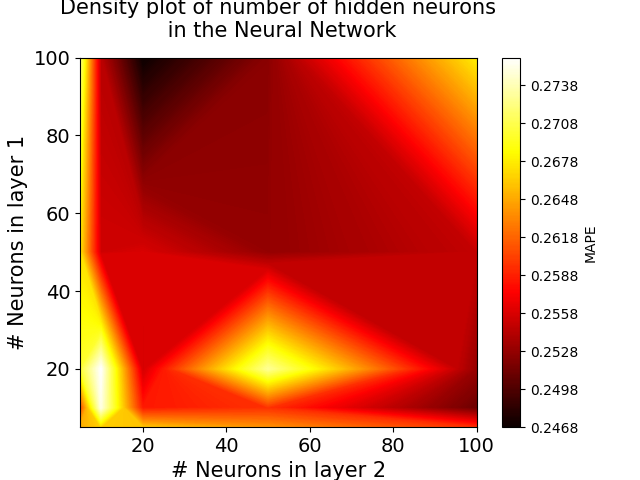

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
x = [5,10,20,50,100]
y = [5,10,20,50,100]
z = matrix_MAPE
X,Y = np.meshgrid(x,y)
fig, ax = plt.subplots(1, 1)
# fig = plt.figure(figsize=(4,4))


plt.contourf(x,y,z,300,cmap='hot')
cb = plt.colorbar(label="MAPE");
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
ax.set_title('Density plot of number of hidden neurons\n in the Neural Network', size=15, pad=15) 
ax.set_xlabel('# Neurons in layer 2', size=15) 
ax.set_ylabel('# Neurons in layer 1', size=15) 
cb.ax.tick_params(labelsize=10)

plt.show()